# Archel Olazabal | 2/23/2023 | Preprocessing_Dataset_3

## Importing nessecary packages used

In [1]:
import pandas as pd # used in order to read data
from sklearn.preprocessing import LabelEncoder # used in order to produce code numbering system
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder # used in order to produce code numbering system
import numpy as np 


## Reading reading in the dataset

In [2]:
# Use this line of code when running on MacOS
df = pd.read_csv(r'/Users/archelolazabal/Desktop/GMUSpring2023/Archel_Olazabal_CDS492/Data/credit_card_transactions-ibm_v2.csv')

# Use this line of code to read in the dataset on a Windows computer
#df = pd.read_csv(r'C:\Users\arche\Desktop\GMUSpring2023\Archel_Olazabal_CDS492\Data\credit_card_transactions-ibm_v2.csv')

df

User  Card  Year  Month  Day   Time   Amount           Use Chip  \
0            0     0  2002      9    1  06:21  $134.09  Swipe Transaction   
1            0     0  2002      9    1  06:42   $38.48  Swipe Transaction   
2            0     0  2002      9    2  06:22  $120.34  Swipe Transaction   
3            0     0  2002      9    2  17:45  $128.95  Swipe Transaction   
4            0     0  2002      9    3  06:23  $104.71  Swipe Transaction   
...        ...   ...   ...    ...  ...    ...      ...                ...   
24386895  1999     1  2020      2   27  22:23  $-54.00   Chip Transaction   
24386896  1999     1  2020      2   27  22:24   $54.00   Chip Transaction   
24386897  1999     1  2020      2   28  07:43   $59.15   Chip Transaction   
24386898  1999     1  2020      2   28  20:10   $43.12   Chip Transaction   
24386899  1999     1  2020      2   28  23:10   $45.13   Chip Transaction   

                Merchant Name  Merchant City Merchant State      Zip   MCC  \
0         3527213246127876953       La Verne             CA  91750.0  5300   
1         -727612092139916043  Monterey Park             CA  91754.0  5411   
2         -727612092139916043  Monterey Park             CA  91754.0  5411   
3         3414527459579106770  Monterey Park             CA  91754.0  5651   
4         5817218446178736267       La Verne             CA  91750.0  5912   
...                       ...            ...            ...      ...   ...   
24386895 -5162038175624867091      Merrimack             NH   3054.0  5541   
24386896 -5162038175624867091      Merrimack             NH   3054.0  5541   
24386897  2500998799892805156      Merrimack             NH   3054.0  4121   
24386898  2500998799892805156      Merrimack             NH   3054.0  4121   
24386899  4751695835751691036      Merrimack             NH   3054.0  5814   

         Errors? Is Fraud?  
0            NaN        No  
1            NaN        No  
2            NaN        No  
3            NaN        No  
4            NaN        No  
...          ...       ...  
24386895     NaN        No  
24386896     NaN        No  
24386897     NaN        No  
24386898     NaN        No  
24386899     NaN        No  

[24386900 rows x 15 columns]

## Converting the Fraud column

In [3]:
results = set(df['Is Fraud?'].values)
results

{'No', 'Yes'}

In [4]:
df.loc[df["Is Fraud?"] == "No", "Is Fraud?"] = 0
df.loc[df["Is Fraud?"] == "Yes", "Is Fraud?"] = 1
df['Is Fraud?'] = pd.to_numeric(df['Is Fraud?'])
df["Is Fraud?"]

0           0
1           0
2           0
3           0
4           0
           ..
24386895    0
24386896    0
24386897    0
24386898    0
24386899    0
Name: Is Fraud?, Length: 24386900, dtype: int64

In [5]:
df2 = df.loc[df['Is Fraud?'] == 1]
df2

User  Card  Year  Month  Day   Time   Amount            Use Chip  \
4099         0     0  2015     11   15  12:55  $287.13  Online Transaction   
4100         0     0  2015     11   15  13:19    $2.41  Online Transaction   
4101         0     0  2015     11   16  09:41   $50.81  Online Transaction   
4102         0     0  2015     11   16  09:46  $248.36  Online Transaction   
4103         0     0  2015     11   16  11:20  $473.00  Online Transaction   
...        ...   ...   ...    ...  ...    ...      ...                 ...   
24375668  1997     2  2016      9    4  10:45    $1.25  Online Transaction   
24375670  1997     2  2016      9    4  12:30  $116.66  Online Transaction   
24375671  1997     2  2016      9    4  12:40  $359.99  Online Transaction   
24375672  1997     2  2016      9    4  13:45  $351.51  Online Transaction   
24375673  1997     2  2016      9    4  13:55  $188.26  Online Transaction   

                Merchant Name Merchant City Merchant State  Zip   MCC Errors?  \
4099     -8194607650924472520        ONLINE            NaN  NaN  3001     NaN   
4100     -7759074308363763111        ONLINE            NaN  NaN  5651     NaN   
4101      -551332107213382088        ONLINE            NaN  NaN  4411     NaN   
4102      4872340518840476610        ONLINE            NaN  NaN  5732     NaN   
4103     -8566951830324093739        ONLINE            NaN  NaN  3640     NaN   
...                       ...           ...            ...  ...   ...     ...   
24375668  6455213054093379528        ONLINE            NaN  NaN  5815     NaN   
24375670   822647939787511611        ONLINE            NaN  NaN  5311     NaN   
24375671  8080934608468946743        ONLINE            NaN  NaN  5310     NaN   
24375672 -4282466774399734331        ONLINE            NaN  NaN  4829     NaN   
24375673  3189517333335617109        ONLINE            NaN  NaN  5311     NaN   

          Is Fraud?  
4099              1  
4100              1  
4101              1  
4102              1  
4103              1  
...             ...  
24375668          1  
24375670          1  
24375671          1  
24375672          1  
24375673          1  

[29757 rows x 15 columns]

## Creating a Sample size of the data containing 40% fraud

In [6]:
# Creating 2 datasets
nonfraud = df.loc[df['Is Fraud?'] == 0].sample(70_000)
fraud = df.loc[df['Is Fraud?'] == 1]

# Merege both datasets
df = pd.concat([nonfraud, fraud], axis=0)

df

User  Card  Year  Month  Day   Time   Amount            Use Chip  \
10569294   884     1  2011     10   11  07:45   $55.72   Swipe Transaction   
3112825    260     3  2016      9   25  17:02  $148.08    Chip Transaction   
15235017  1246     1  2015     11    2  14:10   $40.00    Chip Transaction   
11458673   953     1  2017      3    6  06:36   $59.76    Chip Transaction   
13012273  1071     0  2017      7   25  18:55   $21.10    Chip Transaction   
...        ...   ...   ...    ...  ...    ...      ...                 ...   
24375668  1997     2  2016      9    4  10:45    $1.25  Online Transaction   
24375670  1997     2  2016      9    4  12:30  $116.66  Online Transaction   
24375671  1997     2  2016      9    4  12:40  $359.99  Online Transaction   
24375672  1997     2  2016      9    4  13:45  $351.51  Online Transaction   
24375673  1997     2  2016      9    4  13:55  $188.26  Online Transaction   

                Merchant Name Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054   Apple River             IL  61001.0  4111   
3112825   -727612092139916043       Sanford             NC  27330.0  5411   
15235017 -4282466774399734331      New York             NY  10010.0  4829   
11458673 -2472481739355111587      Franklin             WI  53132.0  7538   
13012273 -7146670748125200898         Tampa             FL  33613.0  5970   
...                       ...           ...            ...      ...   ...   
24375668  6455213054093379528        ONLINE            NaN      NaN  5815   
24375670   822647939787511611        ONLINE            NaN      NaN  5311   
24375671  8080934608468946743        ONLINE            NaN      NaN  5310   
24375672 -4282466774399734331        ONLINE            NaN      NaN  4829   
24375673  3189517333335617109        ONLINE            NaN      NaN  5311   

         Errors?  Is Fraud?  
10569294     NaN          0  
3112825      NaN          0  
15235017     NaN          0  
11458673     NaN          0  
13012273     NaN          0  
...          ...        ...  
24375668     NaN          1  
24375670     NaN          1  
24375671     NaN          1  
24375672     NaN          1  
24375673     NaN          1  

[99757 rows x 15 columns]

In [7]:
df2 = df.loc[df['Is Fraud?'] == 0]
df2

User  Card  Year  Month  Day   Time   Amount           Use Chip  \
10569294   884     1  2011     10   11  07:45   $55.72  Swipe Transaction   
3112825    260     3  2016      9   25  17:02  $148.08   Chip Transaction   
15235017  1246     1  2015     11    2  14:10   $40.00   Chip Transaction   
11458673   953     1  2017      3    6  06:36   $59.76   Chip Transaction   
13012273  1071     0  2017      7   25  18:55   $21.10   Chip Transaction   
...        ...   ...   ...    ...  ...    ...      ...                ...   
21500565  1755     0  2016      4   14  15:05   $49.52  Swipe Transaction   
5269849    449     2  2008      7   10  21:09   $77.00  Swipe Transaction   
15500280  1262     0  2016     10   19  17:55   $57.29  Swipe Transaction   
5767918    488     0  2003      4   12  14:24   $40.00  Swipe Transaction   
11606061   966     2  2012      7    5  11:51   $23.34  Swipe Transaction   

                Merchant Name     Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054       Apple River             IL  61001.0  4111   
3112825   -727612092139916043           Sanford             NC  27330.0  5411   
15235017 -4282466774399734331          New York             NY  10010.0  4829   
11458673 -2472481739355111587          Franklin             WI  53132.0  7538   
13012273 -7146670748125200898             Tampa             FL  33613.0  5970   
...                       ...               ...            ...      ...   ...   
21500565  5552782254200667642           Medford             OR  97504.0  5912   
5269849   1799189980464955940        San Benito             TX  78586.0  5499   
15500280 -3345936507911876459  Sainte Genevieve             MO  63670.0  7538   
5767918  -4282466774399734331       Los Angeles             CA  90036.0  4829   
11606061  3639123430068731390      East Hampton             NY  11937.0  5814   

         Errors?  Is Fraud?  
10569294     NaN          0  
3112825      NaN          0  
15235017     NaN          0  
11458673     NaN          0  
13012273     NaN          0  
...          ...        ...  
21500565     NaN          0  
5269849      NaN          0  
15500280     NaN          0  
5767918      NaN          0  
11606061     NaN          0  

[70000 rows x 15 columns]

## Viewing Missing data

Possibily thinking of dropping the errors columns

Text(0.5, 1.0, 'The Number of Non-Null Values in the Data')

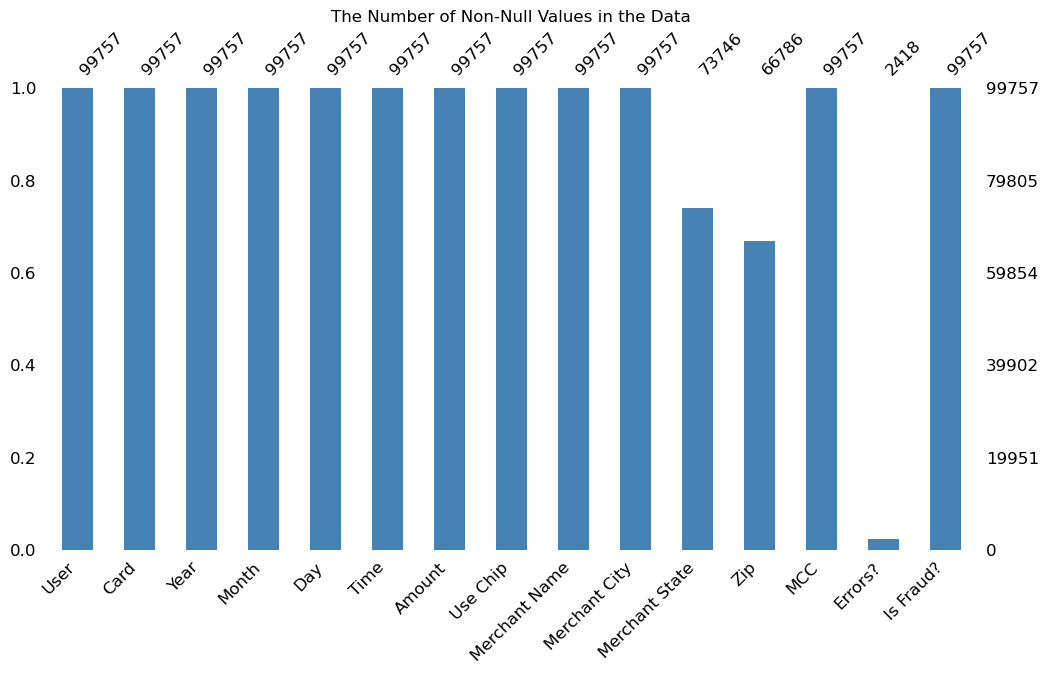

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')
plt.title('The Number of Non-Null Values in the Data')

# Converting all features into a numberical value

In [9]:
df.nunique()

User               1716
Card                  9
Year                 30
Month                12
Day                  31
Time               1440
Amount            21766
Use Chip              3
Merchant Name     11393
Merchant City      5182
Merchant State      114
Zip                9713
MCC                 109
Errors?              16
Is Fraud?             2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99757 entries, 10569294 to 24375673
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            99757 non-null  int64  
 1   Card            99757 non-null  int64  
 2   Year            99757 non-null  int64  
 3   Month           99757 non-null  int64  
 4   Day             99757 non-null  int64  
 5   Time            99757 non-null  object 
 6   Amount          99757 non-null  object 
 7   Use Chip        99757 non-null  object 
 8   Merchant Name   99757 non-null  int64  
 9   Merchant City   99757 non-null  object 
 10  Merchant State  73746 non-null  object 
 11  Zip             66786 non-null  float64
 12  MCC             99757 non-null  int64  
 13  Errors?         2418 non-null   object 
 14  Is Fraud?       99757 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 12.2+ MB


## Removing duplicates

In [11]:
df = df.drop_duplicates()
df

User  Card  Year  Month  Day   Time   Amount            Use Chip  \
10569294   884     1  2011     10   11  07:45   $55.72   Swipe Transaction   
3112825    260     3  2016      9   25  17:02  $148.08    Chip Transaction   
15235017  1246     1  2015     11    2  14:10   $40.00    Chip Transaction   
11458673   953     1  2017      3    6  06:36   $59.76    Chip Transaction   
13012273  1071     0  2017      7   25  18:55   $21.10    Chip Transaction   
...        ...   ...   ...    ...  ...    ...      ...                 ...   
24375668  1997     2  2016      9    4  10:45    $1.25  Online Transaction   
24375670  1997     2  2016      9    4  12:30  $116.66  Online Transaction   
24375671  1997     2  2016      9    4  12:40  $359.99  Online Transaction   
24375672  1997     2  2016      9    4  13:45  $351.51  Online Transaction   
24375673  1997     2  2016      9    4  13:55  $188.26  Online Transaction   

                Merchant Name Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054   Apple River             IL  61001.0  4111   
3112825   -727612092139916043       Sanford             NC  27330.0  5411   
15235017 -4282466774399734331      New York             NY  10010.0  4829   
11458673 -2472481739355111587      Franklin             WI  53132.0  7538   
13012273 -7146670748125200898         Tampa             FL  33613.0  5970   
...                       ...           ...            ...      ...   ...   
24375668  6455213054093379528        ONLINE            NaN      NaN  5815   
24375670   822647939787511611        ONLINE            NaN      NaN  5311   
24375671  8080934608468946743        ONLINE            NaN      NaN  5310   
24375672 -4282466774399734331        ONLINE            NaN      NaN  4829   
24375673  3189517333335617109        ONLINE            NaN      NaN  5311   

         Errors?  Is Fraud?  
10569294     NaN          0  
3112825      NaN          0  
15235017     NaN          0  
11458673     NaN          0  
13012273     NaN          0  
...          ...        ...  
24375668     NaN          1  
24375670     NaN          1  
24375671     NaN          1  
24375672     NaN          1  
24375673     NaN          1  

[99757 rows x 15 columns]

## Converting Amount from dollars to floating point values.

In [12]:
df['Amount'] = df['Amount'].str.replace(',', '') # removing comma
df['Amount'] = df['Amount'].str.replace('$', '') # removing dollar sign
df['Amount'] = pd.to_numeric(df['Amount']) # float conversion
df['Amount']

/var/folders/db/nm3xxrfx27b4sp9jcjxmwshm0000gn/T/ipykernel_25549/1261016902.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount'] = df['Amount'].str.replace('$', '') # removing dollar sign


10569294     55.72
3112825     148.08
15235017     40.00
11458673     59.76
13012273     21.10
             ...  
24375668      1.25
24375670    116.66
24375671    359.99
24375672    351.51
24375673    188.26
Name: Amount, Length: 99757, dtype: float64

## Converting Time to integers

In [13]:
df['Time'] = df['Time'].str.replace(':', '') # removing collon 
df['Time'] = pd.to_numeric(df['Time']) # converting to integers
df['Time']

10569294     745
3112825     1702
15235017    1410
11458673     636
13012273    1855
            ... 
24375668    1045
24375670    1230
24375671    1240
24375672    1345
24375673    1355
Name: Time, Length: 99757, dtype: int64

## Converting the Use Chip column (Transaction Type)

In [14]:
results = set(df['Use Chip'].values) 
results

{'Chip Transaction', 'Online Transaction', 'Swipe Transaction'}

In [15]:
df.loc[df["Use Chip"] == "Chip Transaction", "Use Chip"] = 0
df.loc[df["Use Chip"] == "Online Transaction", "Use Chip"] = 1
df.loc[df["Use Chip"] == "Swipe Transaction", "Use Chip"] = 2
df['Use Chip'] = pd.to_numeric(df['Use Chip'])
df['Use Chip']

10569294    2
3112825     0
15235017    0
11458673    0
13012273    0
           ..
24375668    1
24375670    1
24375671    1
24375672    1
24375673    1
Name: Use Chip, Length: 99757, dtype: int64

## Converting the states and cities into integers using a numbering system

In [16]:
le = LabelEncoder()

label = le.fit_transform(df['Merchant State'])
label2 = le.fit_transform(df['Merchant City'])

df['Merchant State Code'] = label
df['Merchant City Code'] = label2

df

User  Card  Year  Month  Day  Time  Amount  Use Chip  \
10569294   884     1  2011     10   11   745   55.72         2   
3112825    260     3  2016      9   25  1702  148.08         0   
15235017  1246     1  2015     11    2  1410   40.00         0   
11458673   953     1  2017      3    6   636   59.76         0   
13012273  1071     0  2017      7   25  1855   21.10         0   
...        ...   ...   ...    ...  ...   ...     ...       ...   
24375668  1997     2  2016      9    4  1045    1.25         1   
24375670  1997     2  2016      9    4  1230  116.66         1   
24375671  1997     2  2016      9    4  1240  359.99         1   
24375672  1997     2  2016      9    4  1345  351.51         1   
24375673  1997     2  2016      9    4  1355  188.26         1   

                Merchant Name Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054   Apple River             IL  61001.0  4111   
3112825   -727612092139916043       Sanford             NC  27330.0  5411   
15235017 -4282466774399734331      New York             NY  10010.0  4829   
11458673 -2472481739355111587      Franklin             WI  53132.0  7538   
13012273 -7146670748125200898         Tampa             FL  33613.0  5970   
...                       ...           ...            ...      ...   ...   
24375668  6455213054093379528        ONLINE            NaN      NaN  5815   
24375670   822647939787511611        ONLINE            NaN      NaN  5311   
24375671  8080934608468946743        ONLINE            NaN      NaN  5310   
24375672 -4282466774399734331        ONLINE            NaN      NaN  4829   
24375673  3189517333335617109        ONLINE            NaN      NaN  5311   

         Errors?  Is Fraud?  Merchant State Code  Merchant City Code  
10569294     NaN          0                   40                 126  
3112825      NaN          0                   65                4140  
15235017     NaN          0                   72                3203  
11458673     NaN          0                  111                1598  
13012273     NaN          0                   27                4560  
...          ...        ...                  ...                 ...  
24375668     NaN          1                  114                3323  
24375670     NaN          1                  114                3323  
24375671     NaN          1                  114                3323  
24375672     NaN          1                  114                3323  
24375673     NaN          1                  114                3323  

[99757 rows x 17 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99757 entries, 10569294 to 24375673
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User                 99757 non-null  int64  
 1   Card                 99757 non-null  int64  
 2   Year                 99757 non-null  int64  
 3   Month                99757 non-null  int64  
 4   Day                  99757 non-null  int64  
 5   Time                 99757 non-null  int64  
 6   Amount               99757 non-null  float64
 7   Use Chip             99757 non-null  int64  
 8   Merchant Name        99757 non-null  int64  
 9   Merchant City        99757 non-null  object 
 10  Merchant State       73746 non-null  object 
 11  Zip                  66786 non-null  float64
 12  MCC                  99757 non-null  int64  
 13  Errors?              2418 non-null   object 
 14  Is Fraud?            99757 non-null  int64  
 15  Merchant State Code  99757

In [18]:
df.describe()

User          Card          Year         Month           Day  \
count  99757.000000  99757.000000  99757.000000  99757.000000  99757.000000   
mean    1001.799282      1.430887   2011.976493      6.537907     15.713955   
std      566.064695      1.448325      4.966074      3.481257      8.826952   
min        0.000000      0.000000   1991.000000      1.000000      1.000000   
25%      517.000000      0.000000   2008.000000      3.000000      8.000000   
50%     1010.000000      1.000000   2013.000000      7.000000     16.000000   
75%     1477.000000      2.000000   2016.000000     10.000000     23.000000   
max     1999.000000      8.000000   2020.000000     12.000000     31.000000   

               Time        Amount      Use Chip  Merchant Name           Zip  \
count  99757.000000  99757.000000  99757.000000   9.975700e+04  66786.000000   
mean    1253.283288     63.362739      1.279339  -3.011625e+17  51015.711107   
std      479.034263    133.017844      0.813261   4.819333e+18  29334.334762   
min        0.000000   -500.000000      0.000000  -9.217786e+18   1001.000000   
25%      918.000000     10.650000      1.000000  -4.334233e+18  28468.250000   
50%     1233.000000     38.070000      2.000000  -4.980091e+17  46342.000000   
75%     1559.000000     83.690000      2.000000   3.635552e+18  77573.000000   
max     2359.000000   5694.440000      2.000000   9.222877e+18  99928.000000   

                MCC     Is Fraud?  Merchant State Code  Merchant City Code  
count  99757.000000  99757.000000         99757.000000        99757.000000  
mean    5470.051826      0.298295            71.018234         2795.306354  
std      925.647286      0.457512            36.910387         1321.822350  
min     1711.000000      0.000000             0.000000            0.000000  
25%     5211.000000      0.000000            41.000000         1823.000000  
50%     5411.000000      0.000000            72.000000         3323.000000  
75%     5812.000000      1.000000           114.000000         3579.000000  
max     9402.000000      1.000000           114.000000         5181.000000

In [19]:
df.nunique()

User                    1716
Card                       9
Year                      30
Month                     12
Day                       31
Time                    1440
Amount                 21766
Use Chip                   3
Merchant Name          11393
Merchant City           5182
Merchant State           114
Zip                     9713
MCC                      109
Errors?                   16
Is Fraud?                  2
Merchant State Code      115
Merchant City Code      5182
dtype: int64

In [20]:
df.shape

(99757, 17)

In [21]:
# putting in place holders
df['Merchant State'] = df['Merchant State'].fillna('ONLINE')
df['Zip'] = df['Zip'].fillna(00000)
df['Errors?'] = df['Errors?'].fillna("NAN")
df

User  Card  Year  Month  Day  Time  Amount  Use Chip  \
10569294   884     1  2011     10   11   745   55.72         2   
3112825    260     3  2016      9   25  1702  148.08         0   
15235017  1246     1  2015     11    2  1410   40.00         0   
11458673   953     1  2017      3    6   636   59.76         0   
13012273  1071     0  2017      7   25  1855   21.10         0   
...        ...   ...   ...    ...  ...   ...     ...       ...   
24375668  1997     2  2016      9    4  1045    1.25         1   
24375670  1997     2  2016      9    4  1230  116.66         1   
24375671  1997     2  2016      9    4  1240  359.99         1   
24375672  1997     2  2016      9    4  1345  351.51         1   
24375673  1997     2  2016      9    4  1355  188.26         1   

                Merchant Name Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054   Apple River             IL  61001.0  4111   
3112825   -727612092139916043       Sanford             NC  27330.0  5411   
15235017 -4282466774399734331      New York             NY  10010.0  4829   
11458673 -2472481739355111587      Franklin             WI  53132.0  7538   
13012273 -7146670748125200898         Tampa             FL  33613.0  5970   
...                       ...           ...            ...      ...   ...   
24375668  6455213054093379528        ONLINE         ONLINE      0.0  5815   
24375670   822647939787511611        ONLINE         ONLINE      0.0  5311   
24375671  8080934608468946743        ONLINE         ONLINE      0.0  5310   
24375672 -4282466774399734331        ONLINE         ONLINE      0.0  4829   
24375673  3189517333335617109        ONLINE         ONLINE      0.0  5311   

         Errors?  Is Fraud?  Merchant State Code  Merchant City Code  
10569294     NAN          0                   40                 126  
3112825      NAN          0                   65                4140  
15235017     NAN          0                   72                3203  
11458673     NAN          0                  111                1598  
13012273     NAN          0                   27                4560  
...          ...        ...                  ...                 ...  
24375668     NAN          1                  114                3323  
24375670     NAN          1                  114                3323  
24375671     NAN          1                  114                3323  
24375672     NAN          1                  114                3323  
24375673     NAN          1                  114                3323  

[99757 rows x 17 columns]

In [22]:
# Changing to the first error value. 
errors = df['Errors?']
seperator = ','
multiple = []
for row in errors:
    multiple.append(row.split(seperator, 1)[0])
df['Errors?'] = multiple
df

User  Card  Year  Month  Day  Time  Amount  Use Chip  \
10569294   884     1  2011     10   11   745   55.72         2   
3112825    260     3  2016      9   25  1702  148.08         0   
15235017  1246     1  2015     11    2  1410   40.00         0   
11458673   953     1  2017      3    6   636   59.76         0   
13012273  1071     0  2017      7   25  1855   21.10         0   
...        ...   ...   ...    ...  ...   ...     ...       ...   
24375668  1997     2  2016      9    4  1045    1.25         1   
24375670  1997     2  2016      9    4  1230  116.66         1   
24375671  1997     2  2016      9    4  1240  359.99         1   
24375672  1997     2  2016      9    4  1345  351.51         1   
24375673  1997     2  2016      9    4  1355  188.26         1   

                Merchant Name Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054   Apple River             IL  61001.0  4111   
3112825   -727612092139916043       Sanford             NC  27330.0  5411   
15235017 -4282466774399734331      New York             NY  10010.0  4829   
11458673 -2472481739355111587      Franklin             WI  53132.0  7538   
13012273 -7146670748125200898         Tampa             FL  33613.0  5970   
...                       ...           ...            ...      ...   ...   
24375668  6455213054093379528        ONLINE         ONLINE      0.0  5815   
24375670   822647939787511611        ONLINE         ONLINE      0.0  5311   
24375671  8080934608468946743        ONLINE         ONLINE      0.0  5310   
24375672 -4282466774399734331        ONLINE         ONLINE      0.0  4829   
24375673  3189517333335617109        ONLINE         ONLINE      0.0  5311   

         Errors?  Is Fraud?  Merchant State Code  Merchant City Code  
10569294     NAN          0                   40                 126  
3112825      NAN          0                   65                4140  
15235017     NAN          0                   72                3203  
11458673     NAN          0                  111                1598  
13012273     NAN          0                   27                4560  
...          ...        ...                  ...                 ...  
24375668     NAN          1                  114                3323  
24375670     NAN          1                  114                3323  
24375671     NAN          1                  114                3323  
24375672     NAN          1                  114                3323  
24375673     NAN          1                  114                3323  

[99757 rows x 17 columns]

In [23]:
# Changing the errror value to numerical
le = LabelEncoder()

label = le.fit_transform(df['Errors?'])

df['Error Code'] = label

df

User  Card  Year  Month  Day  Time  Amount  Use Chip  \
10569294   884     1  2011     10   11   745   55.72         2   
3112825    260     3  2016      9   25  1702  148.08         0   
15235017  1246     1  2015     11    2  1410   40.00         0   
11458673   953     1  2017      3    6   636   59.76         0   
13012273  1071     0  2017      7   25  1855   21.10         0   
...        ...   ...   ...    ...  ...   ...     ...       ...   
24375668  1997     2  2016      9    4  1045    1.25         1   
24375670  1997     2  2016      9    4  1230  116.66         1   
24375671  1997     2  2016      9    4  1240  359.99         1   
24375672  1997     2  2016      9    4  1345  351.51         1   
24375673  1997     2  2016      9    4  1355  188.26         1   

                Merchant Name Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054   Apple River             IL  61001.0  4111   
3112825   -727612092139916043       Sanford             NC  27330.0  5411   
15235017 -4282466774399734331      New York             NY  10010.0  4829   
11458673 -2472481739355111587      Franklin             WI  53132.0  7538   
13012273 -7146670748125200898         Tampa             FL  33613.0  5970   
...                       ...           ...            ...      ...   ...   
24375668  6455213054093379528        ONLINE         ONLINE      0.0  5815   
24375670   822647939787511611        ONLINE         ONLINE      0.0  5311   
24375671  8080934608468946743        ONLINE         ONLINE      0.0  5310   
24375672 -4282466774399734331        ONLINE         ONLINE      0.0  4829   
24375673  3189517333335617109        ONLINE         ONLINE      0.0  5311   

         Errors?  Is Fraud?  Merchant State Code  Merchant City Code  \
10569294     NAN          0                   40                 126   
3112825      NAN          0                   65                4140   
15235017     NAN          0                   72                3203   
11458673     NAN          0                  111                1598   
13012273     NAN          0                   27                4560   
...          ...        ...                  ...                 ...   
24375668     NAN          1                  114                3323   
24375670     NAN          1                  114                3323   
24375671     NAN          1                  114                3323   
24375672     NAN          1                  114                3323   
24375673     NAN          1                  114                3323   

          Error Code  
10569294           6  
3112825            6  
15235017           6  
11458673           6  
13012273           6  
...              ...  
24375668           6  
24375670           6  
24375671           6  
24375672           6  
24375673           6  

[99757 rows x 18 columns]

## Making plots for outliers

['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip', 'Merchant Name', 'Zip', 'MCC', 'Is Fraud?', 'Merchant State Code', 'Merchant City Code', 'Error Code']


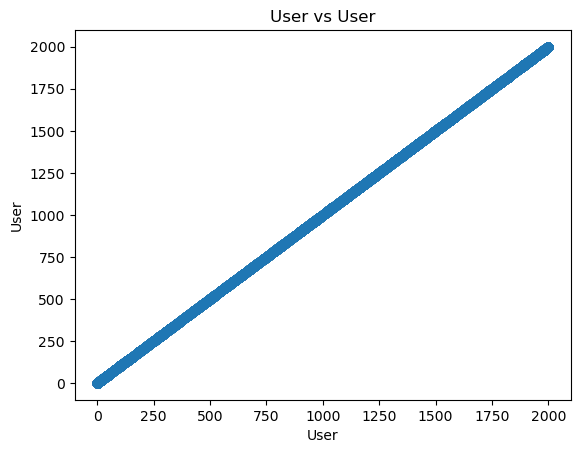

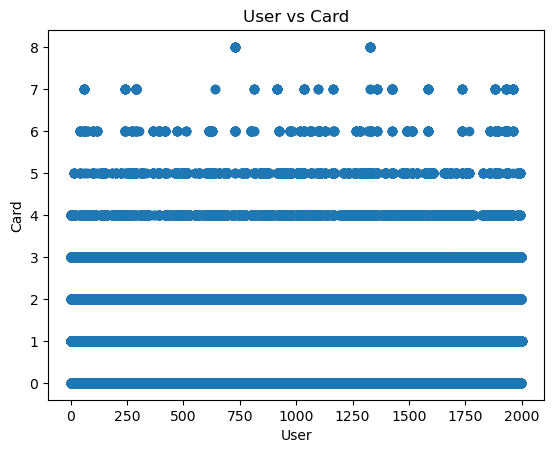

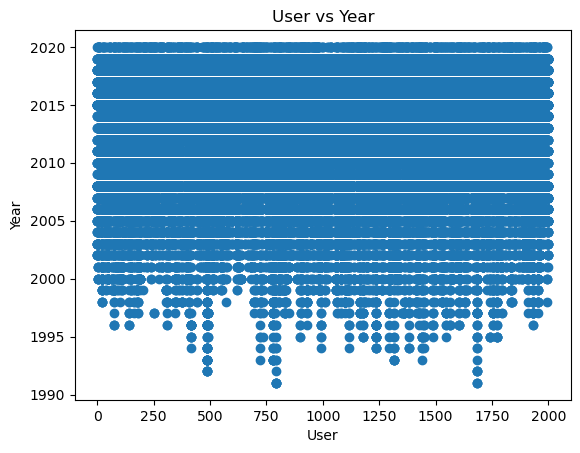

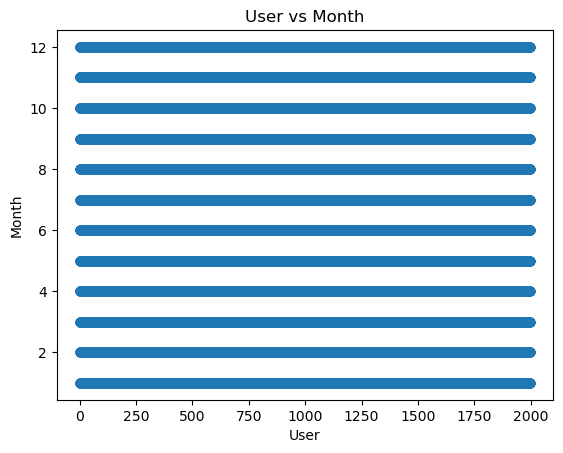

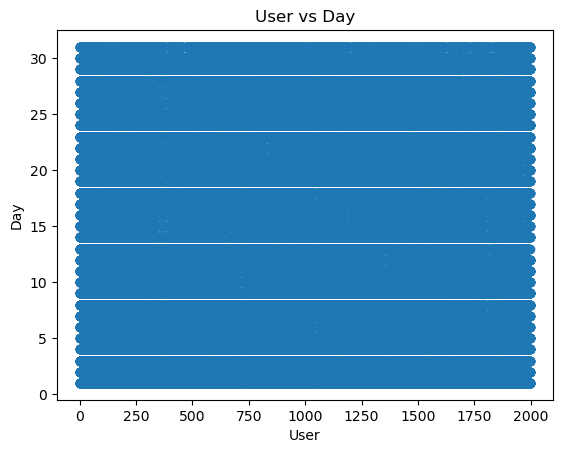

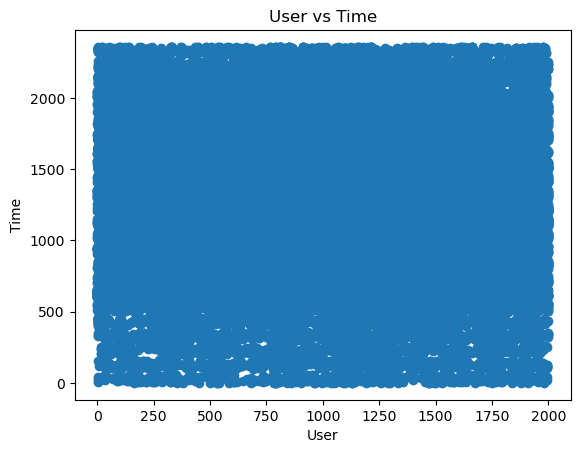

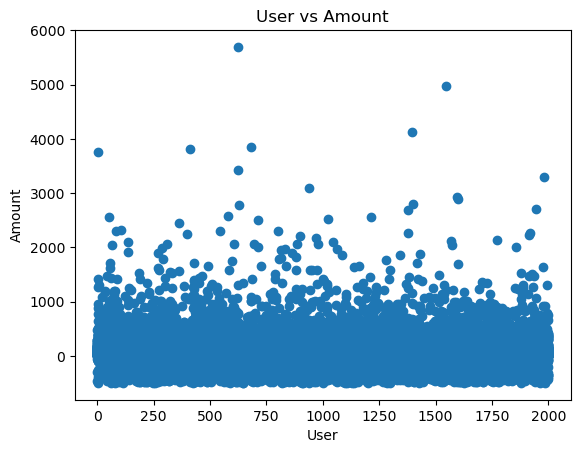

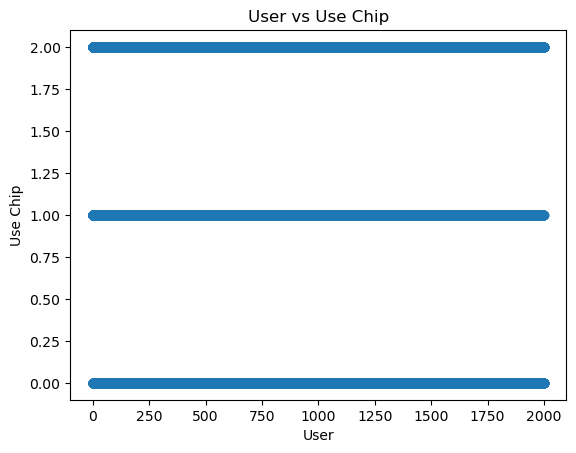

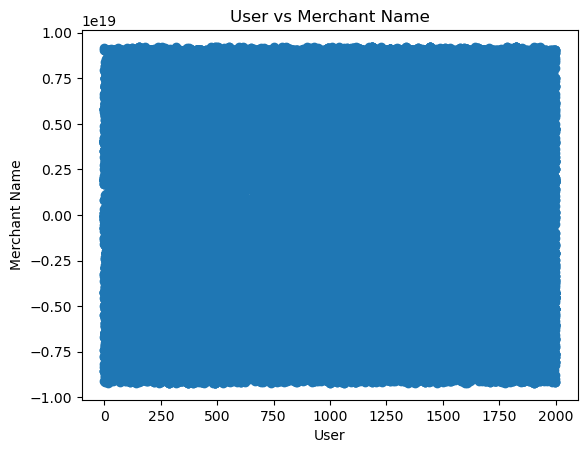

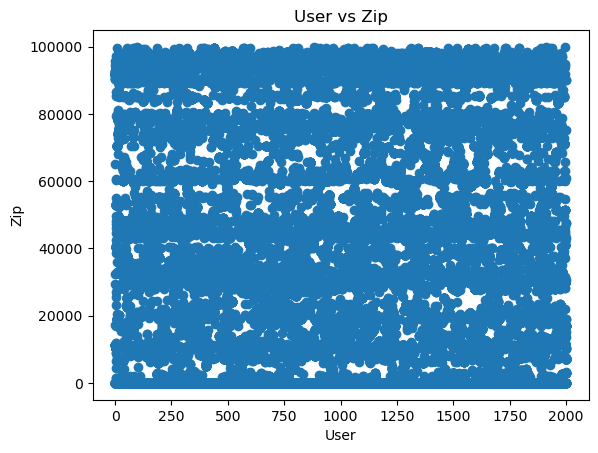

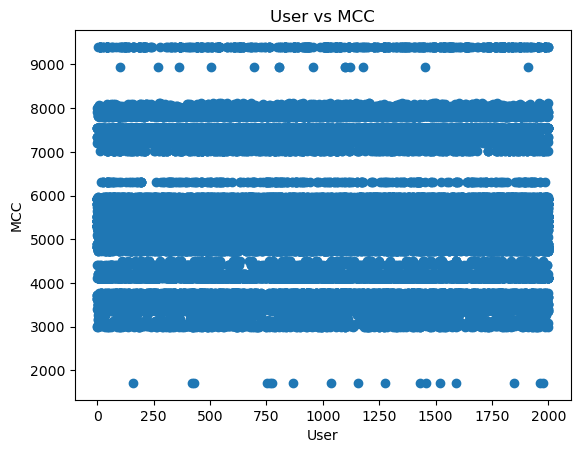

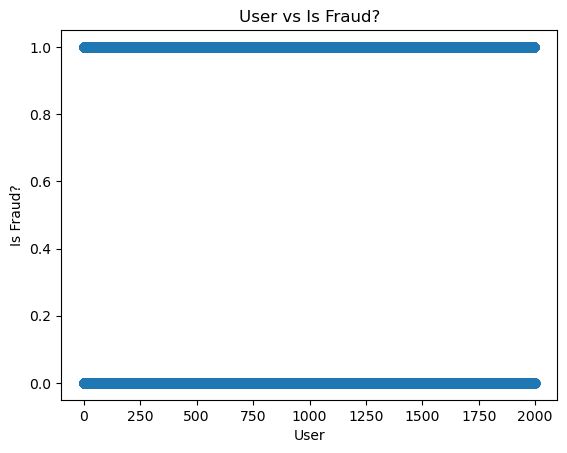

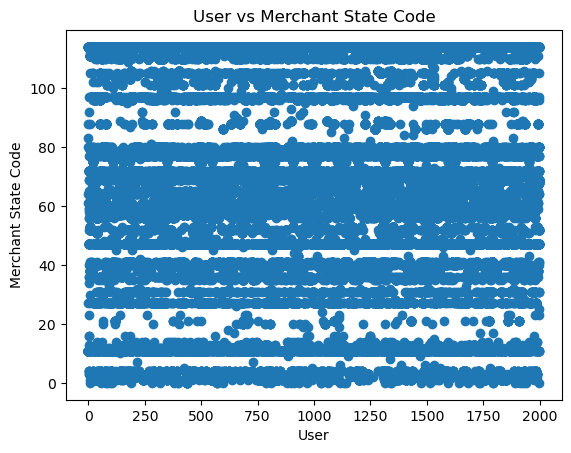

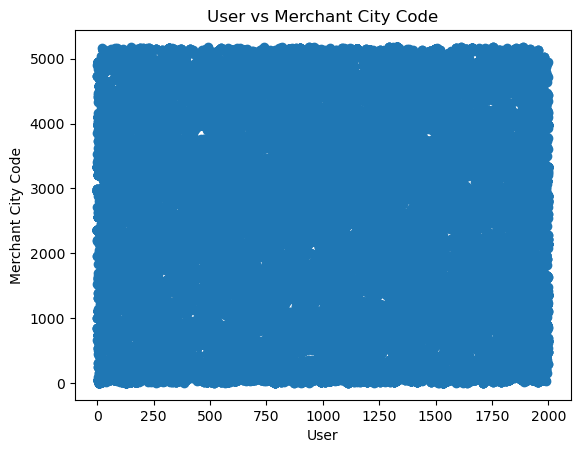

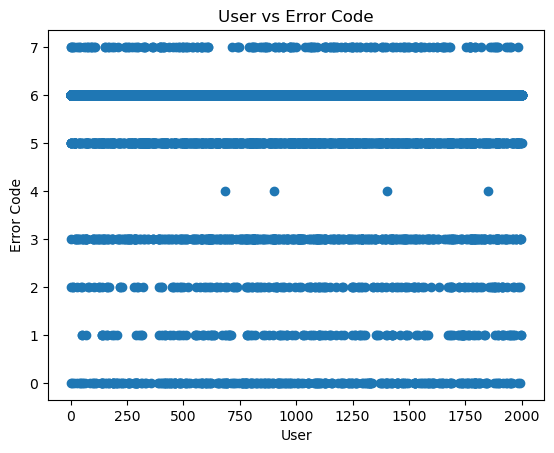

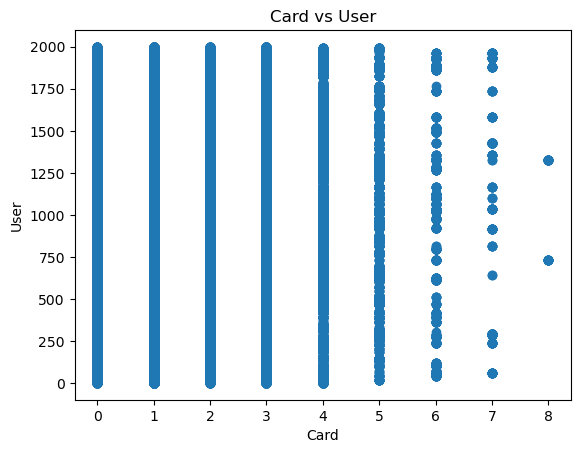

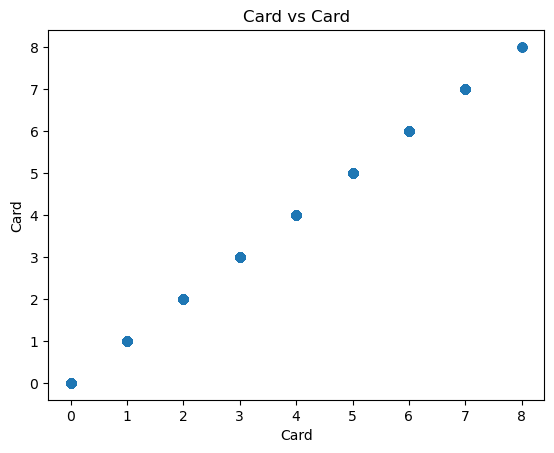

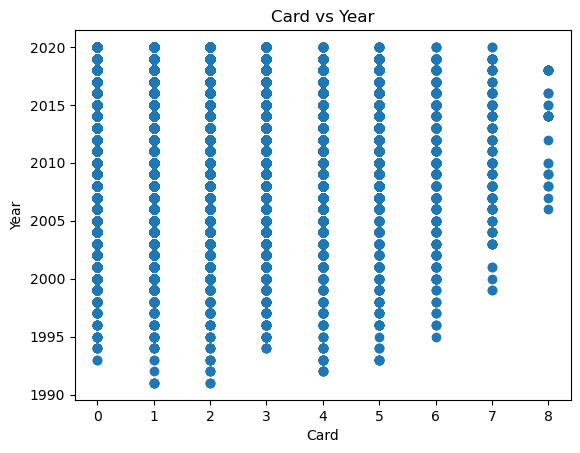

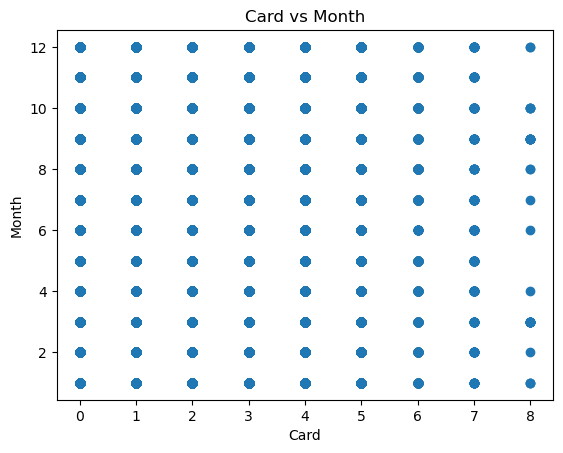

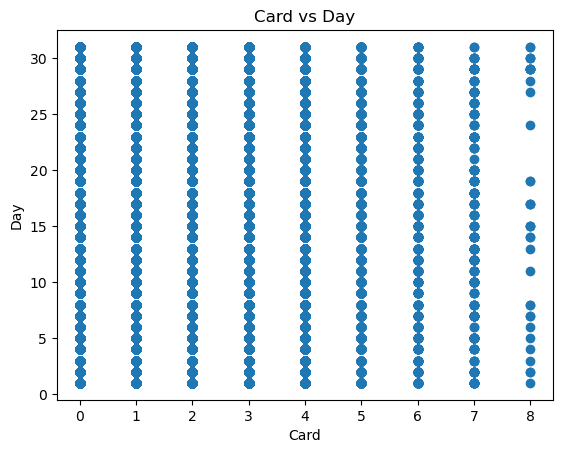

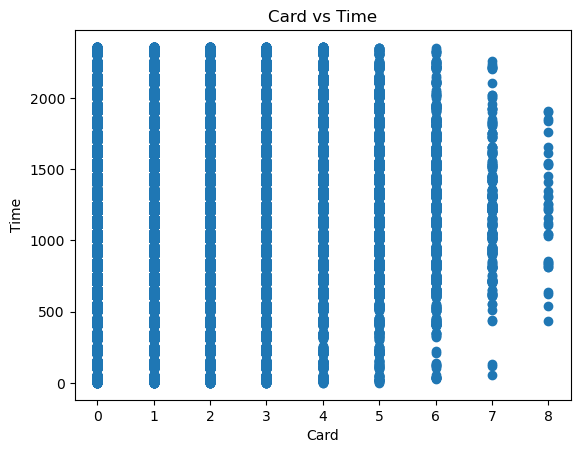

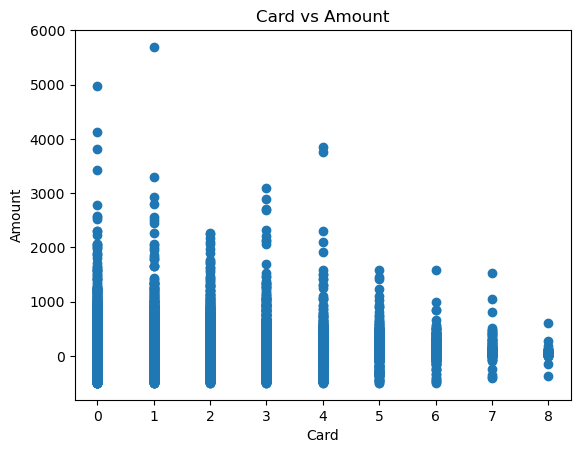

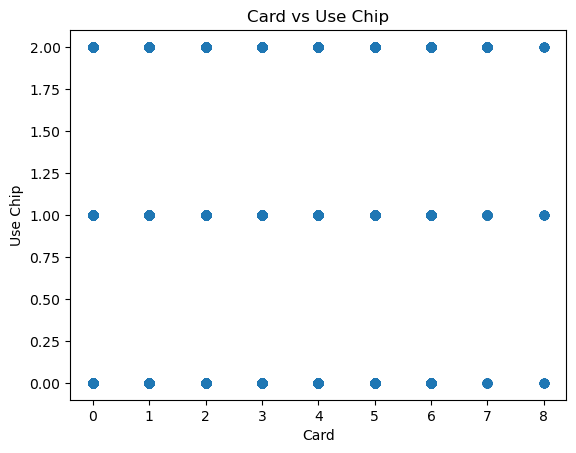

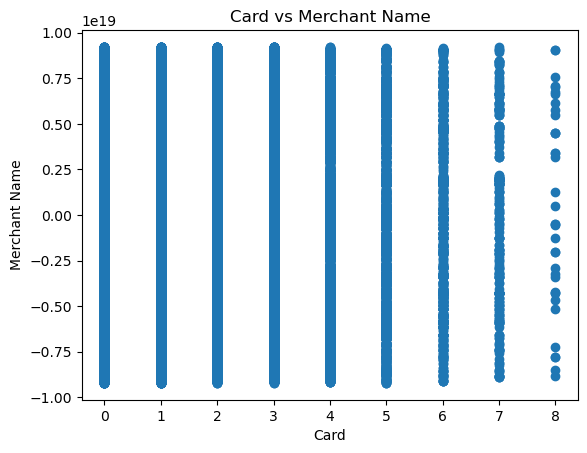

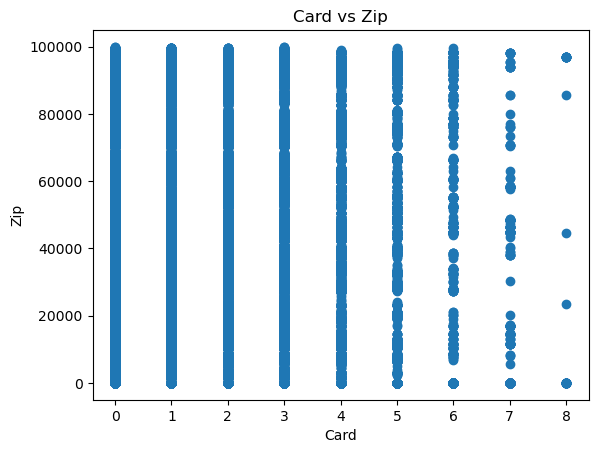

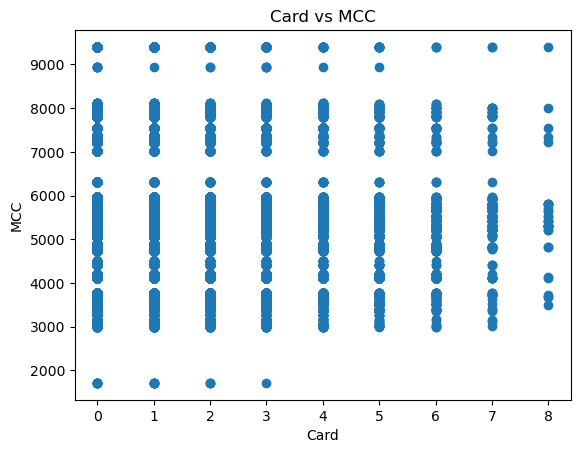

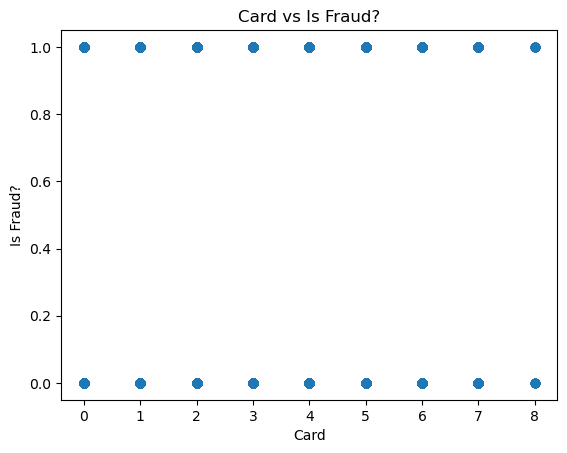

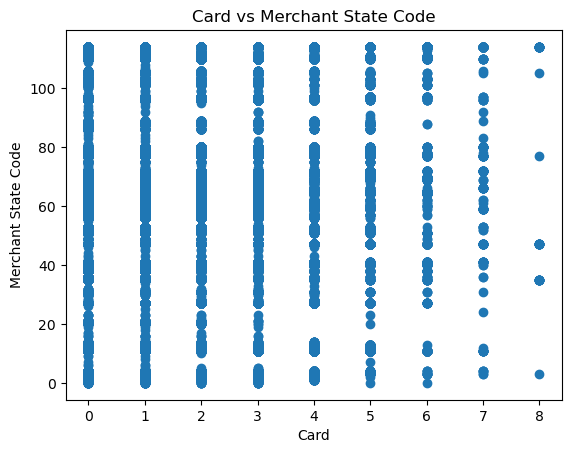

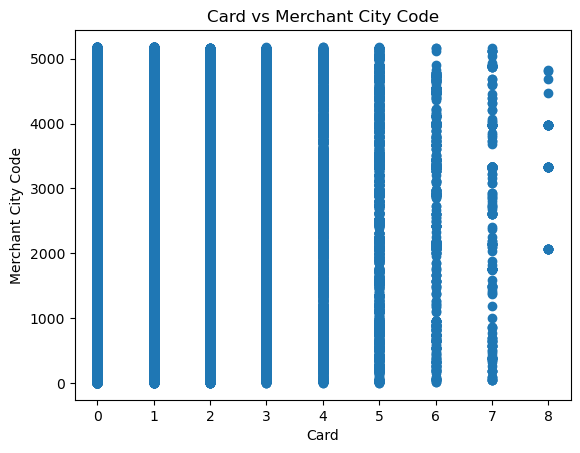

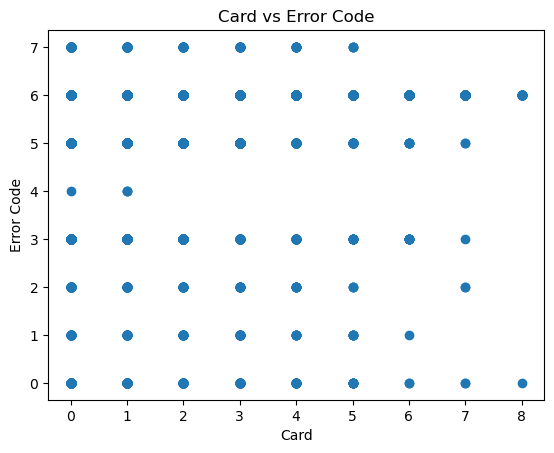

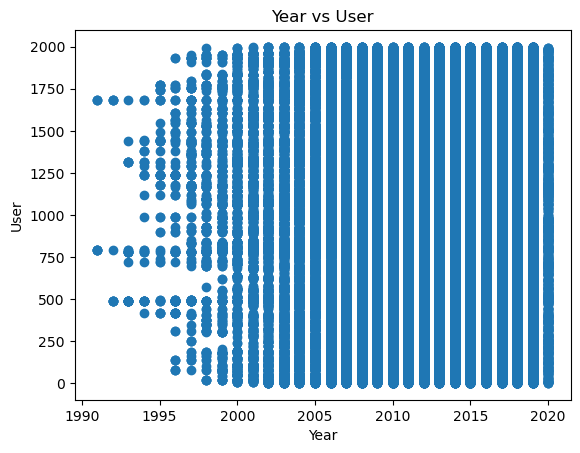

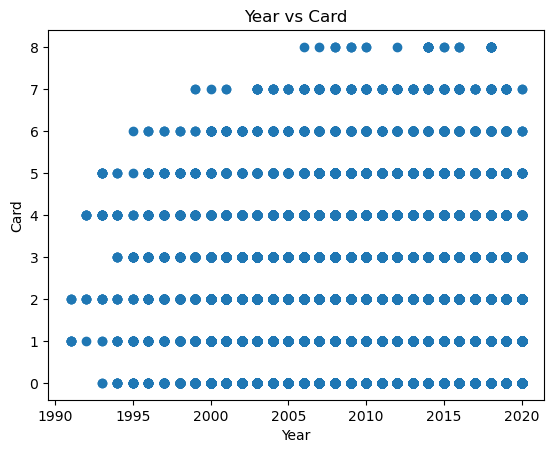

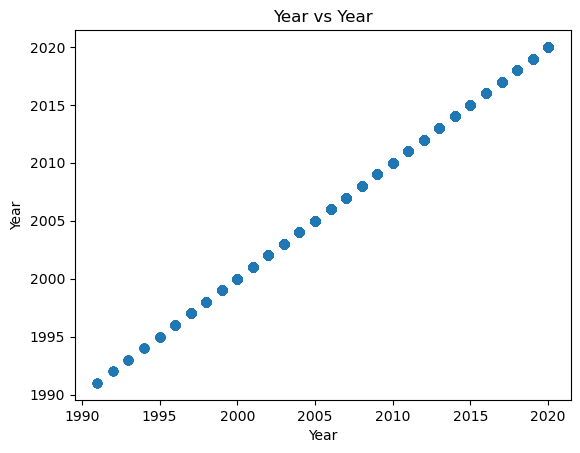

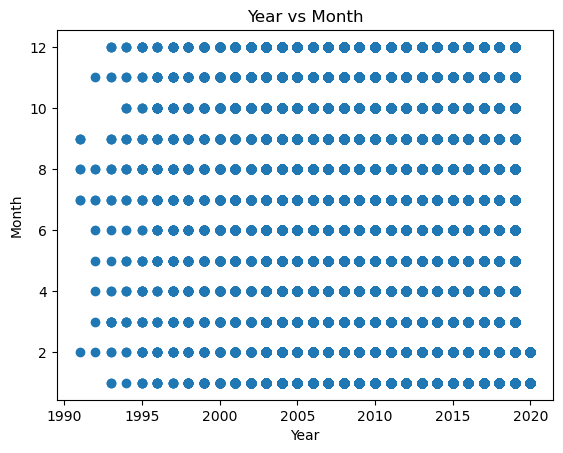

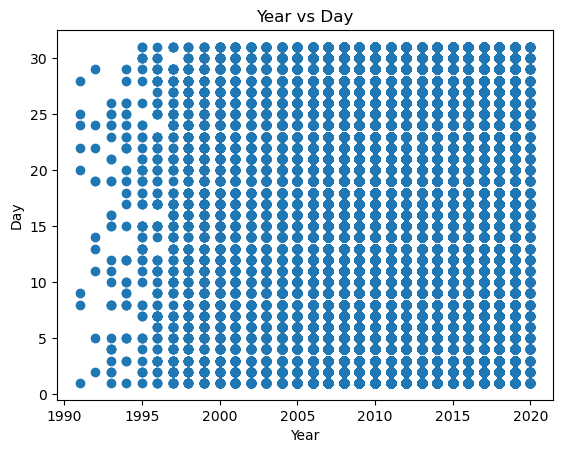

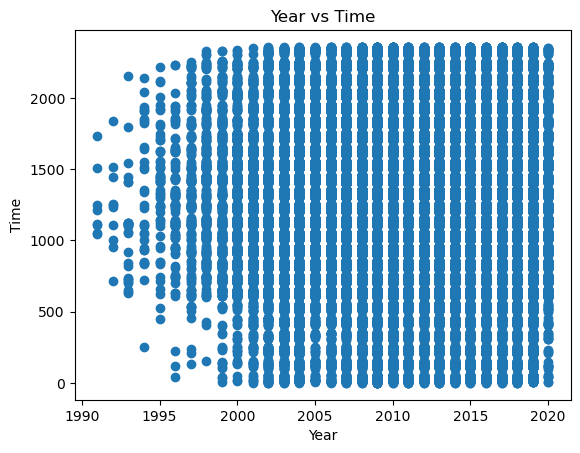

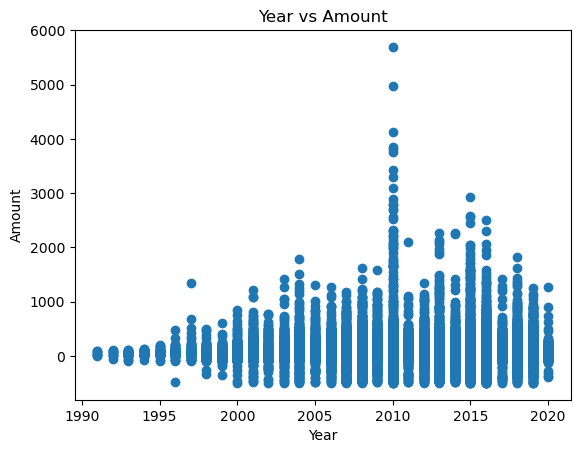

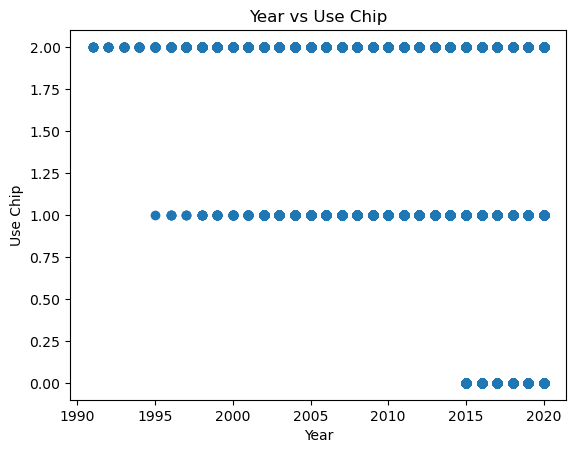

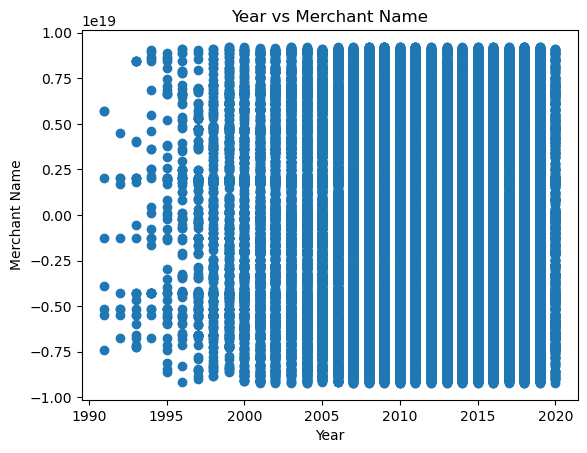

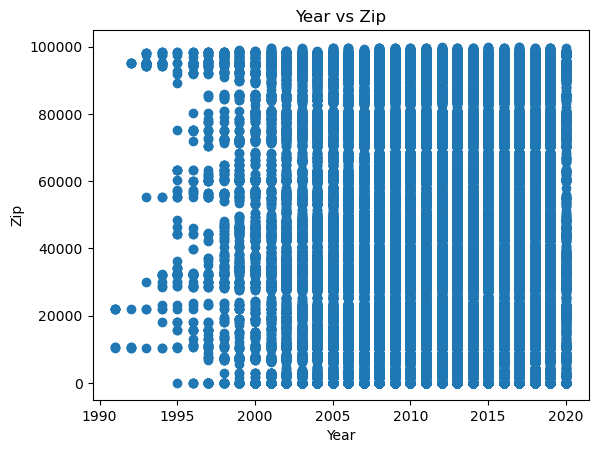

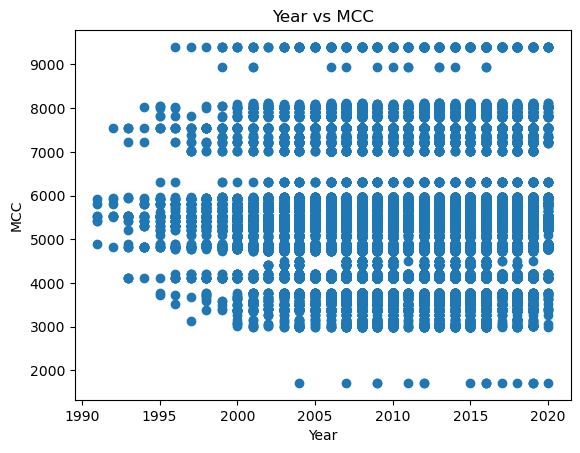

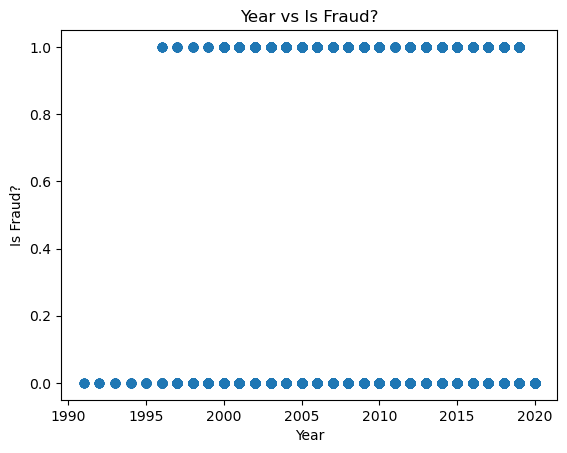

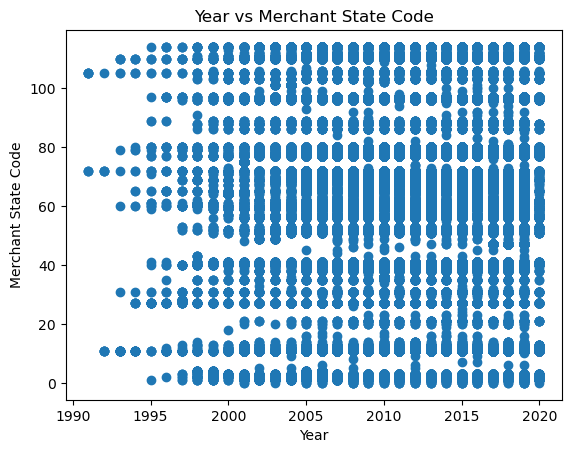

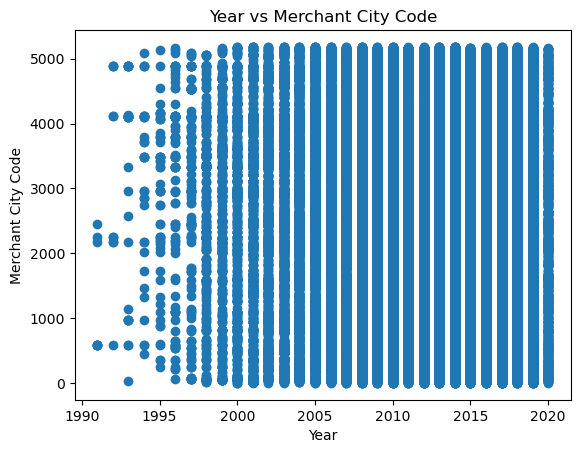

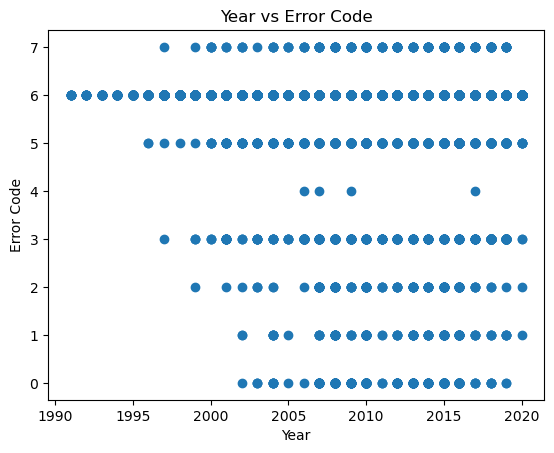

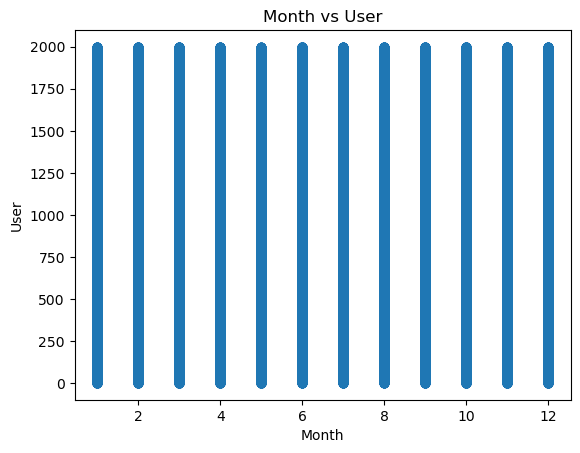

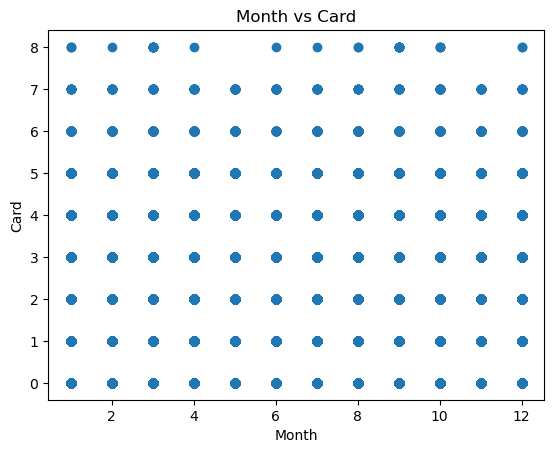

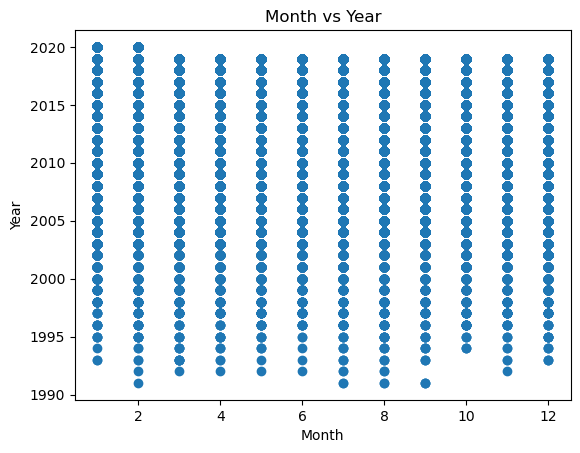

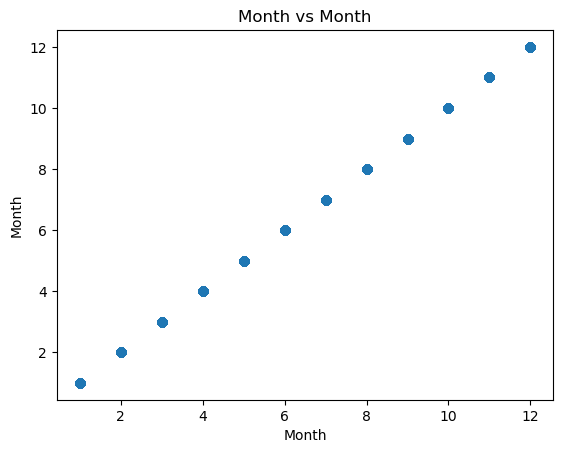

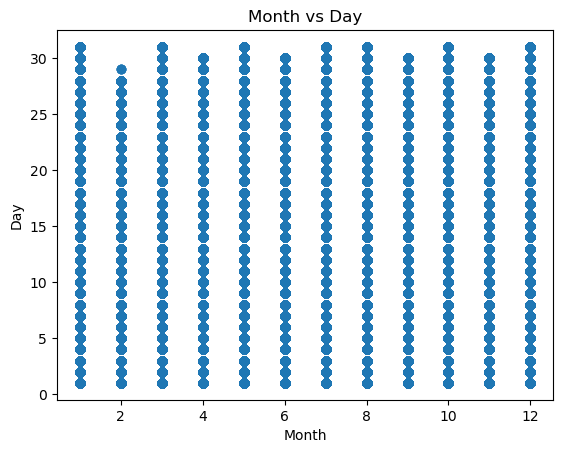

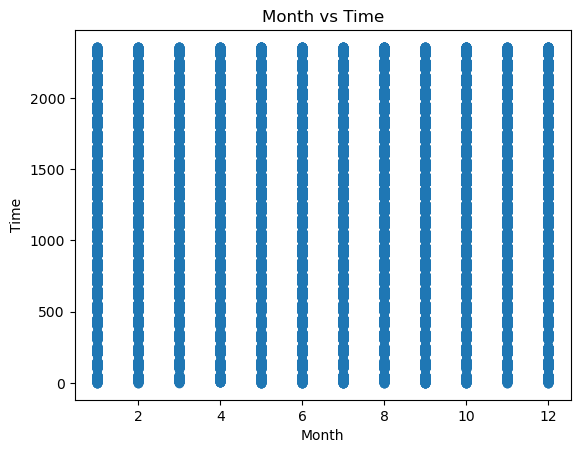

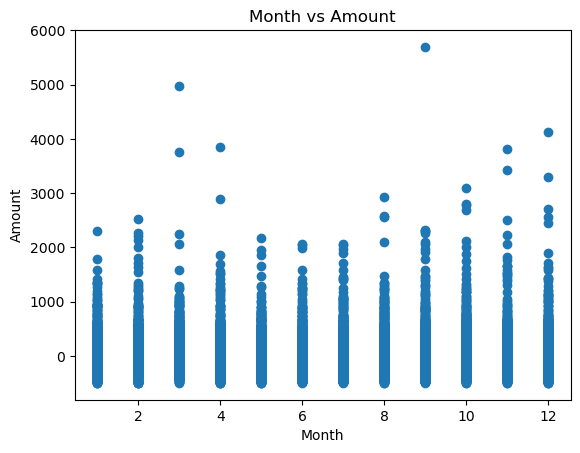

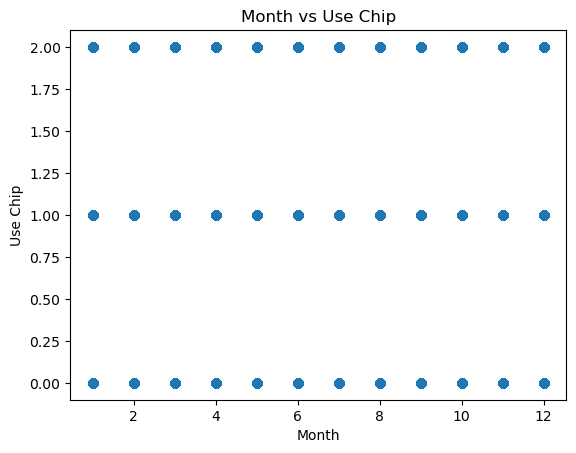

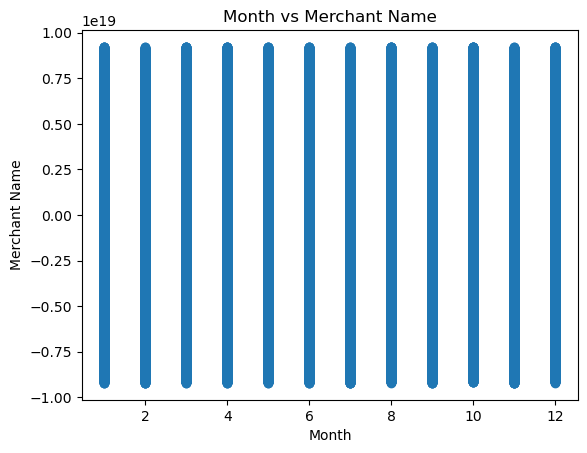

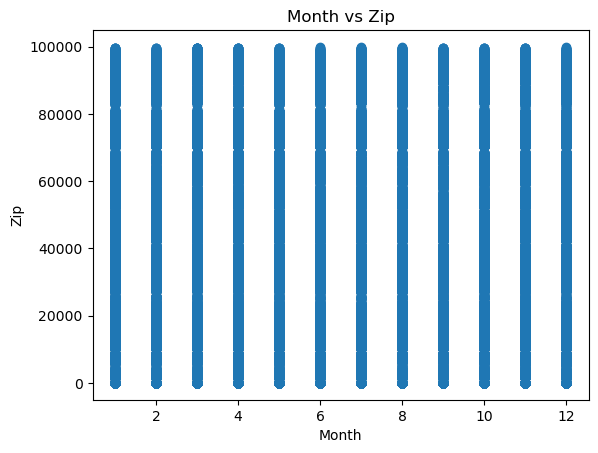

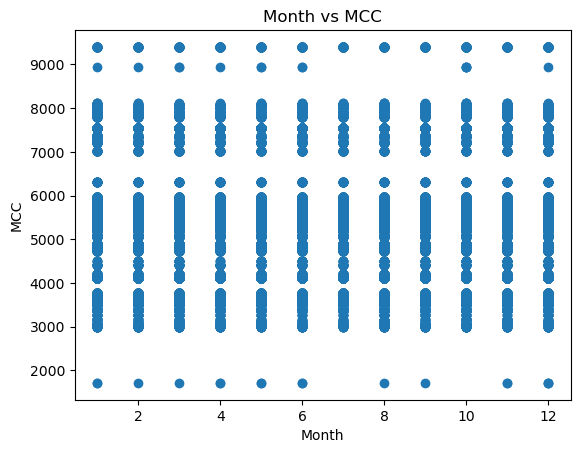

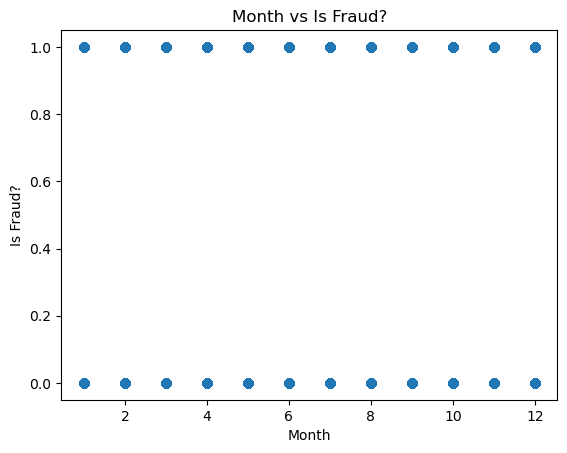

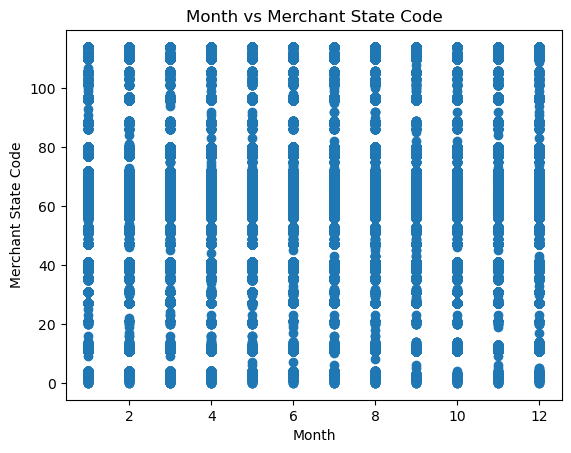

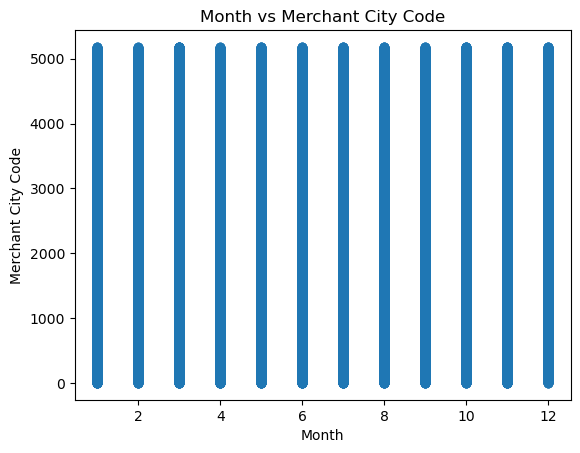

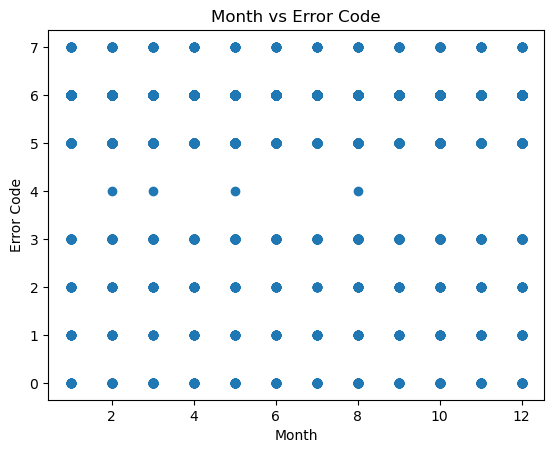

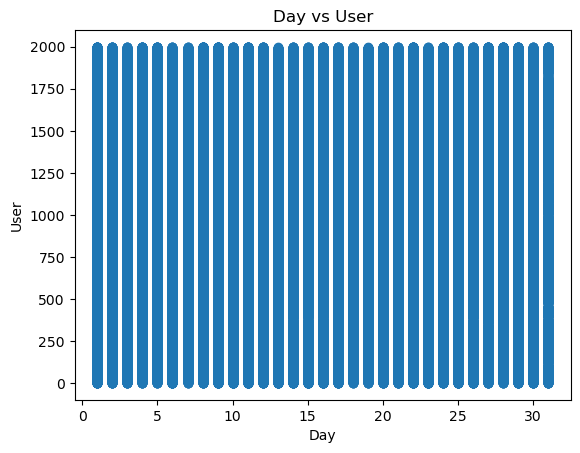

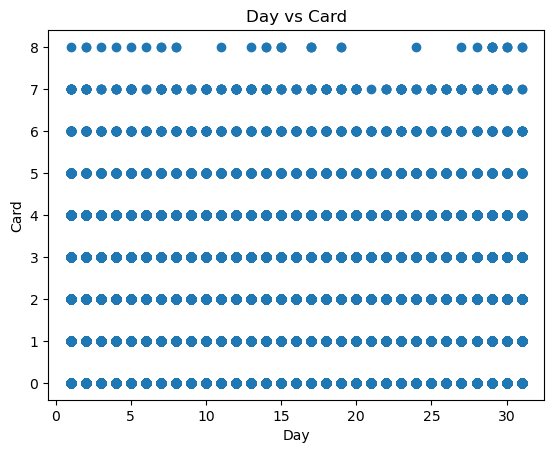

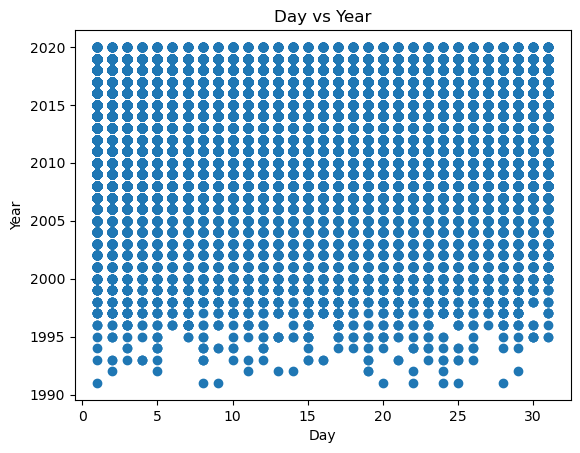

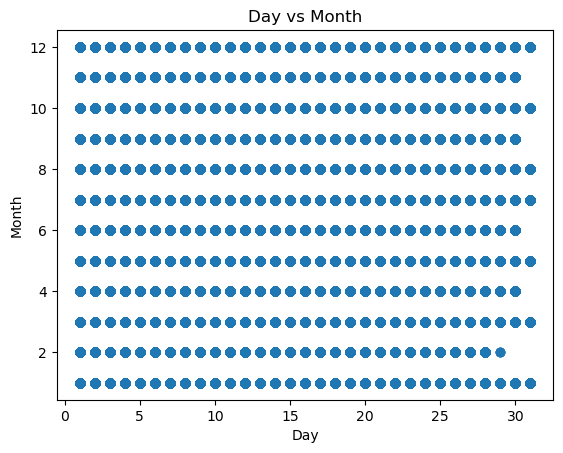

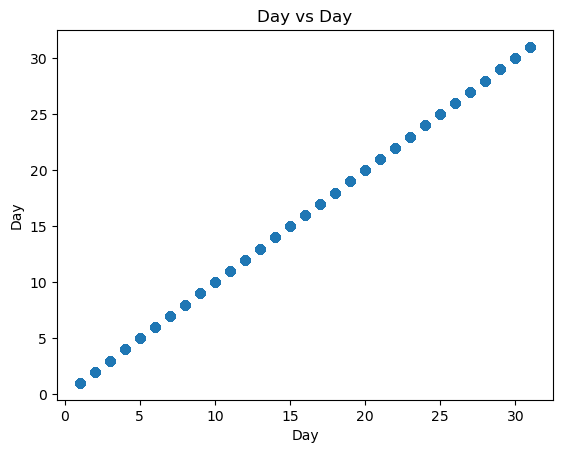

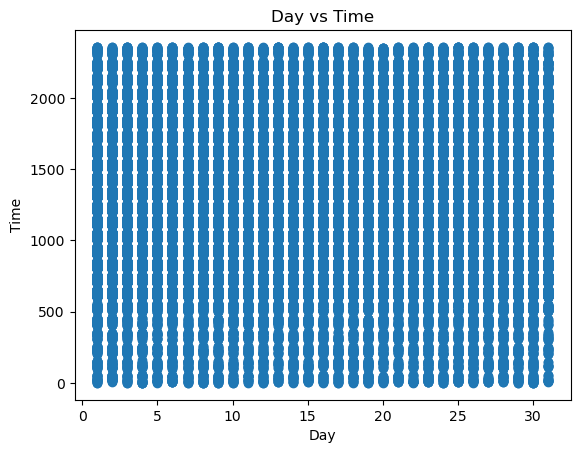

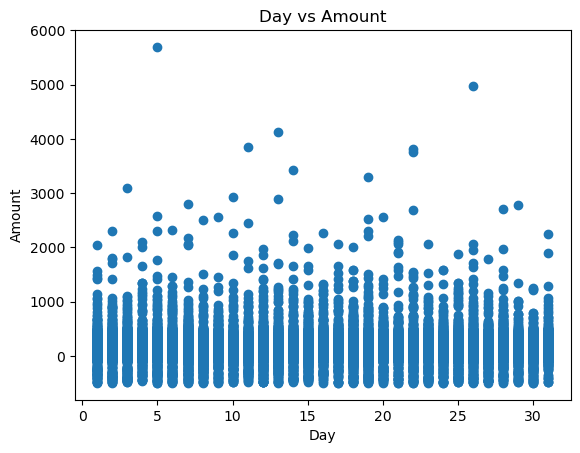

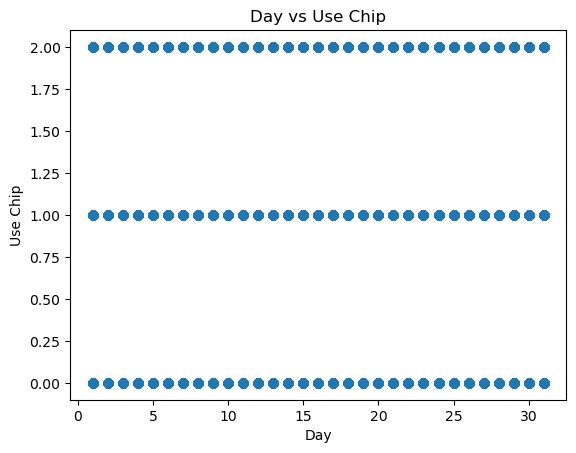

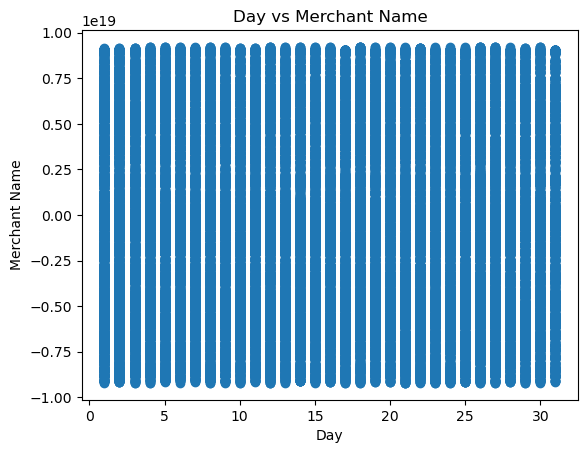

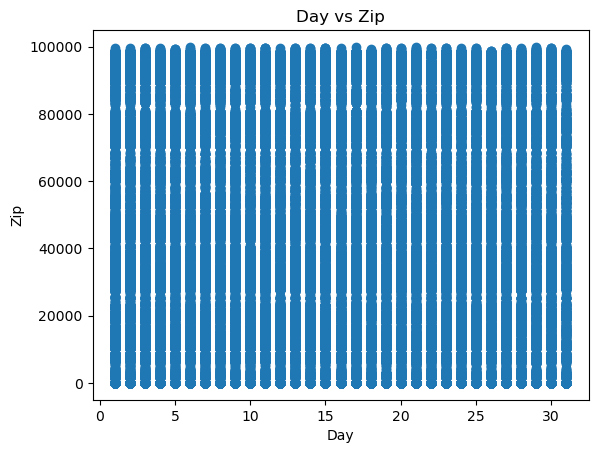

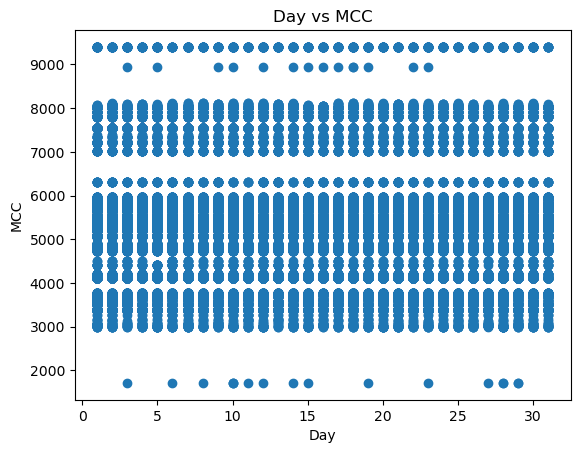

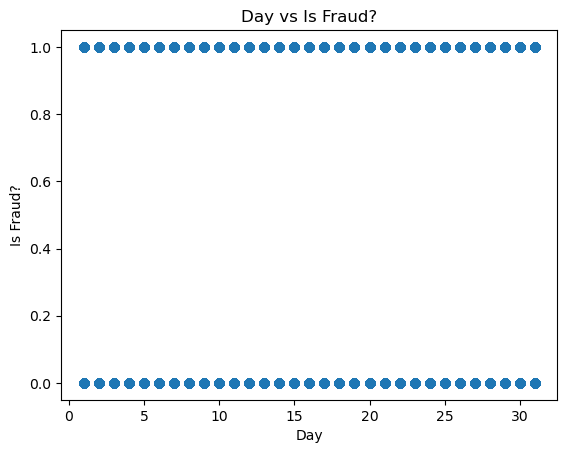

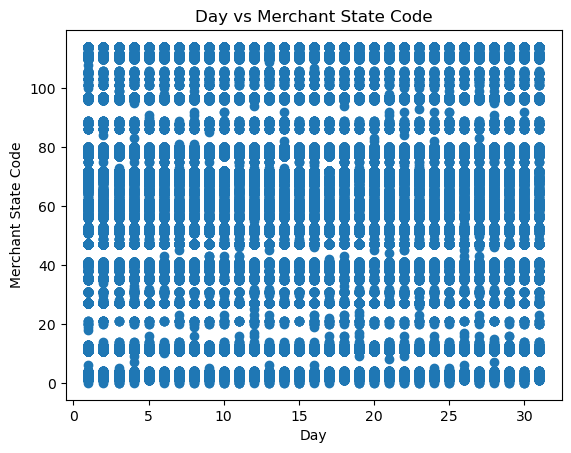

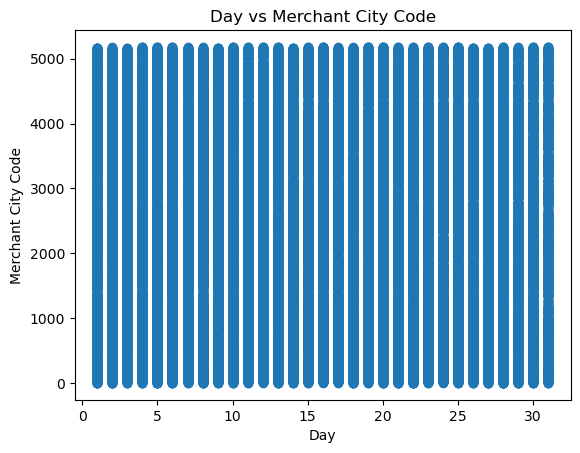

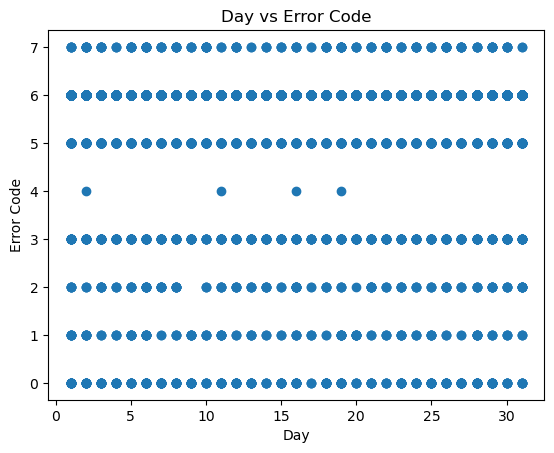

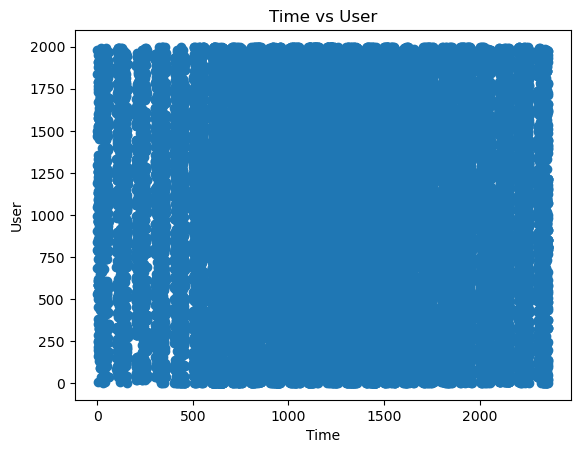

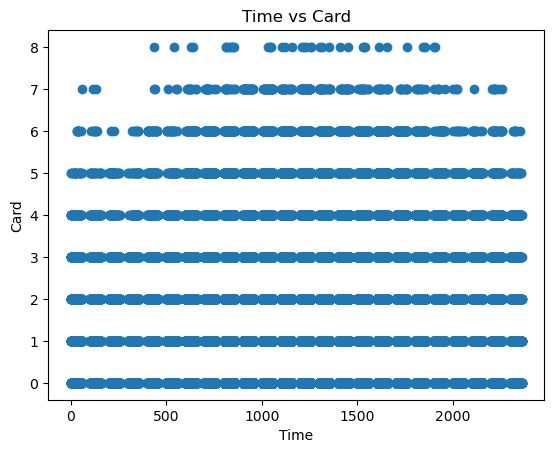

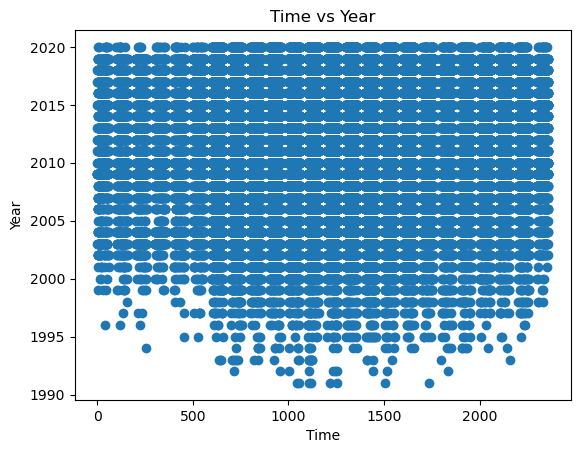

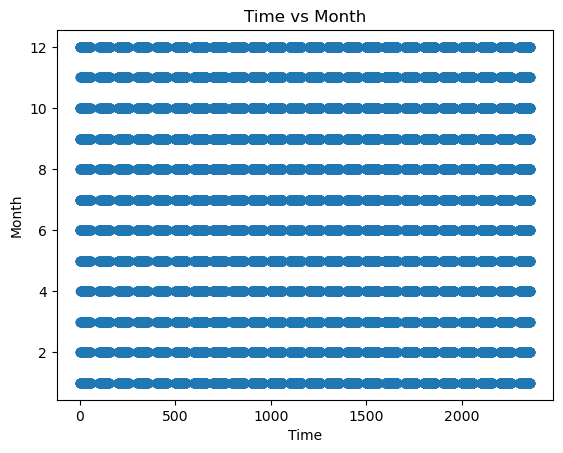

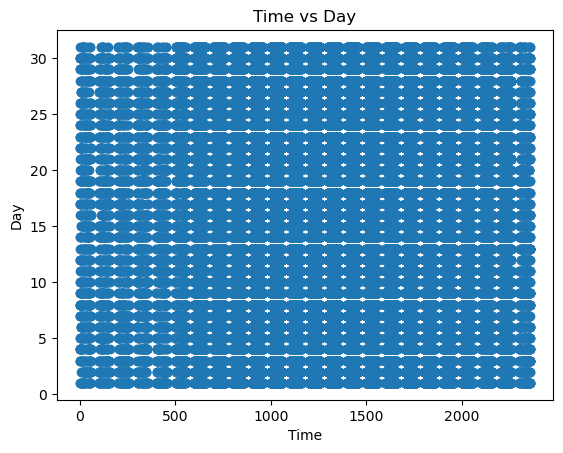

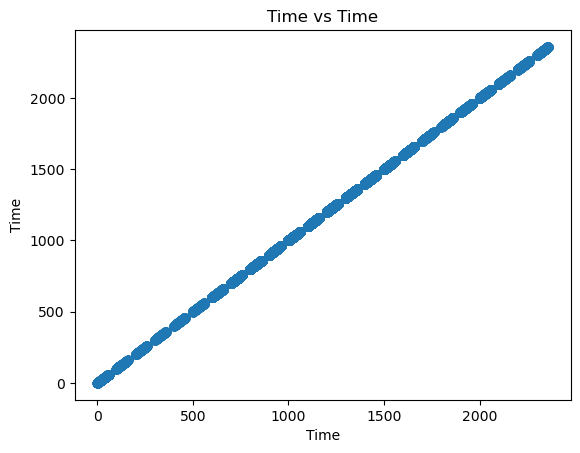

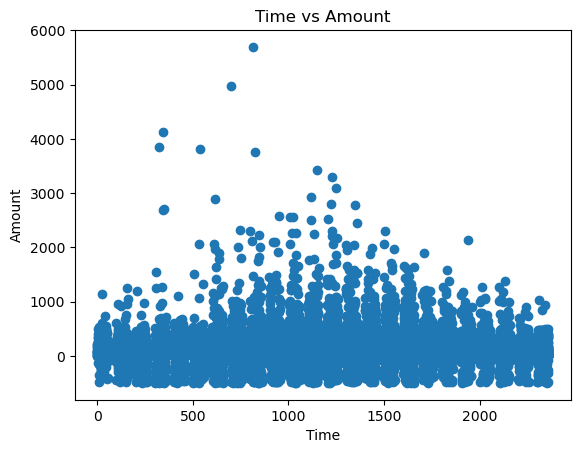

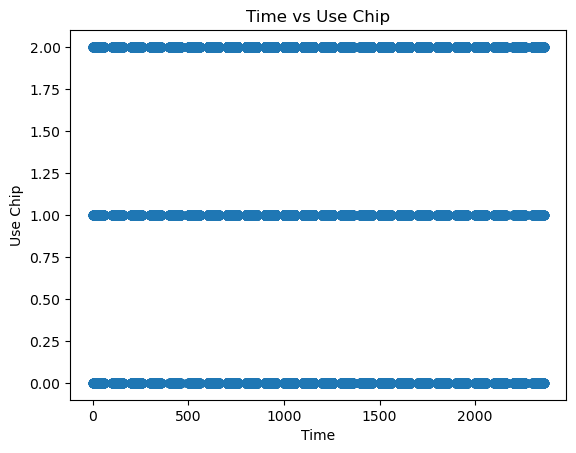

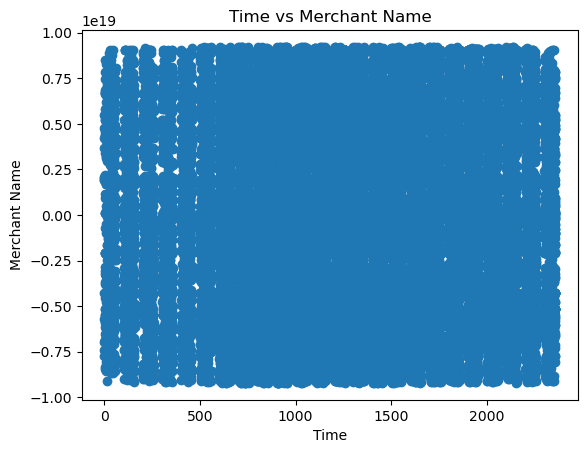

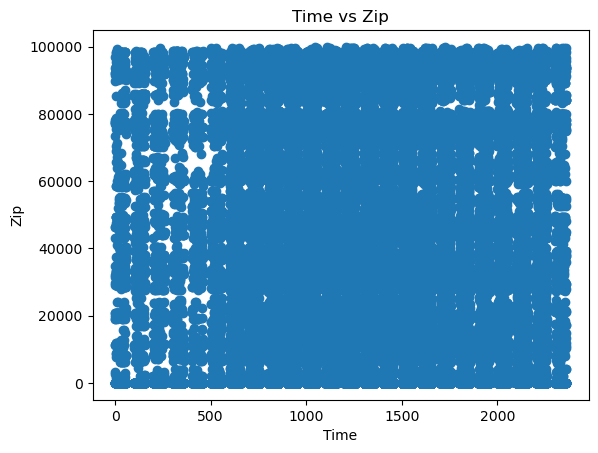

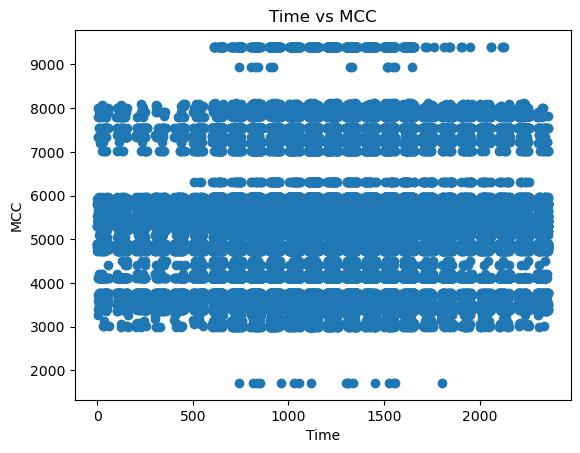

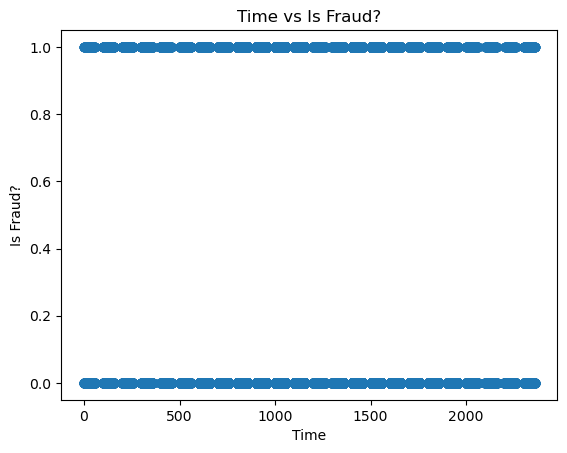

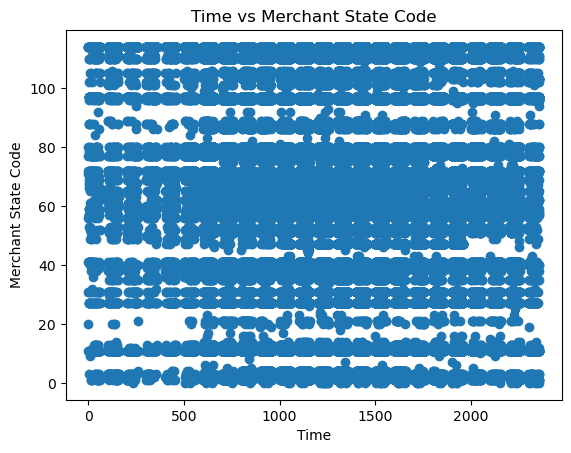

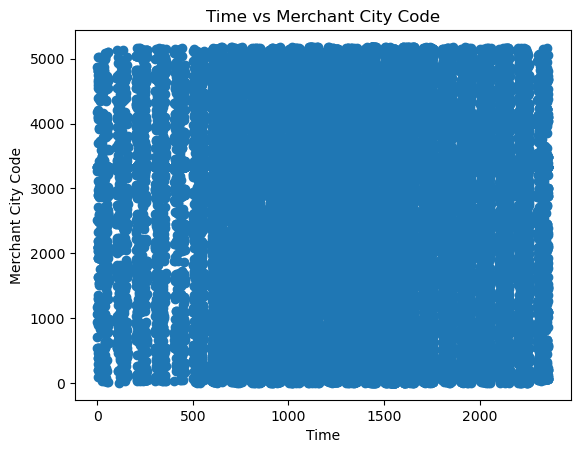

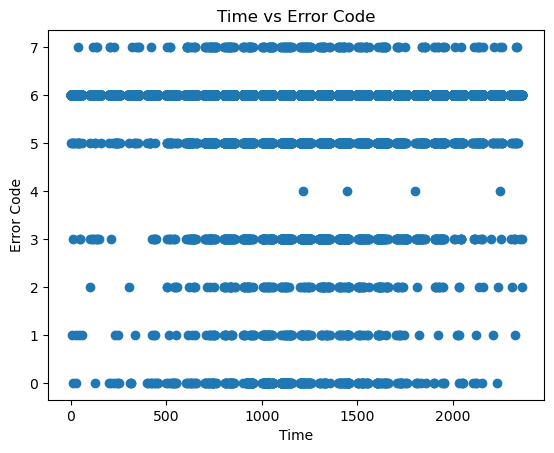

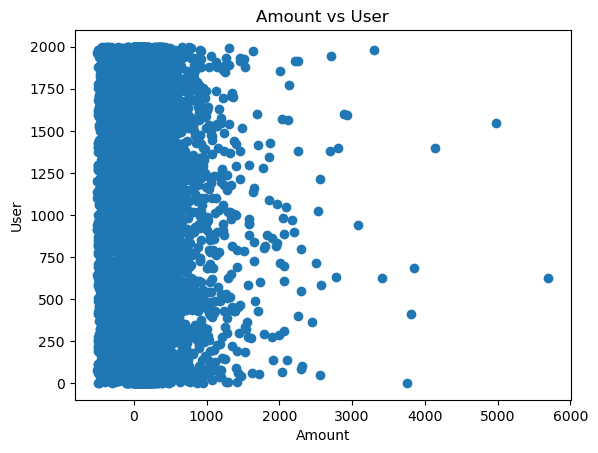

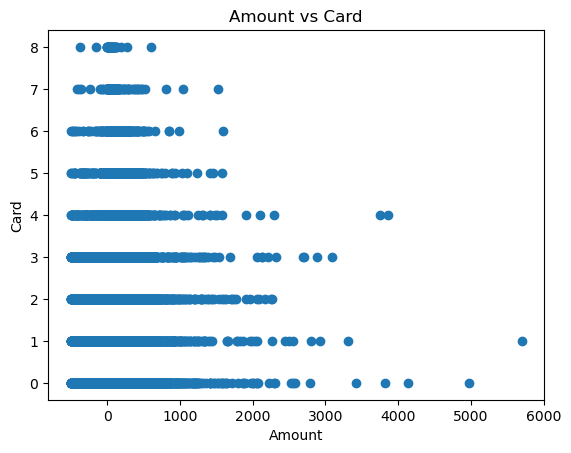

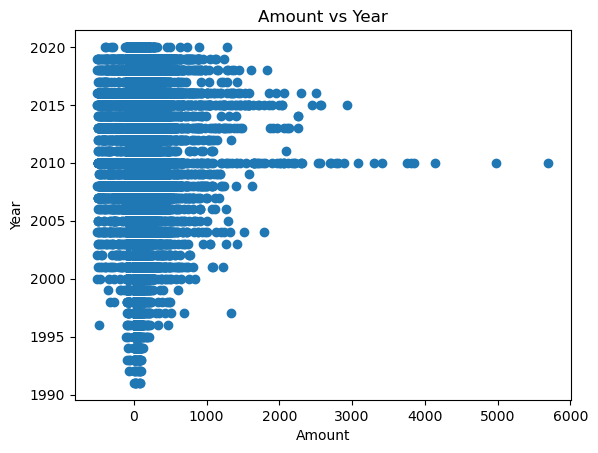

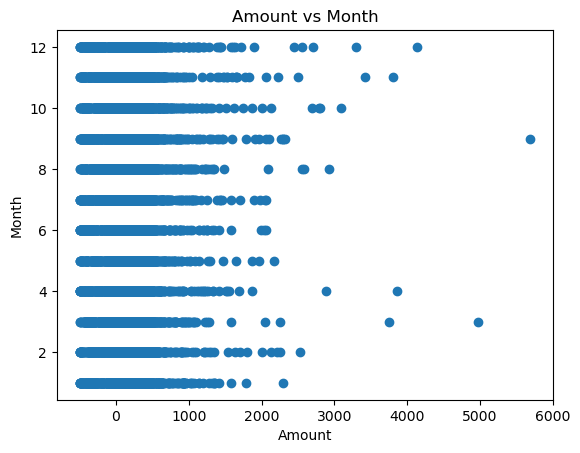

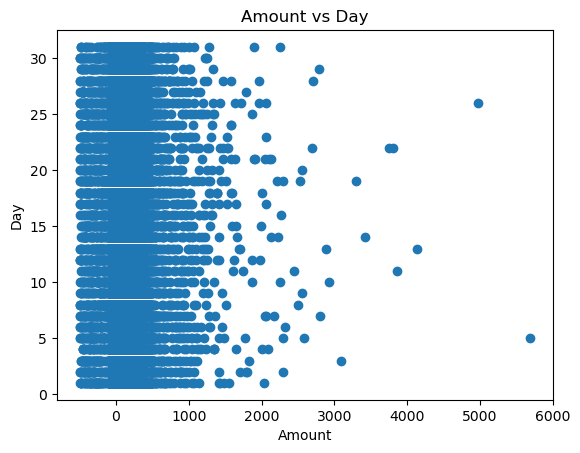

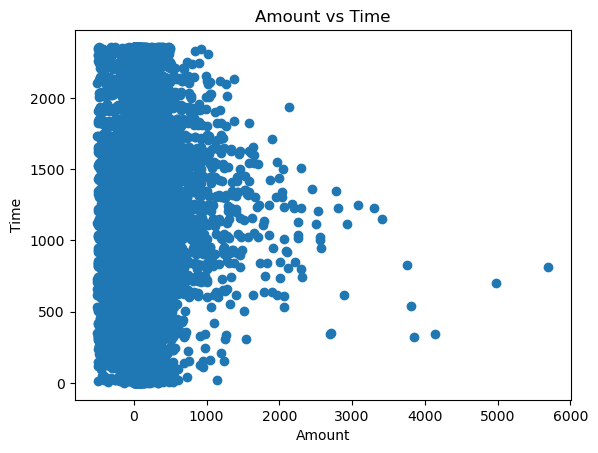

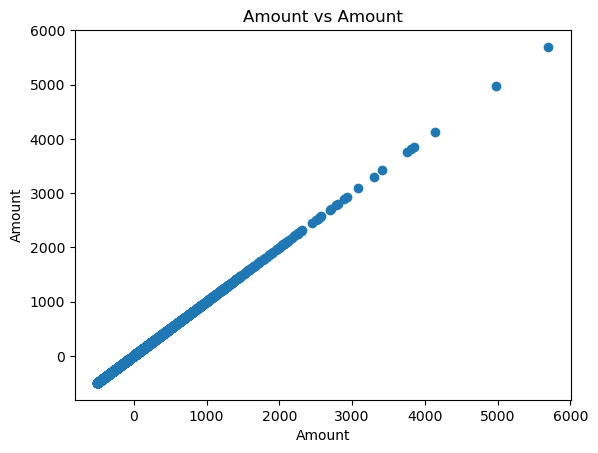

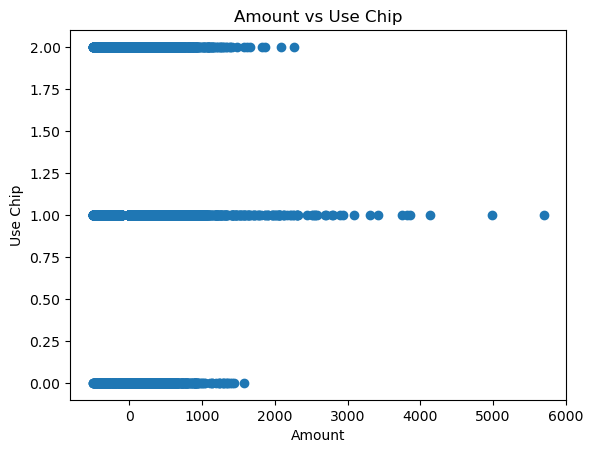

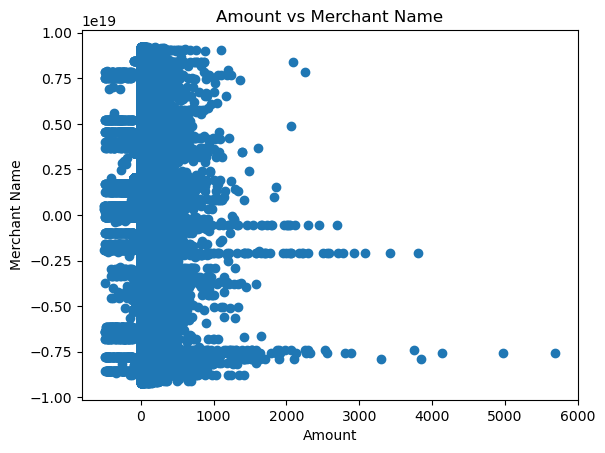

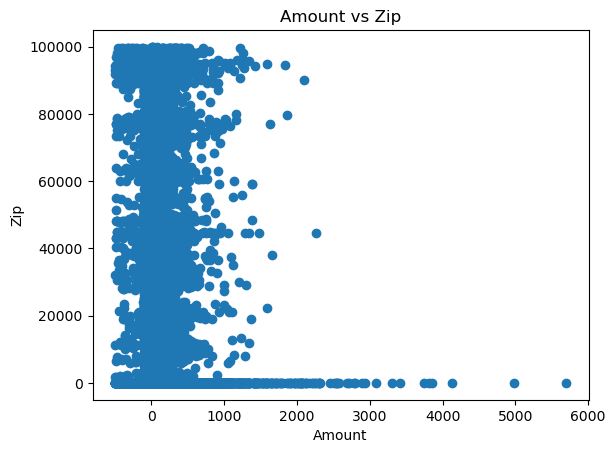

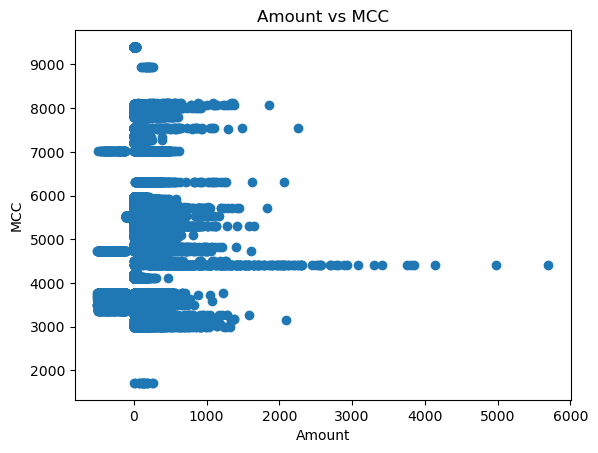

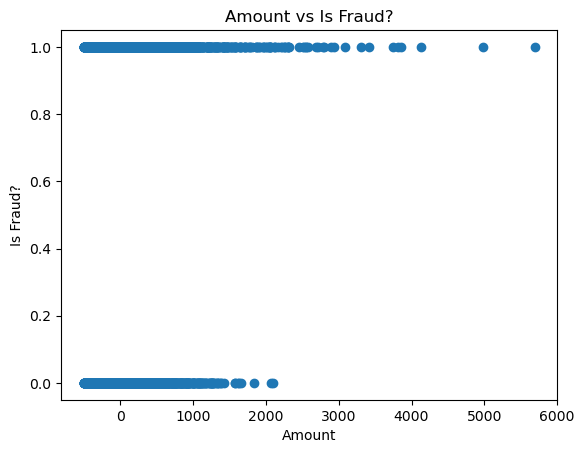

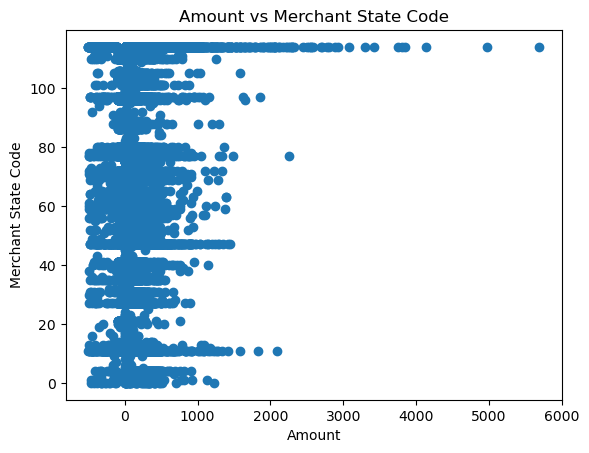

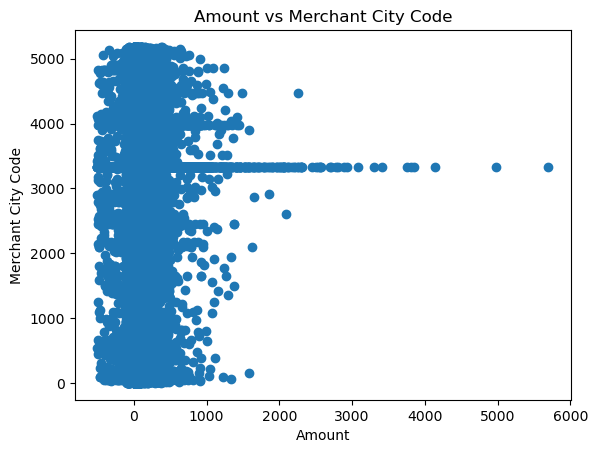

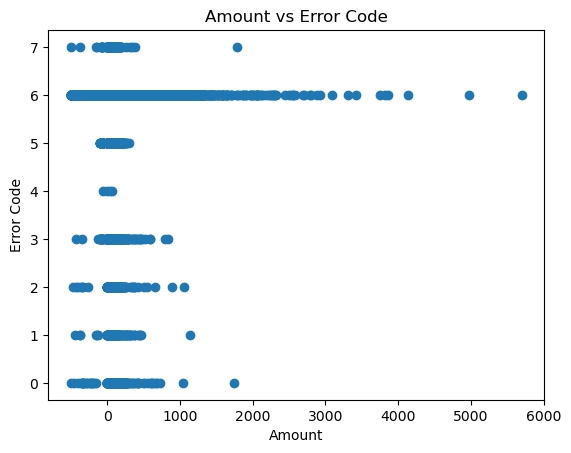

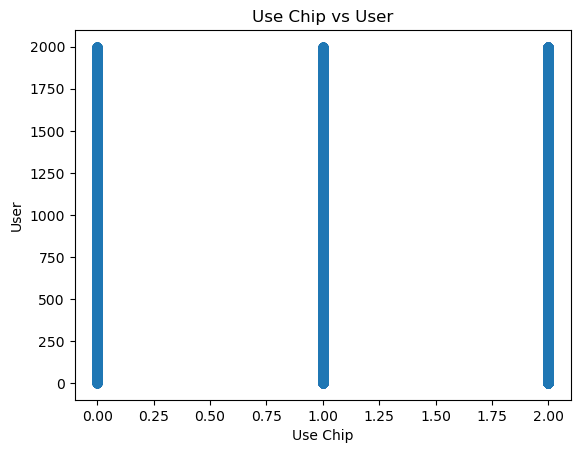

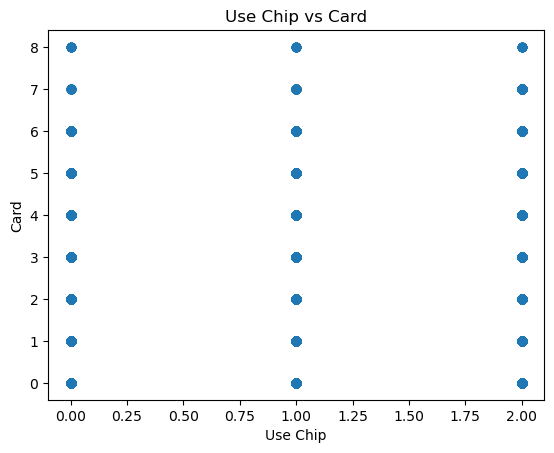

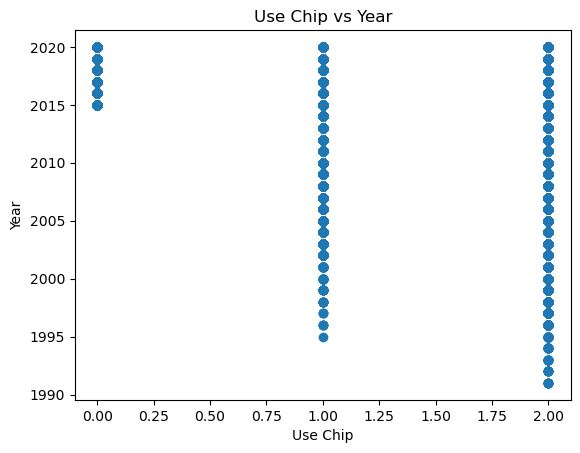

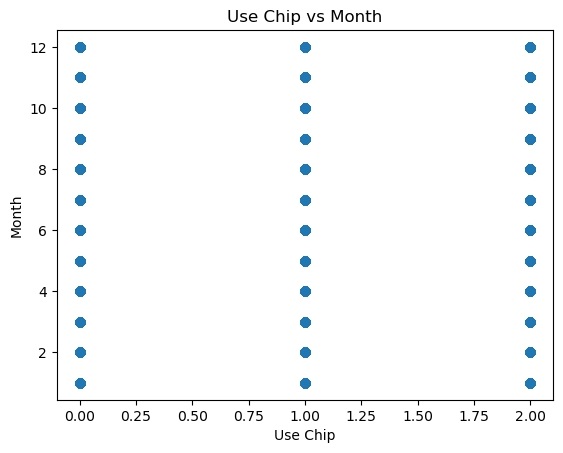

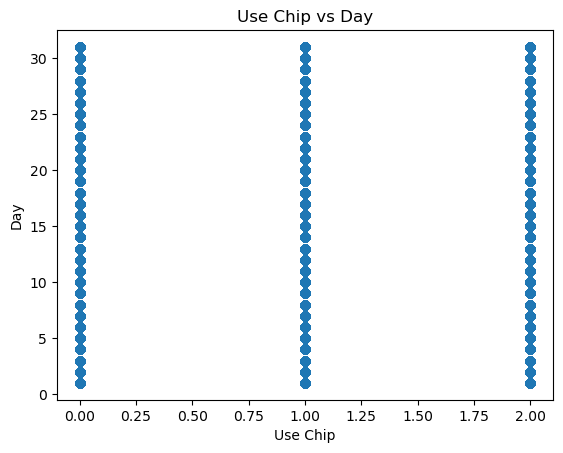

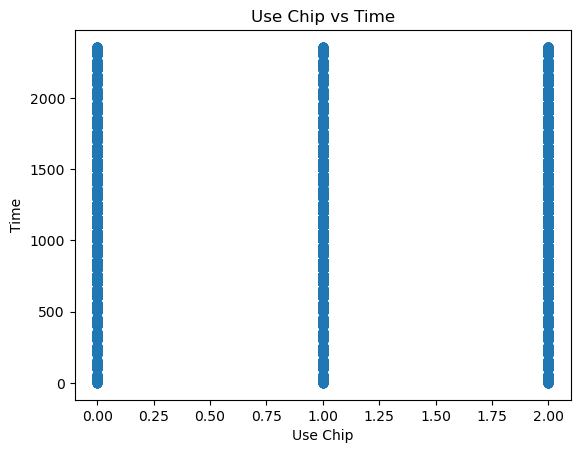

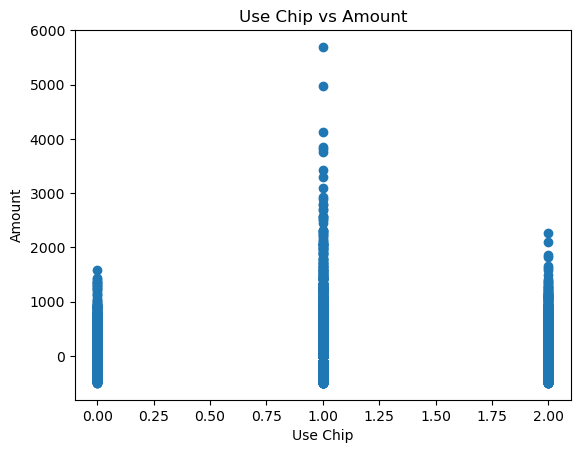

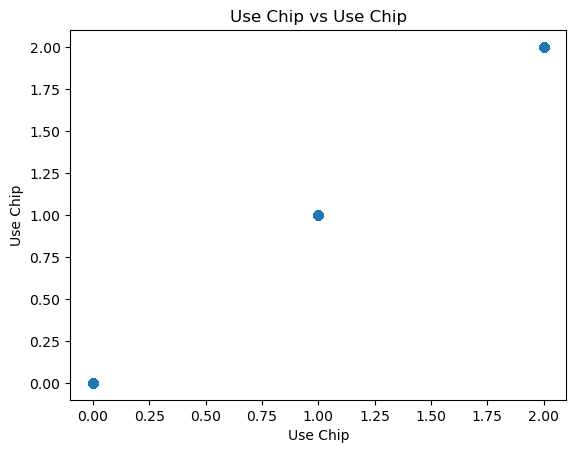

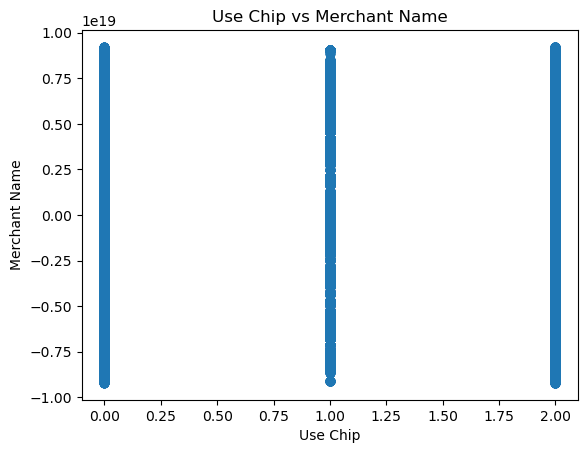

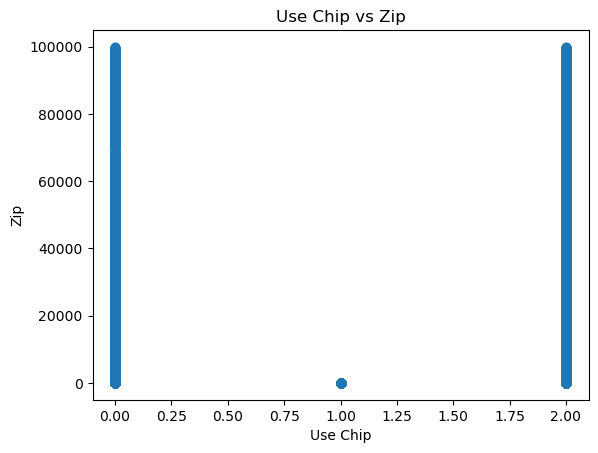

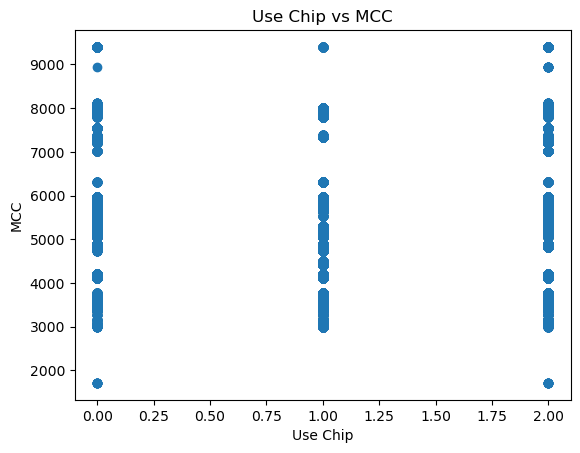

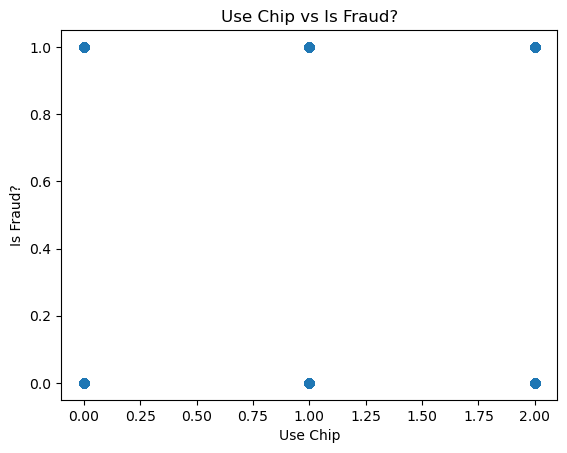

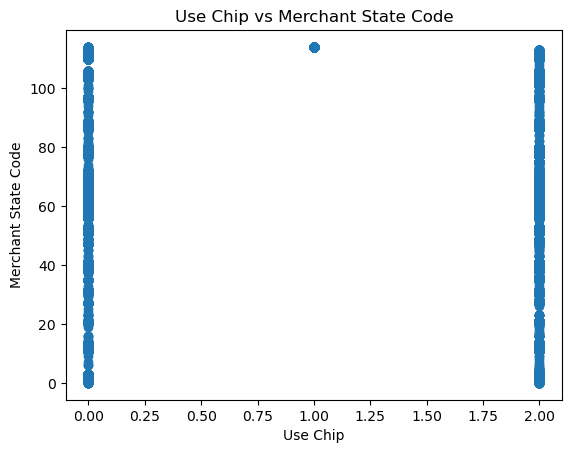

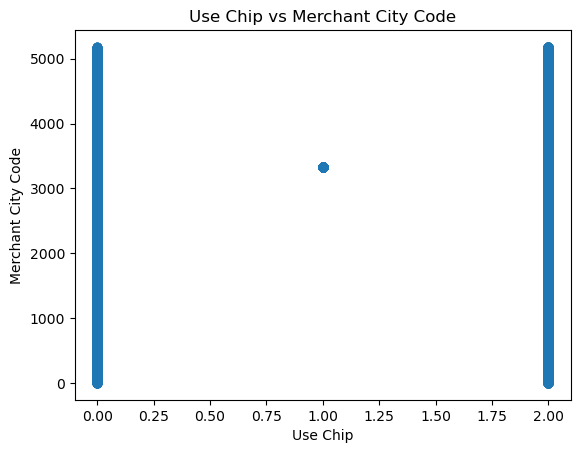

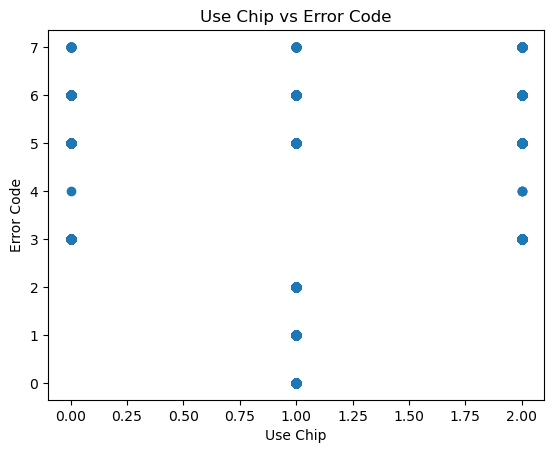

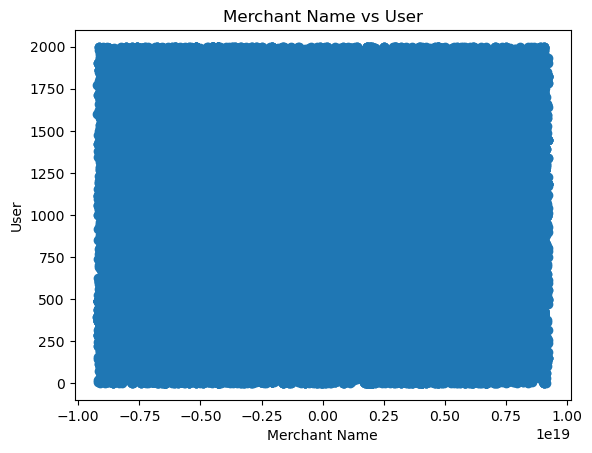

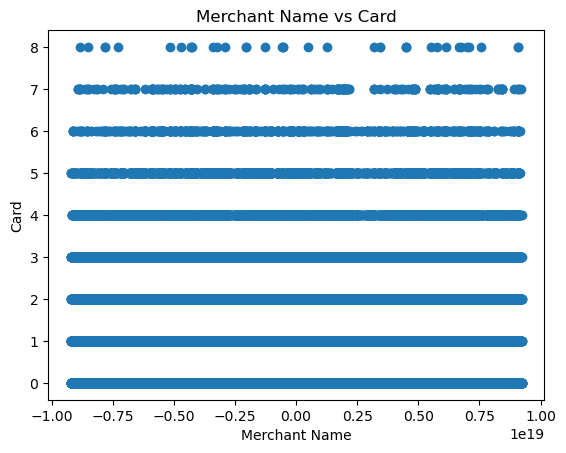

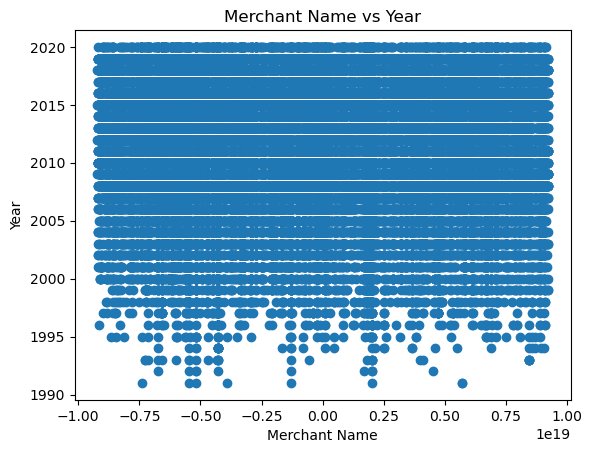

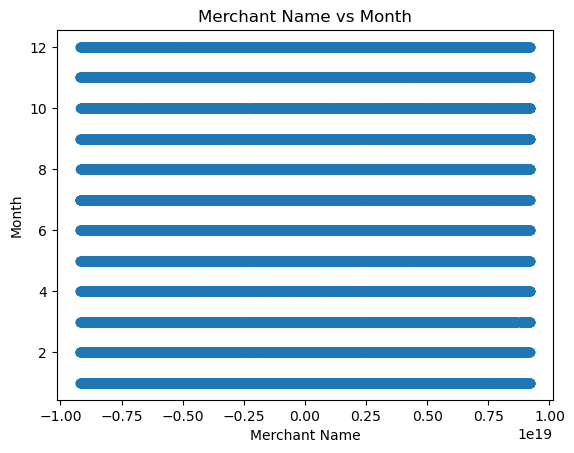

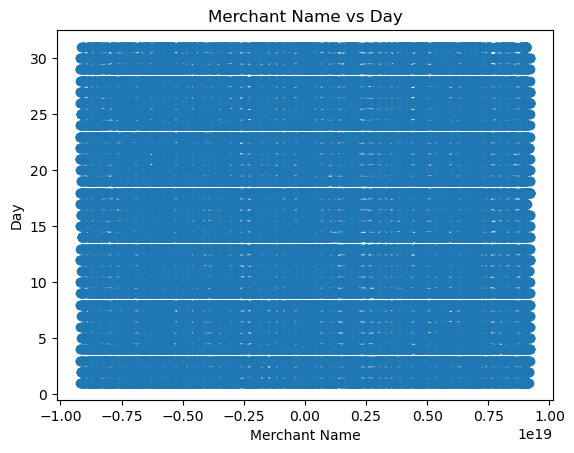

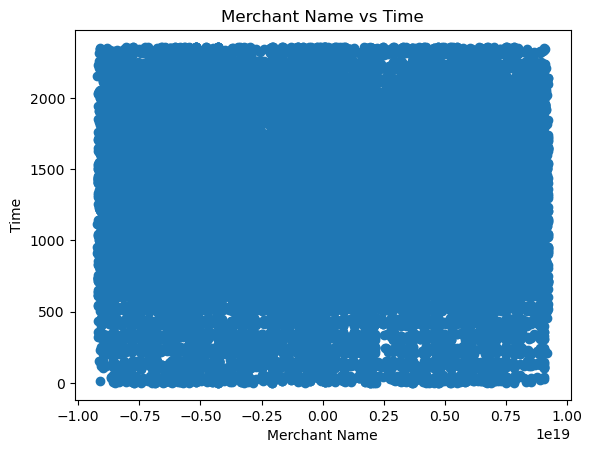

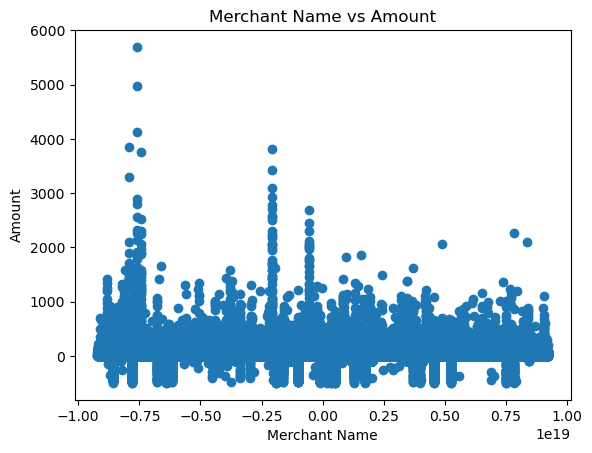

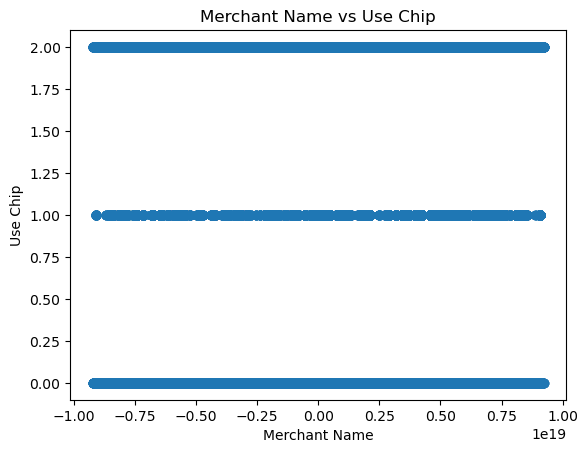

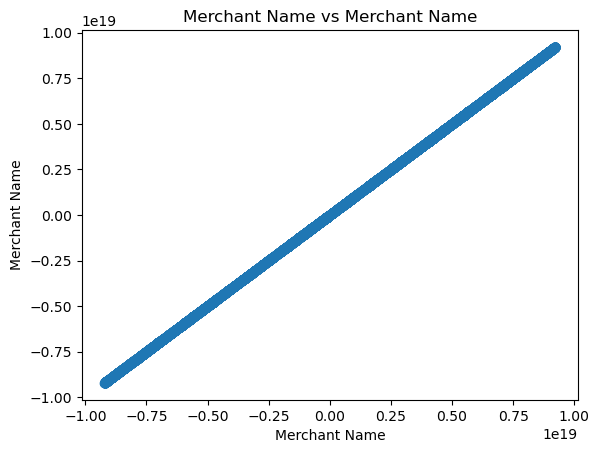

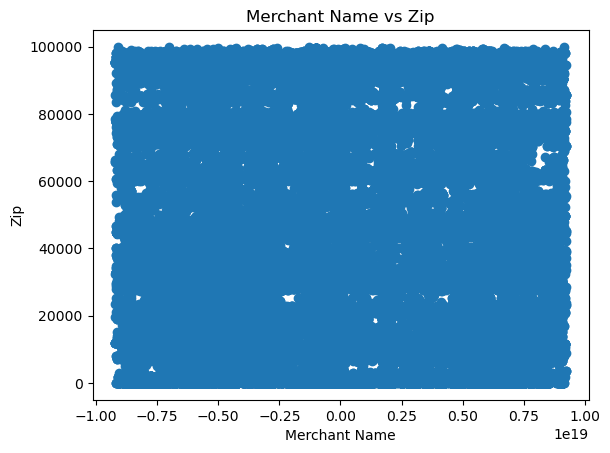

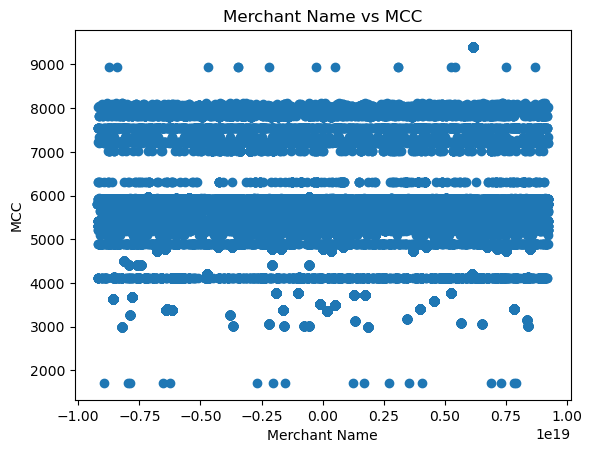

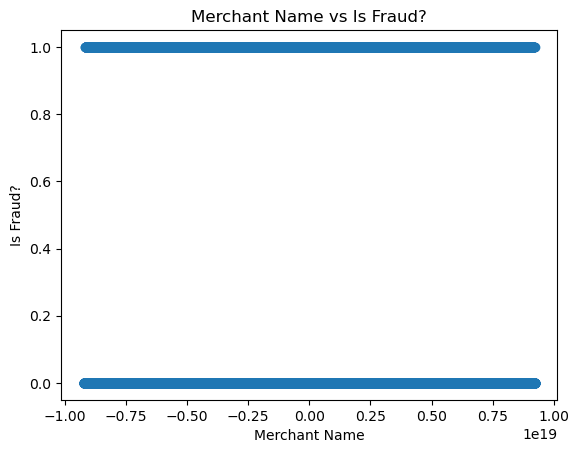

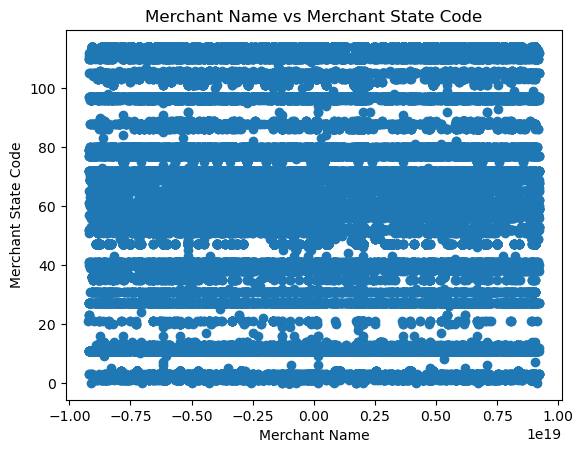

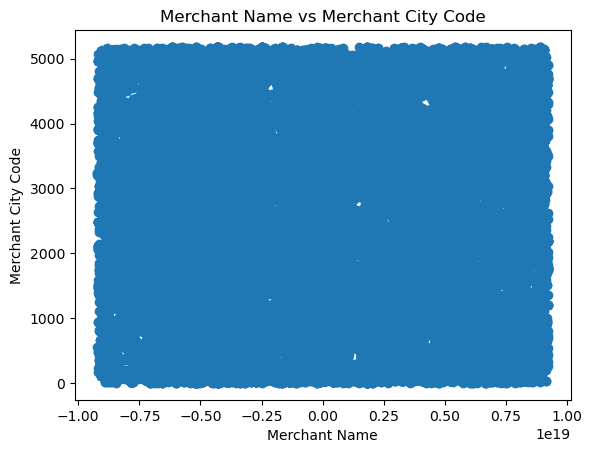

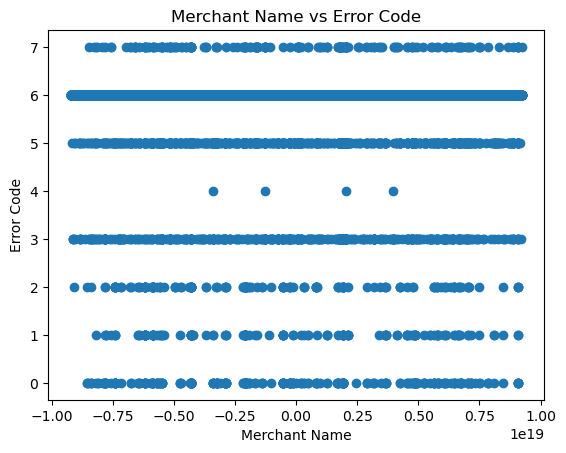

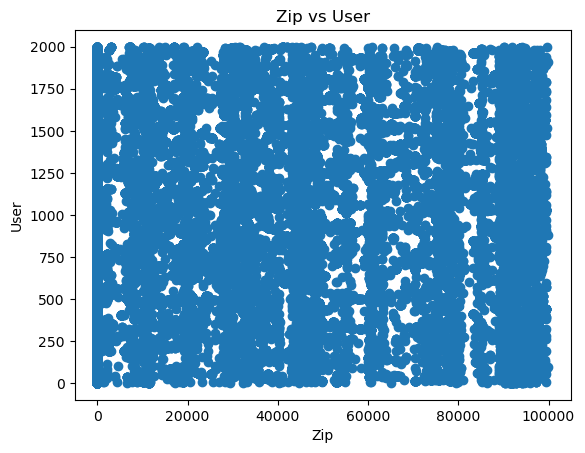

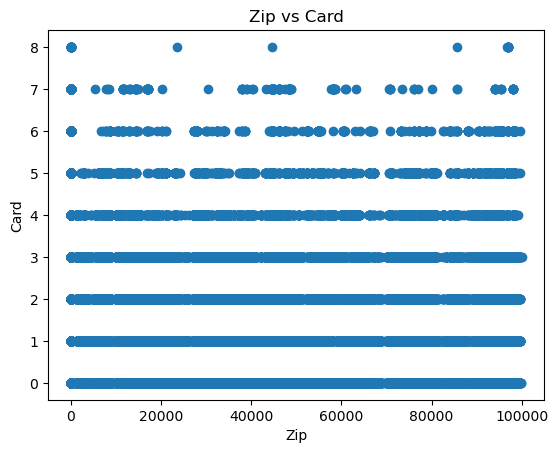

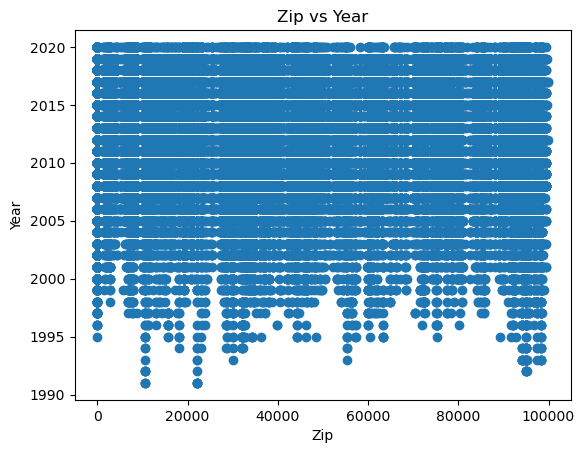

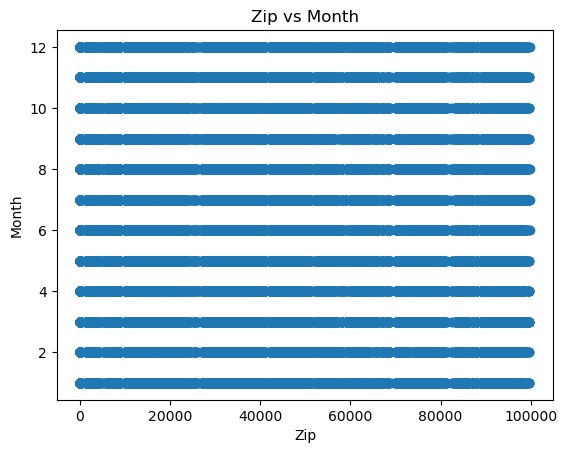

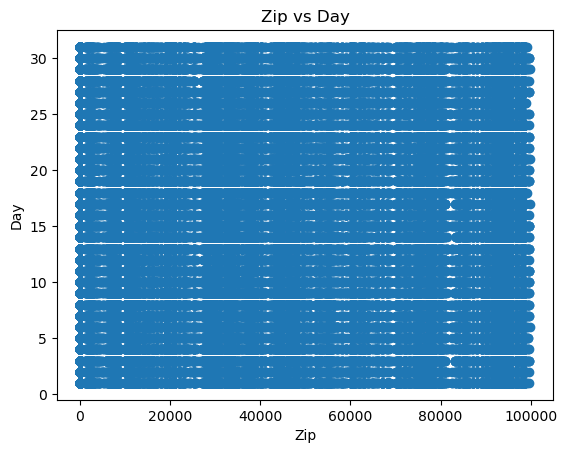

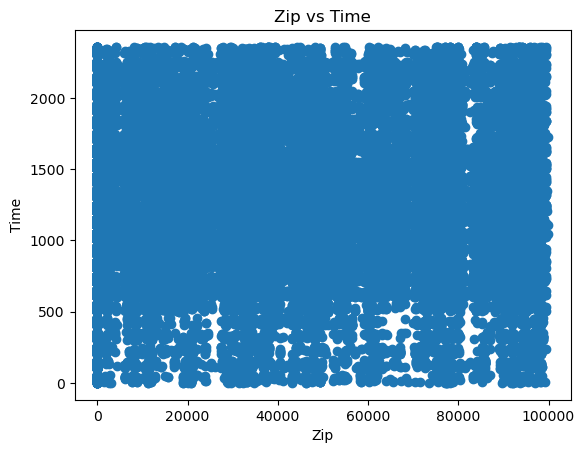

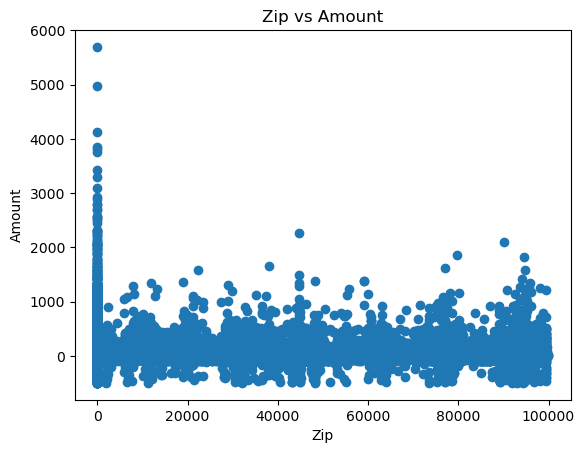

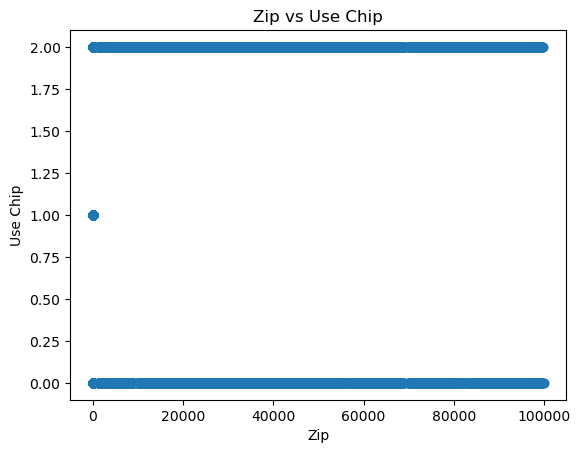

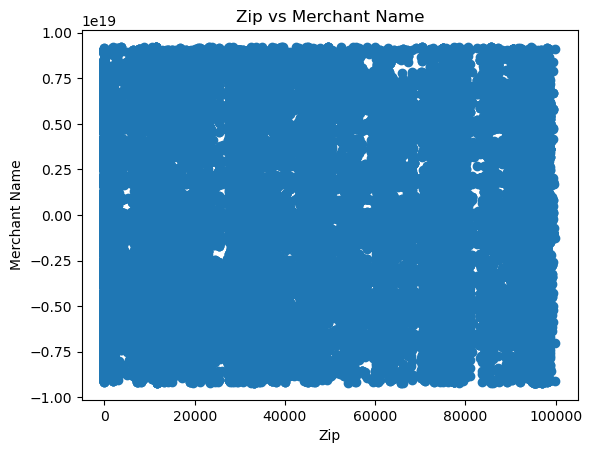

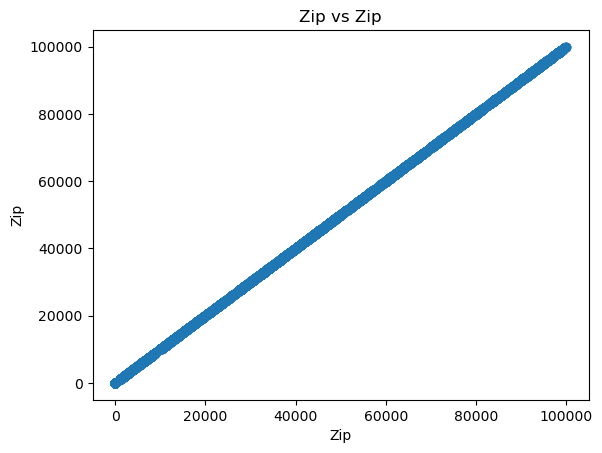

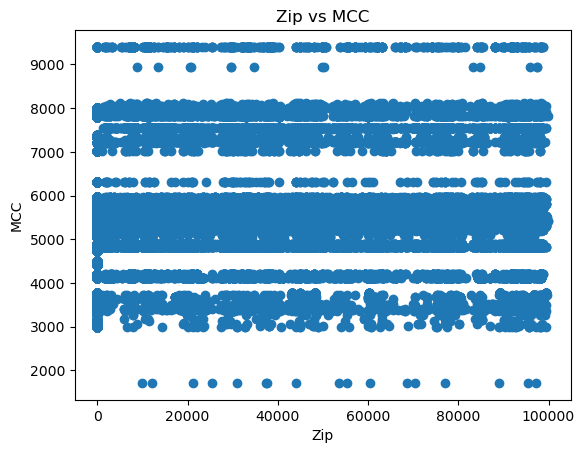

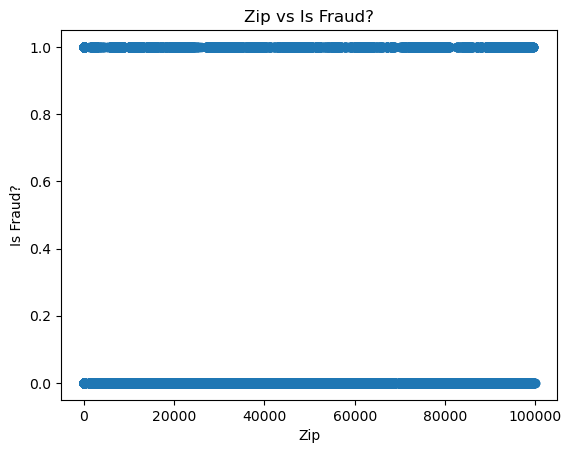

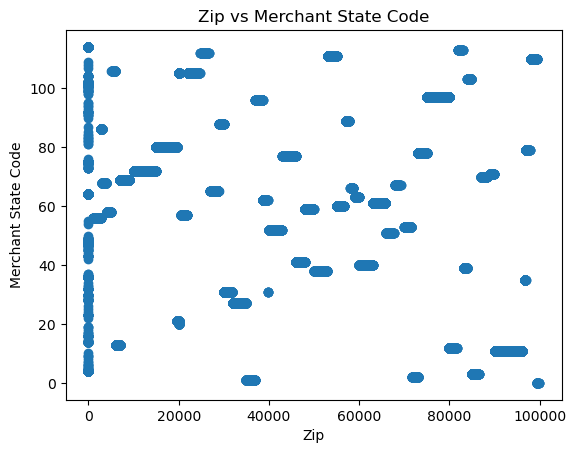

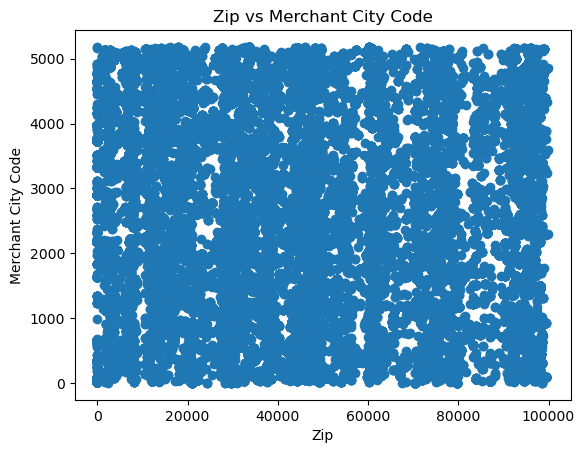

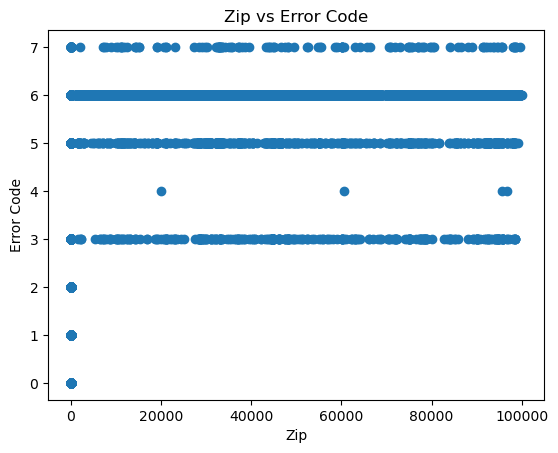

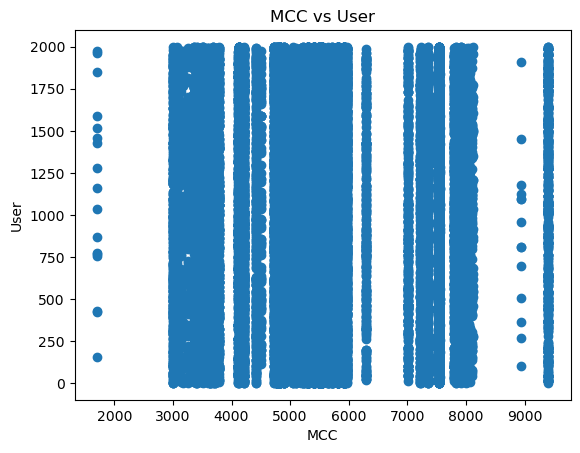

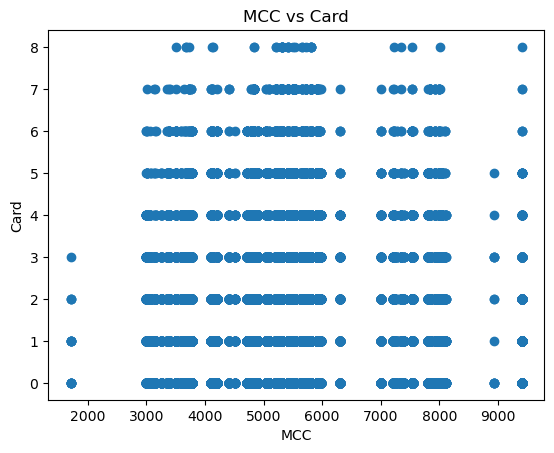

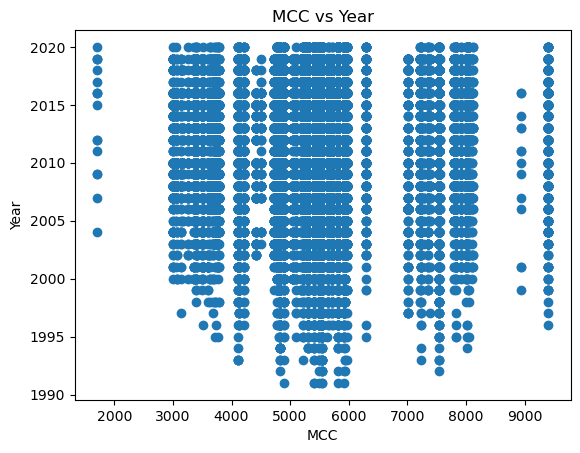

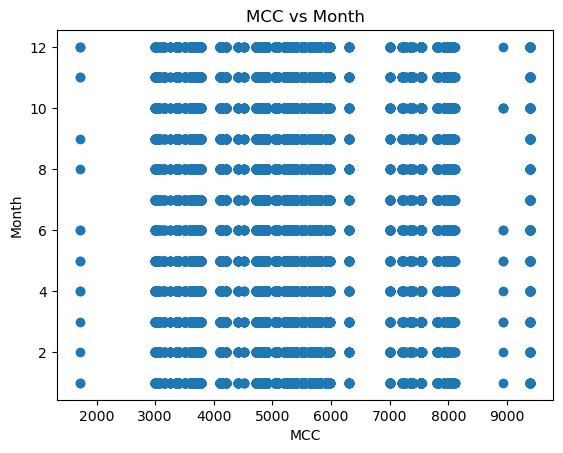

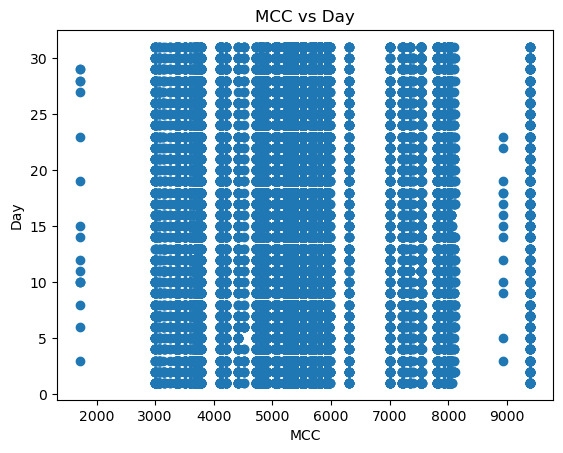

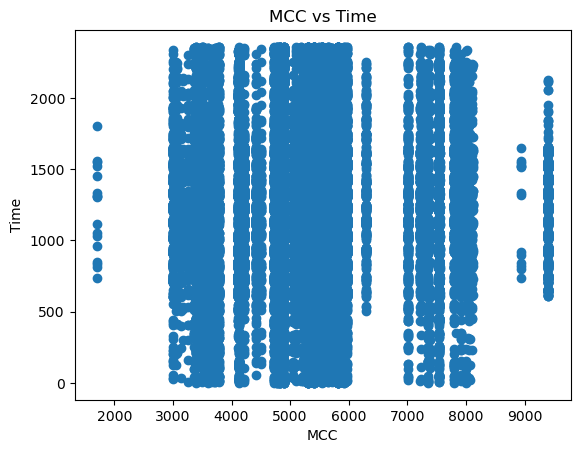

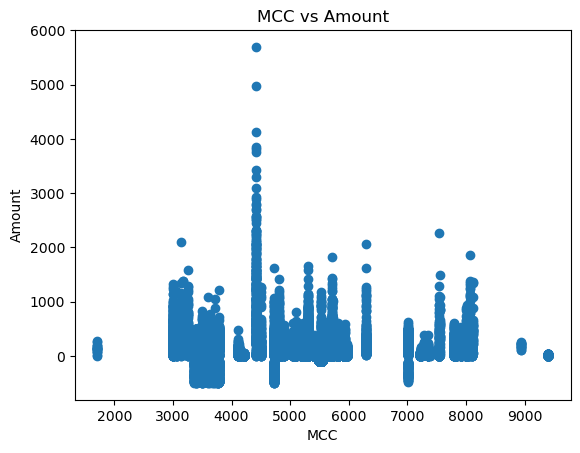

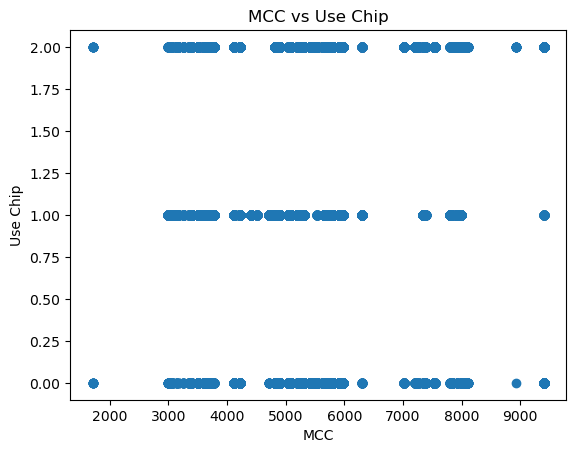

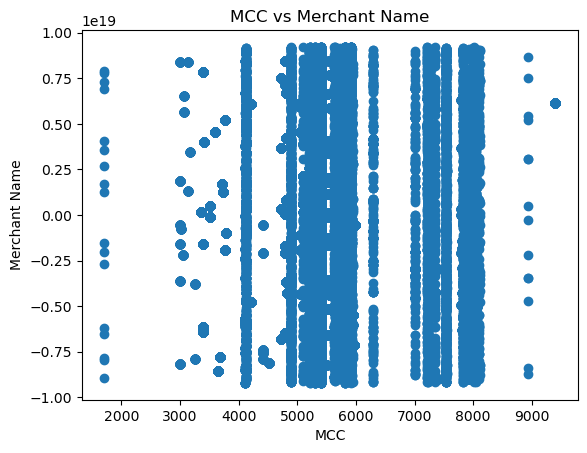

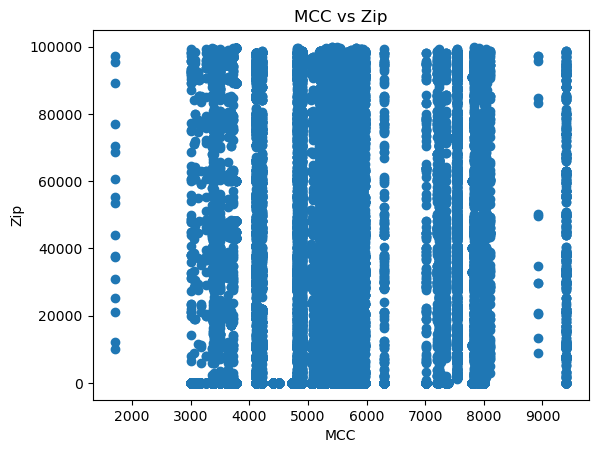

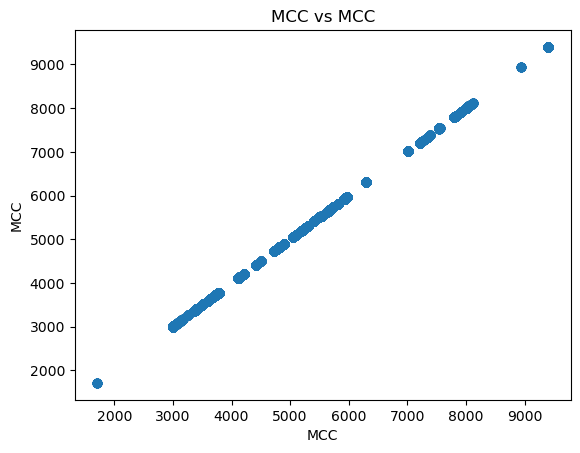

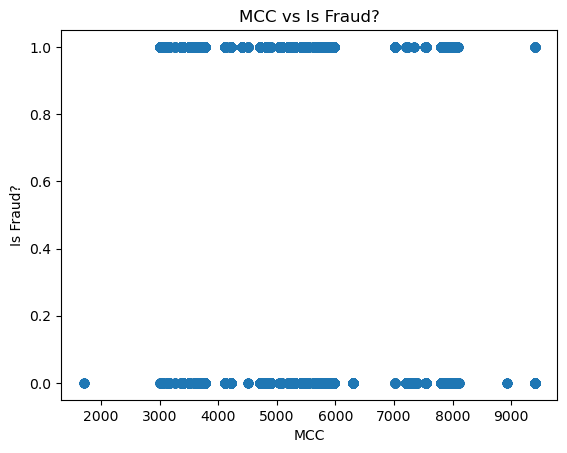

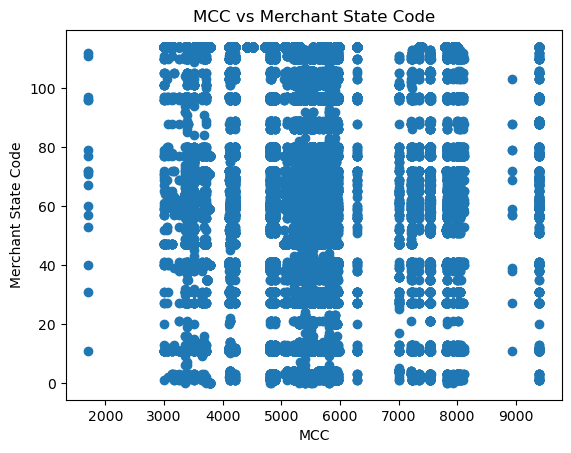

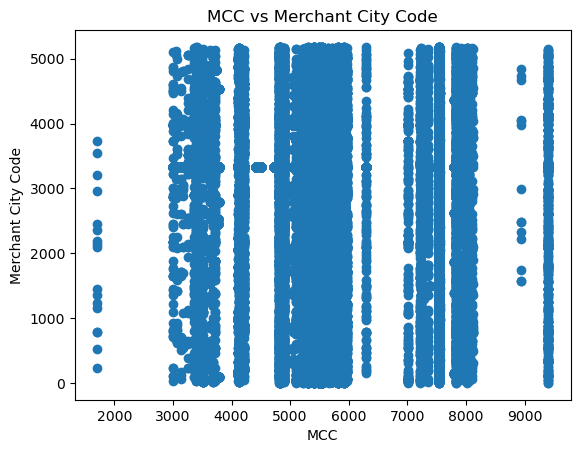

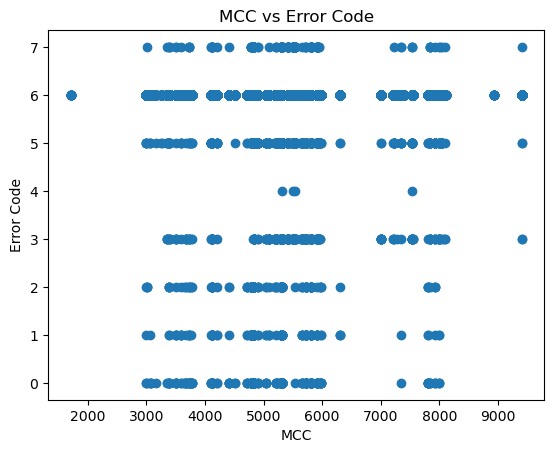

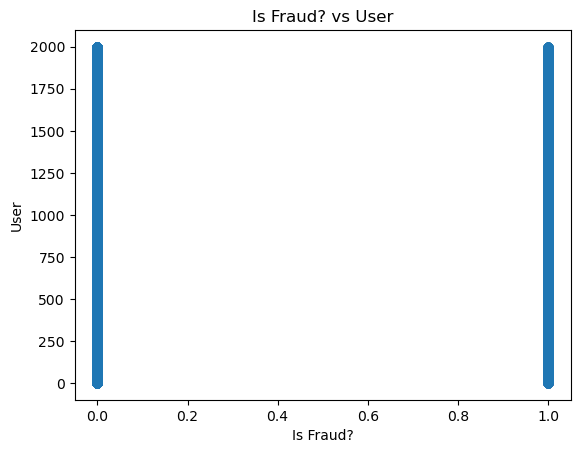

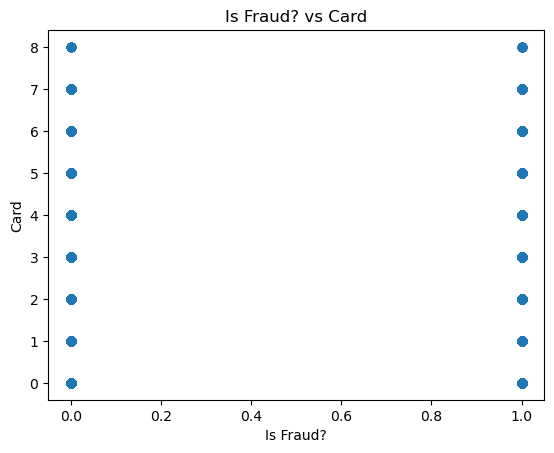

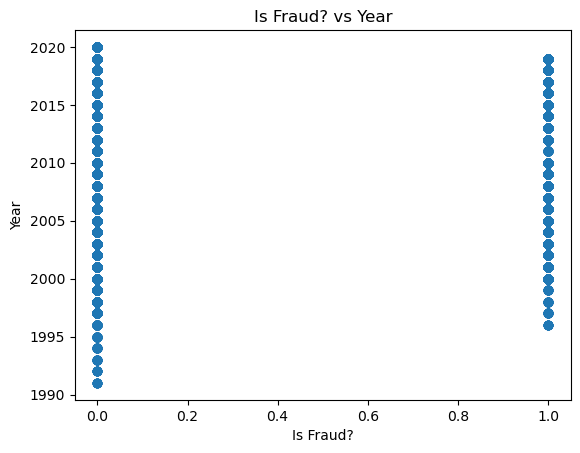

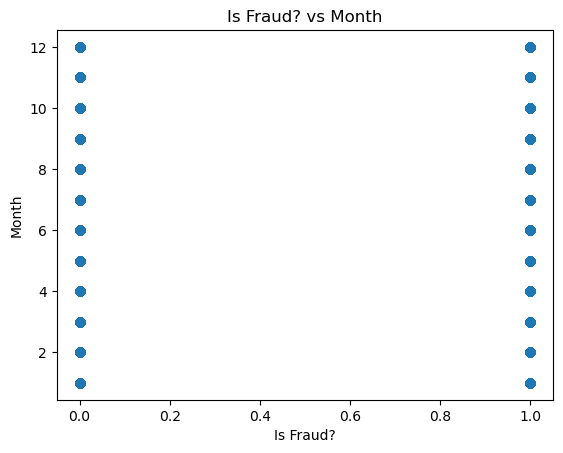

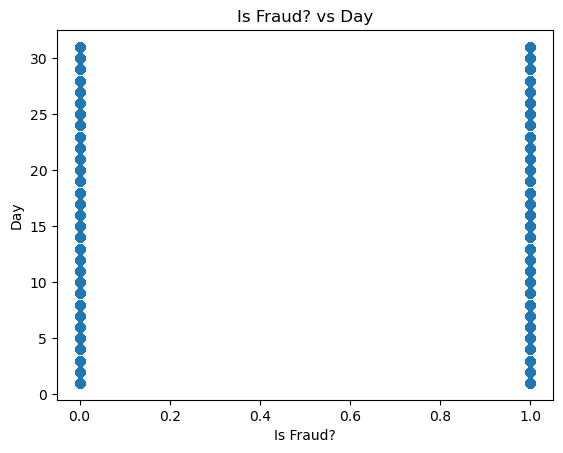

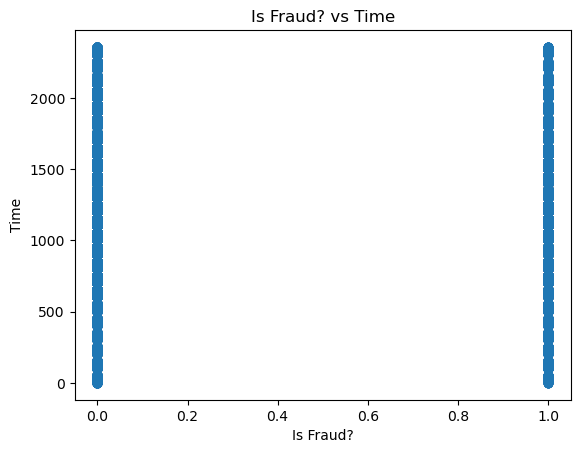

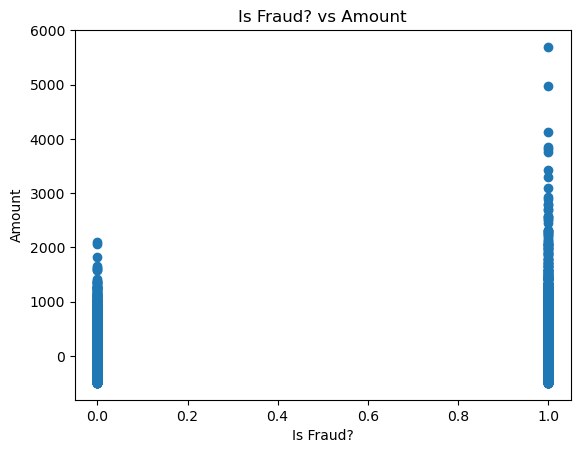

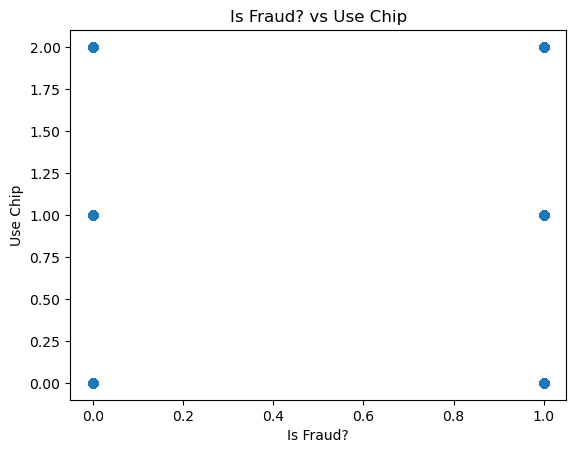

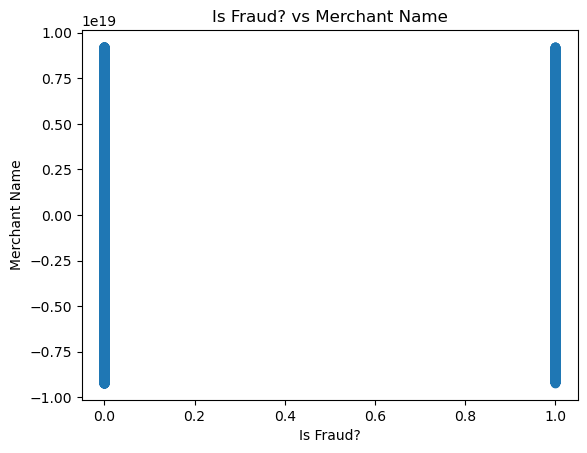

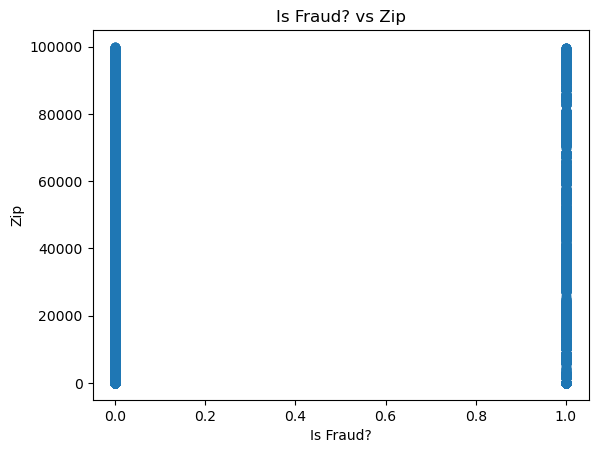

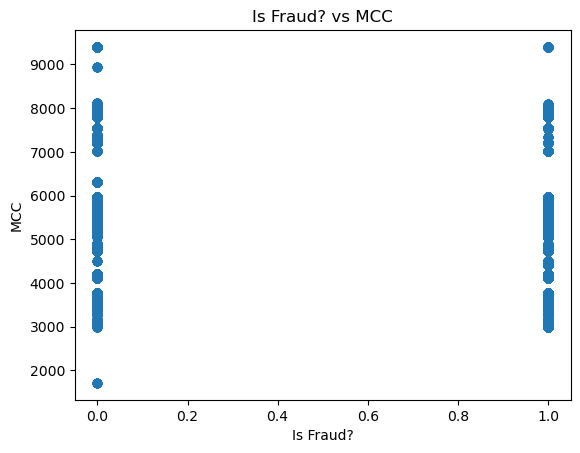

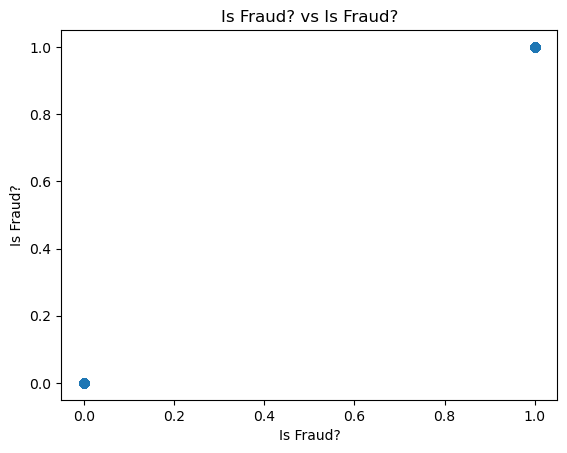

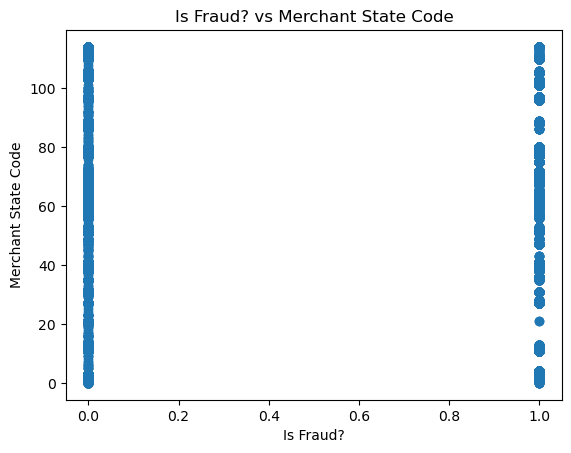

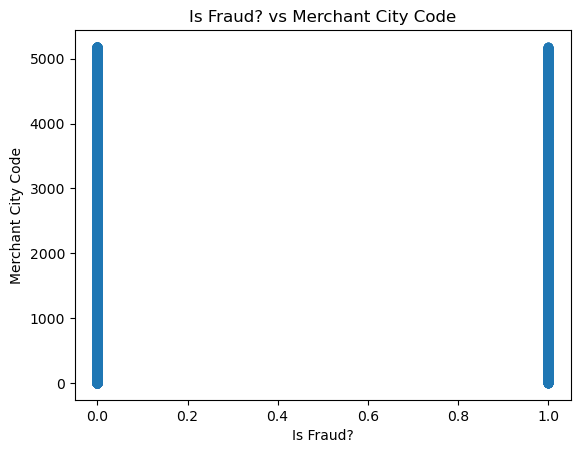

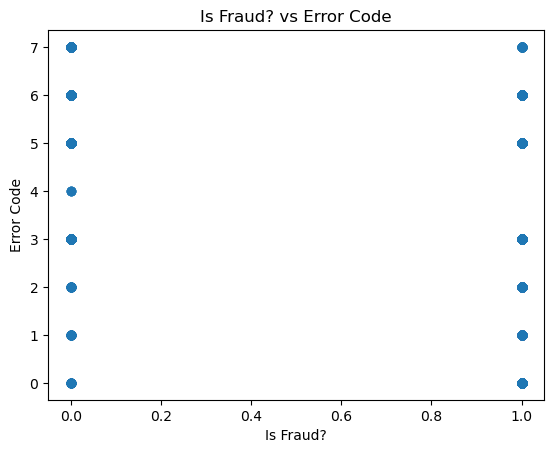

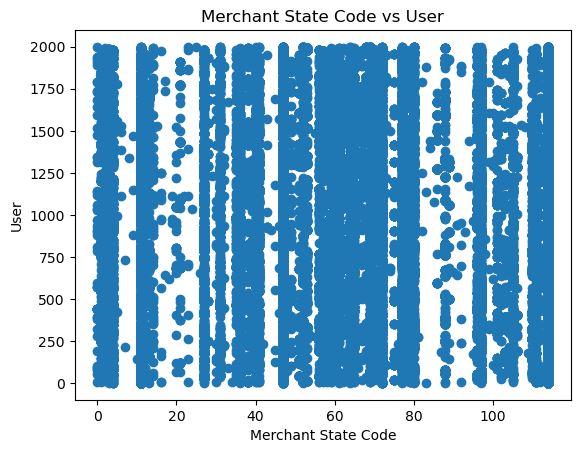

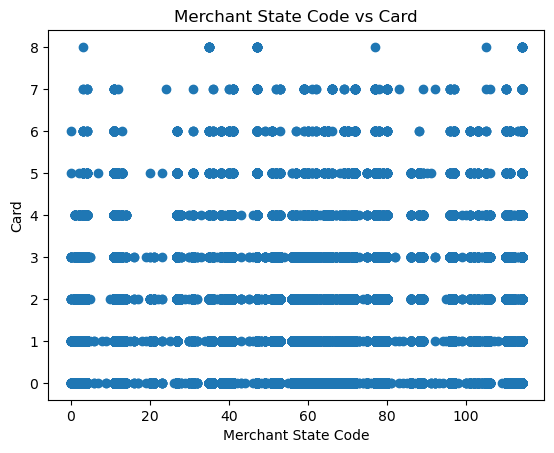

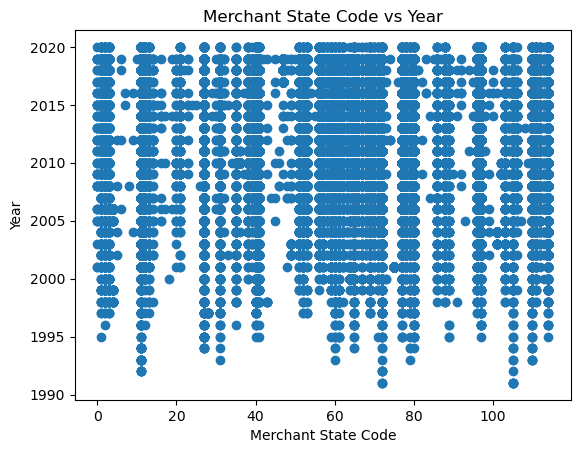

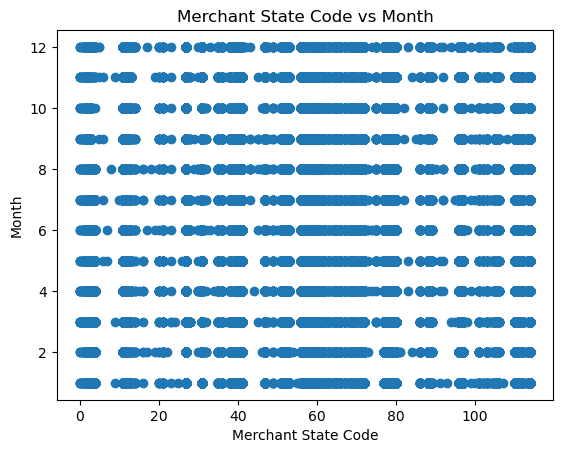

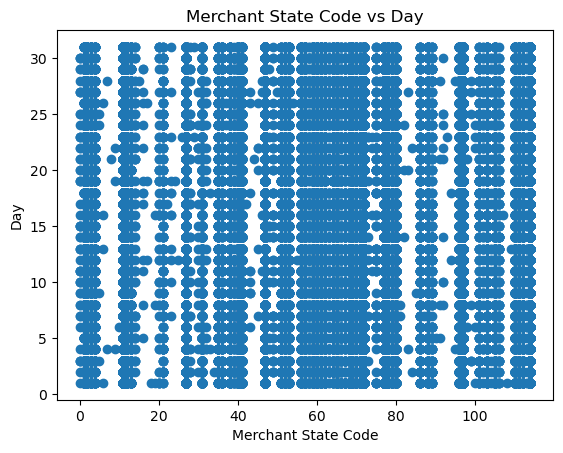

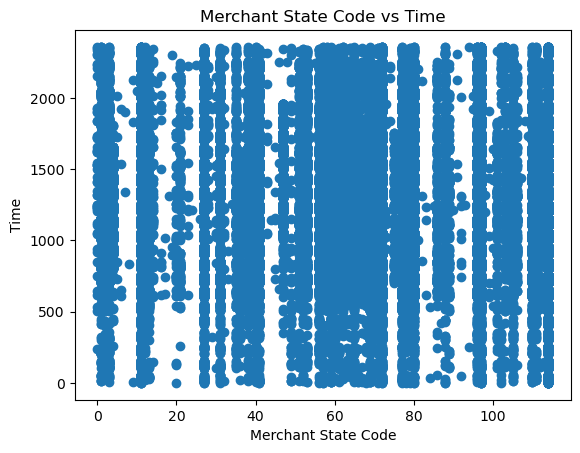

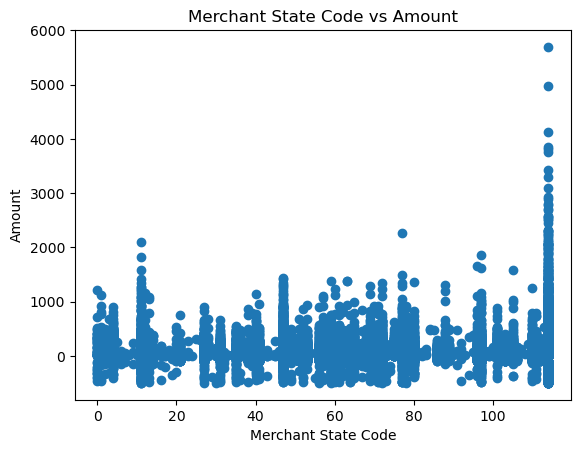

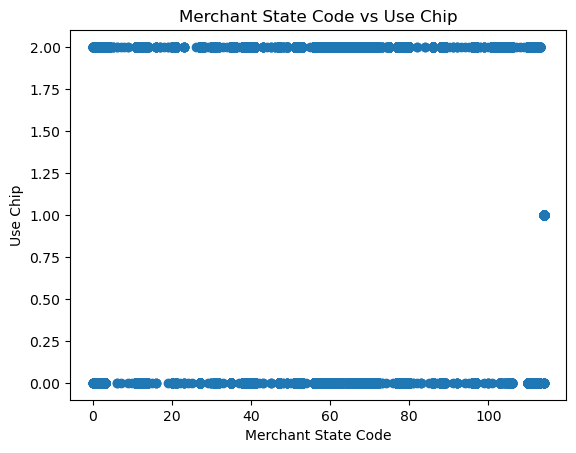

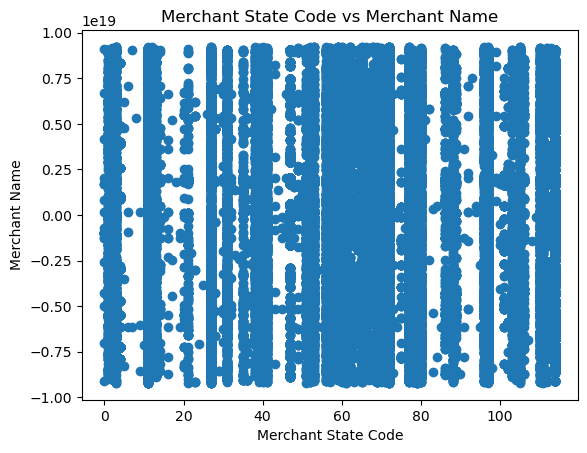

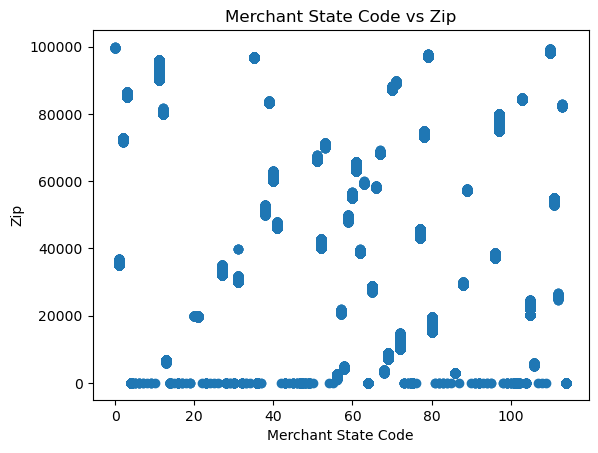

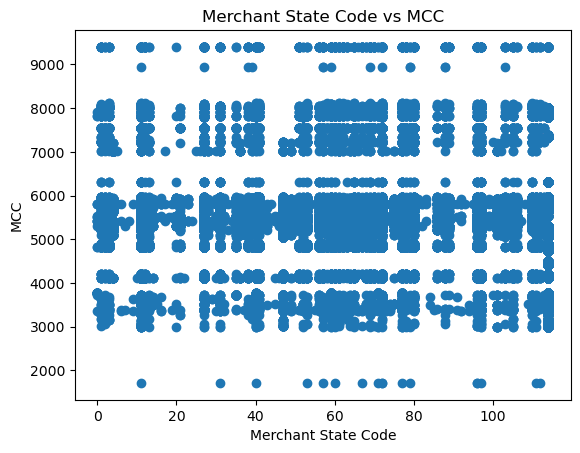

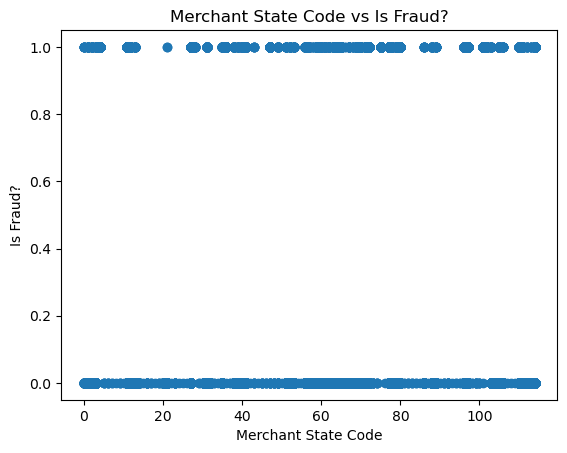

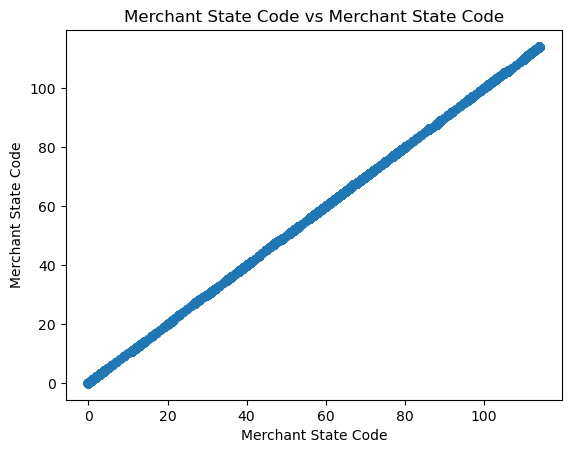

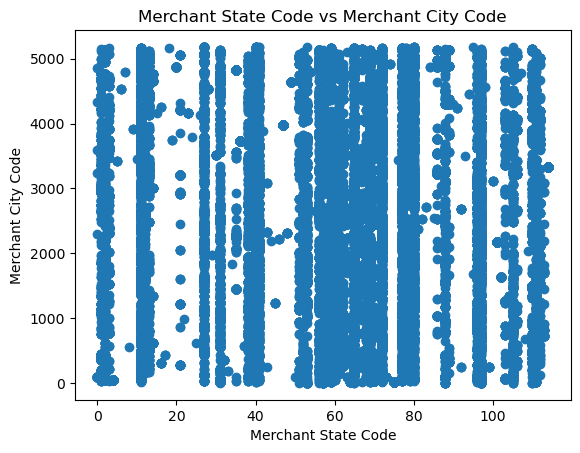

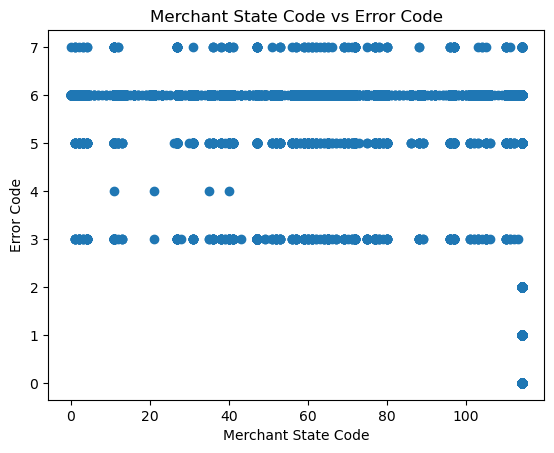

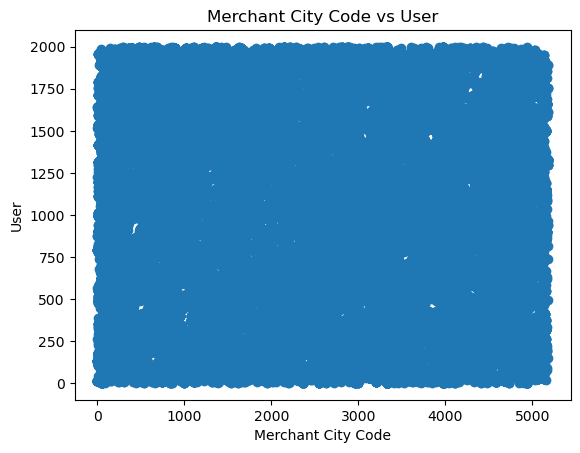

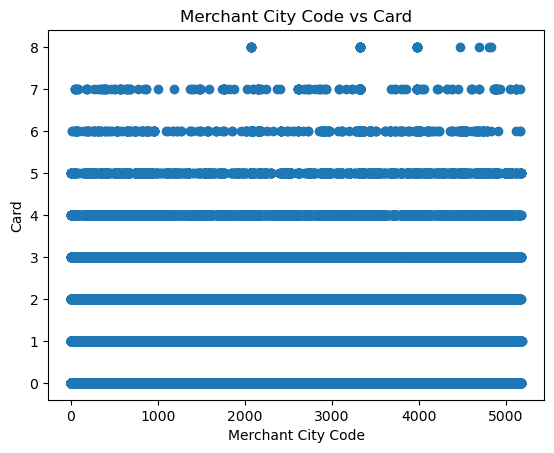

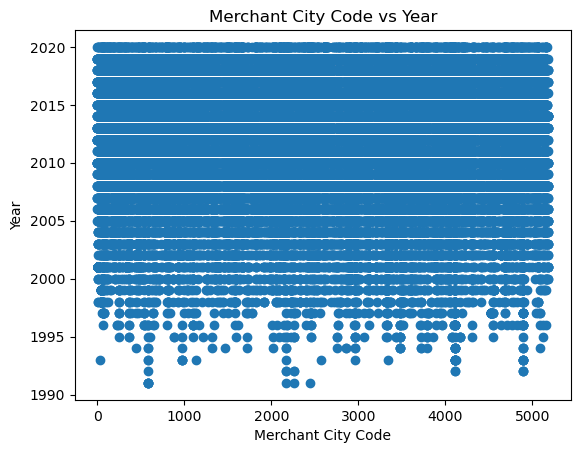

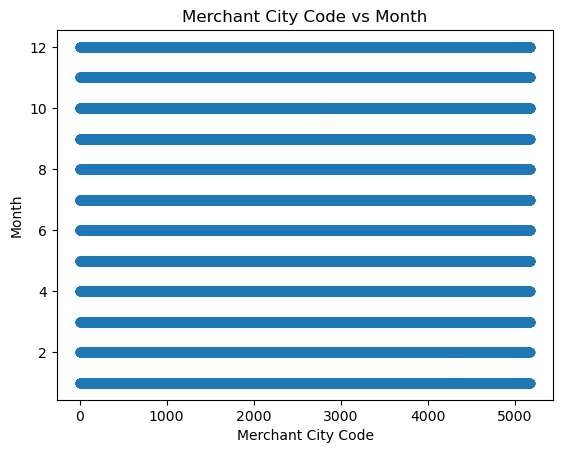

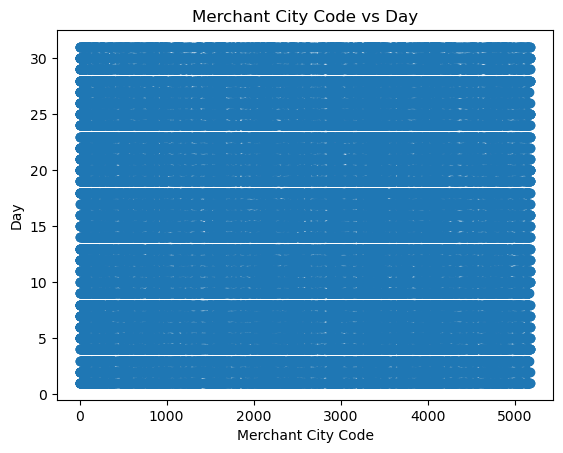

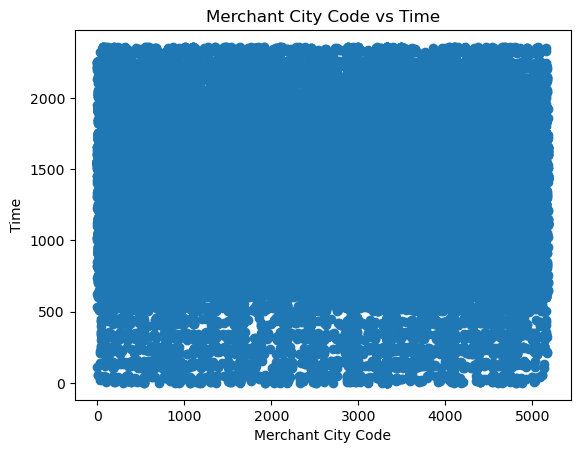

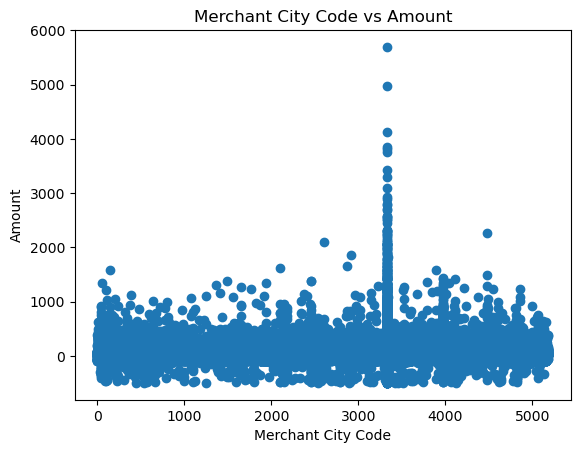

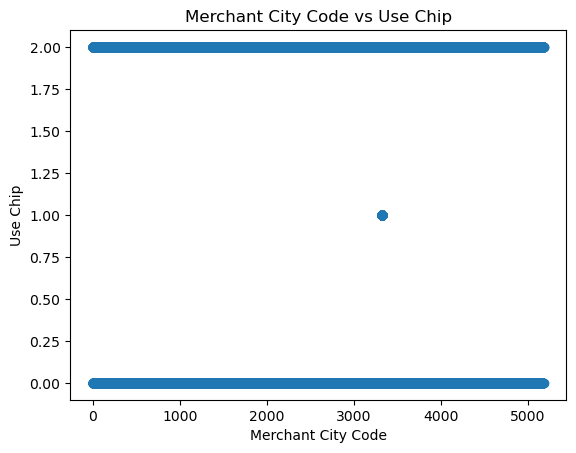

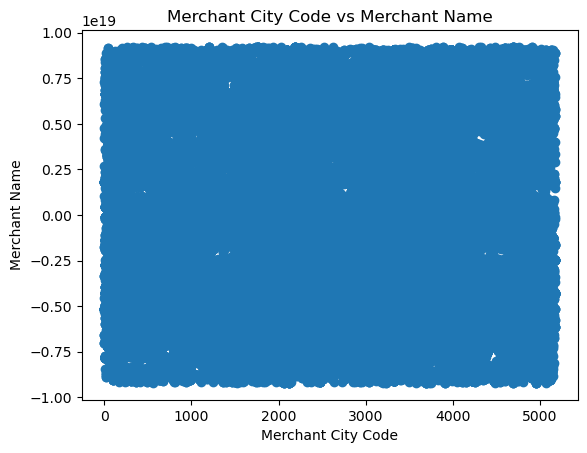

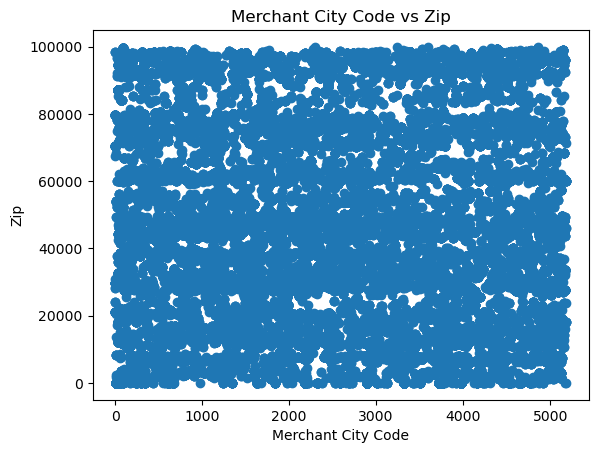

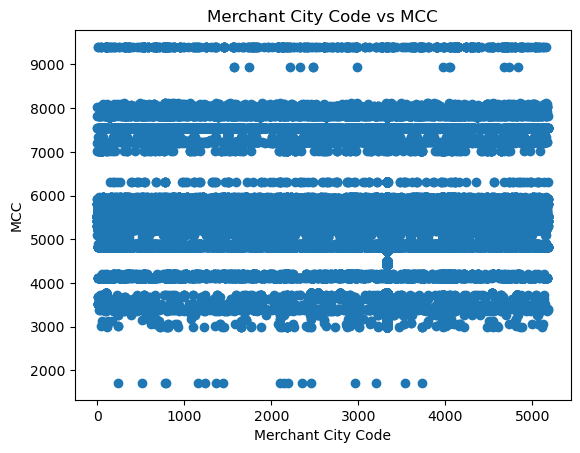

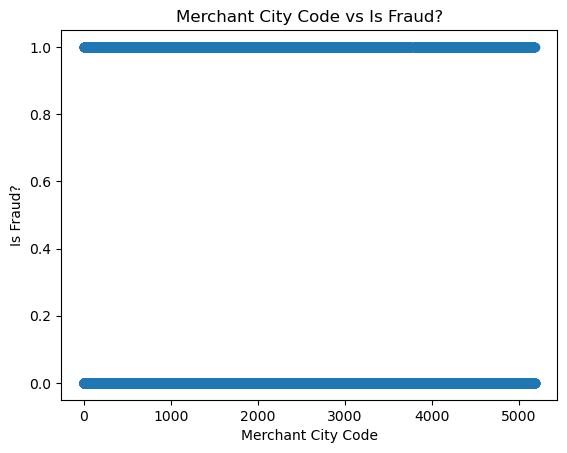

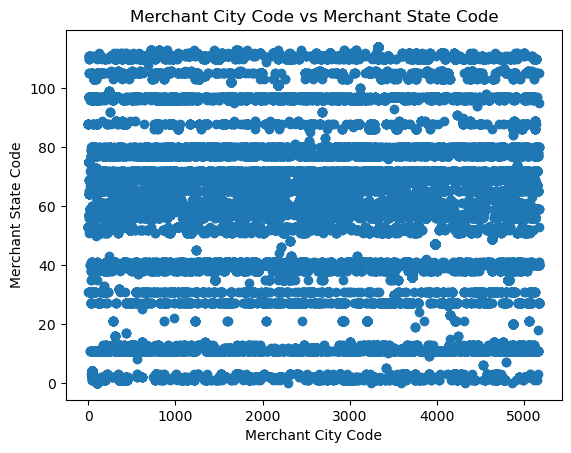

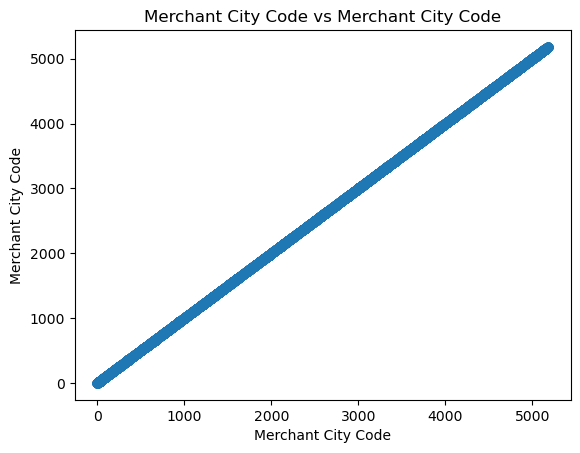

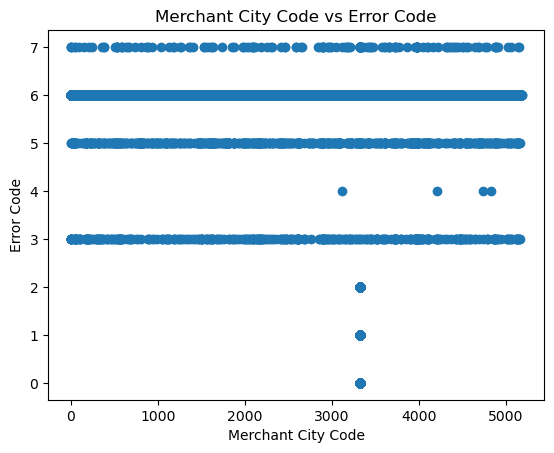

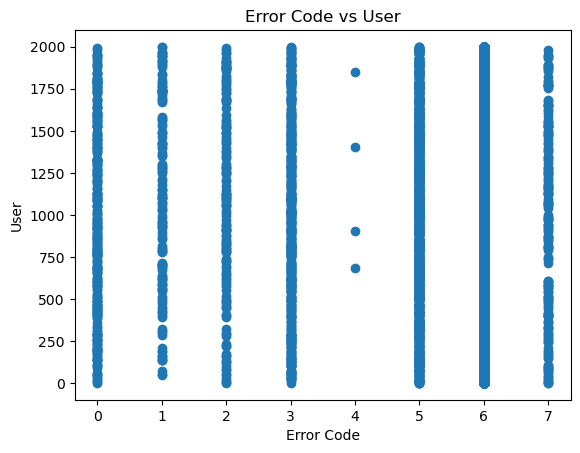

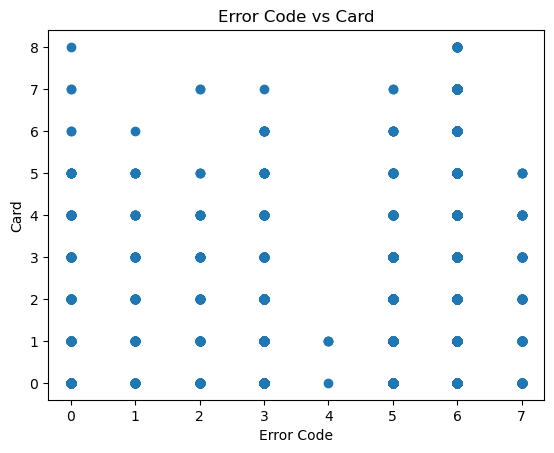

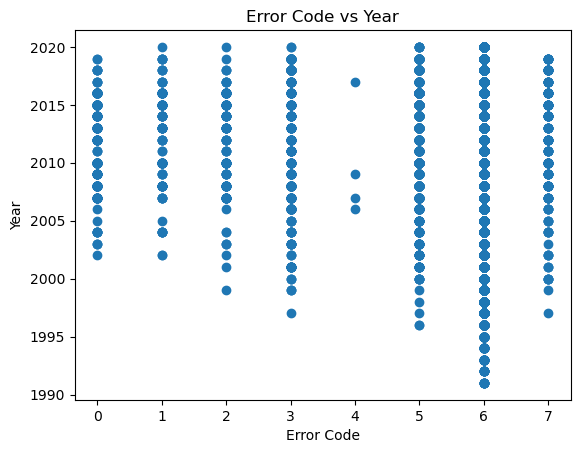

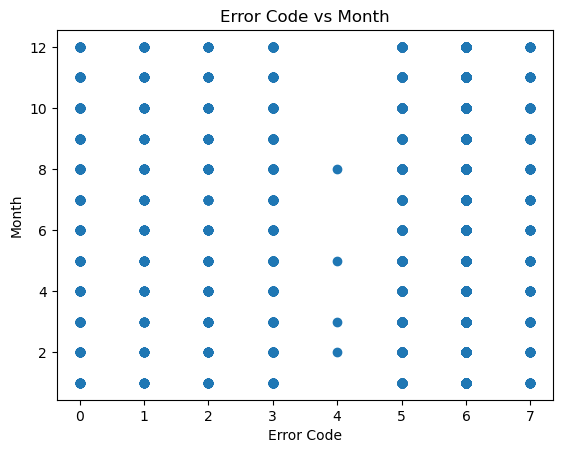

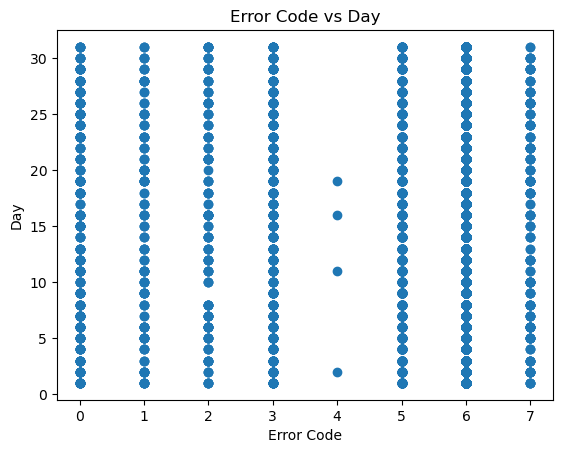

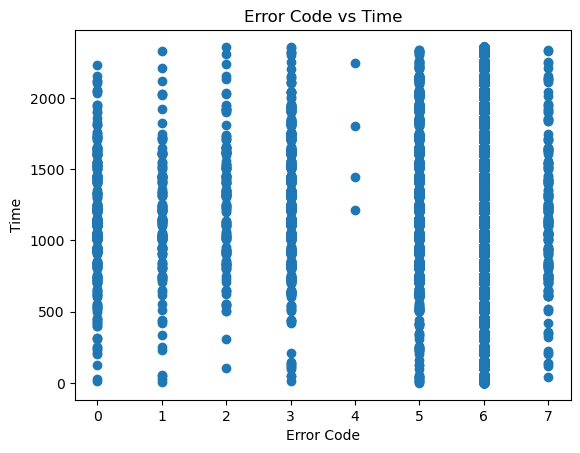

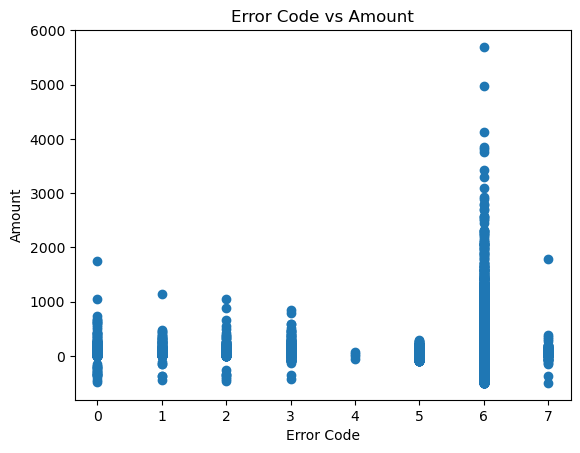

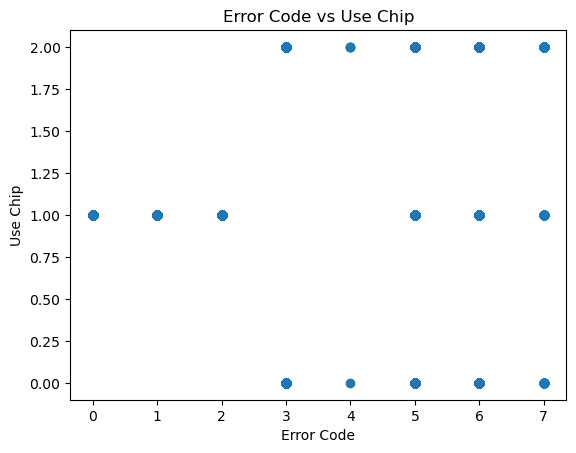

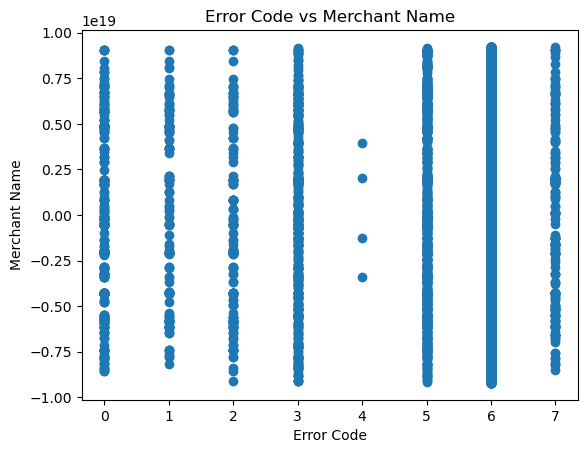

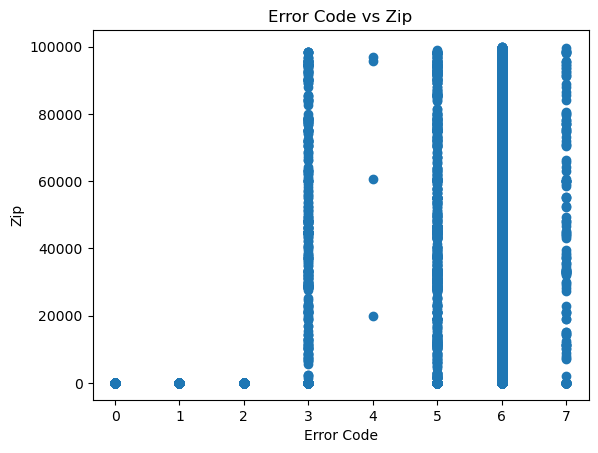

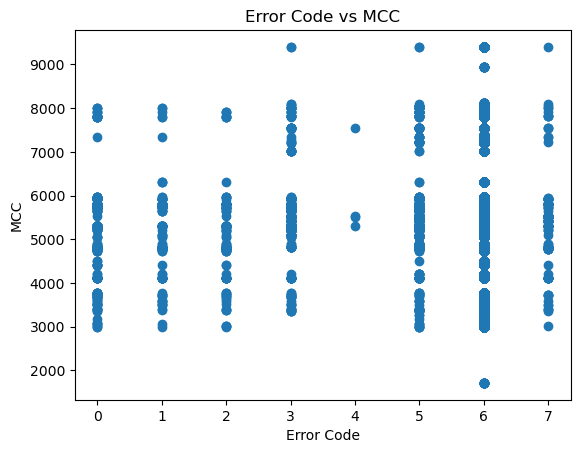

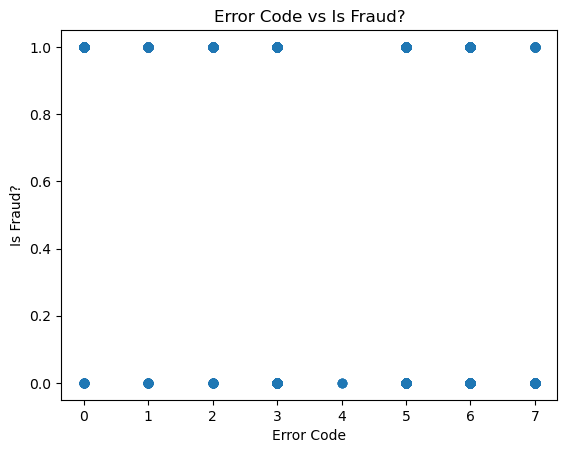

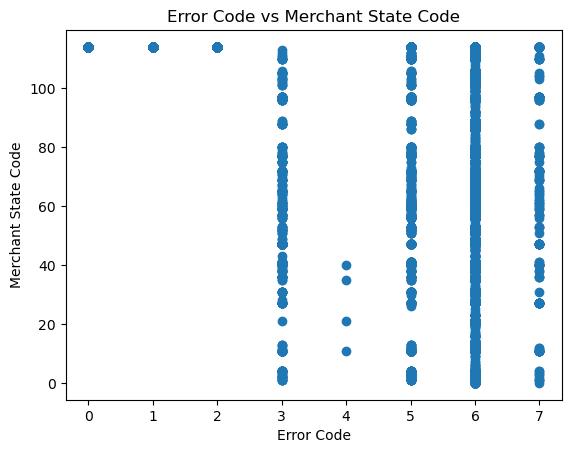

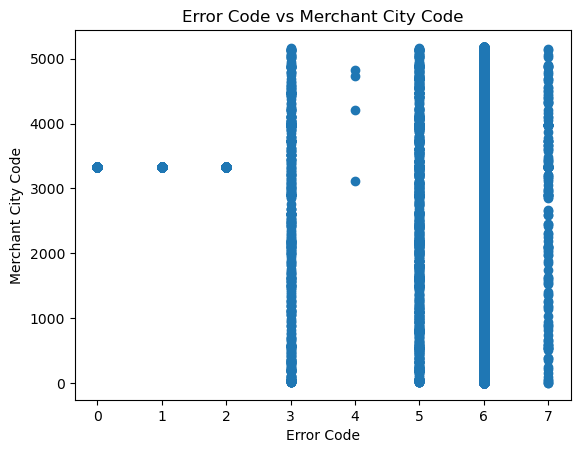

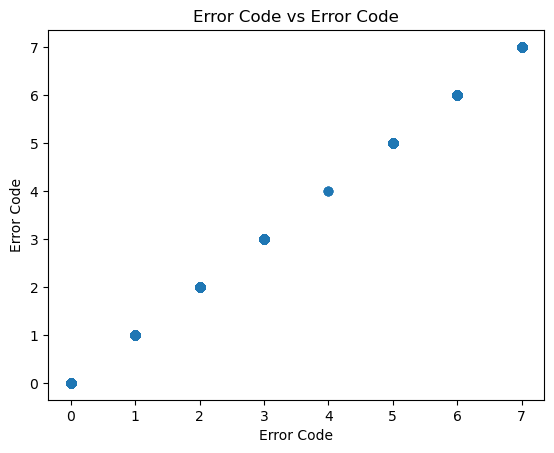

In [24]:
import plotly.express as px

features = df.columns.tolist()
features.remove('Merchant City')
features.remove('Merchant State')
features.remove('Errors?')

print(features)

for feature1 in features:
    for feature2 in features:
        plt.scatter(df[feature1], df[feature2])
        plt.title(feature1 + ' vs ' + feature2)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()
        


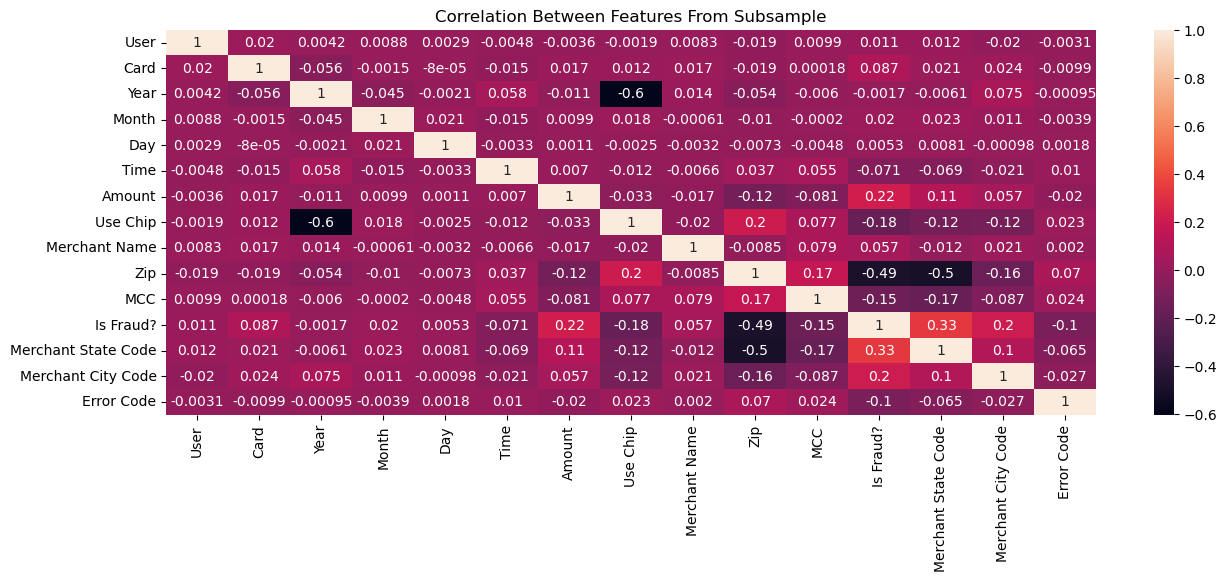

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Between Features From Subsample')
plt.show()

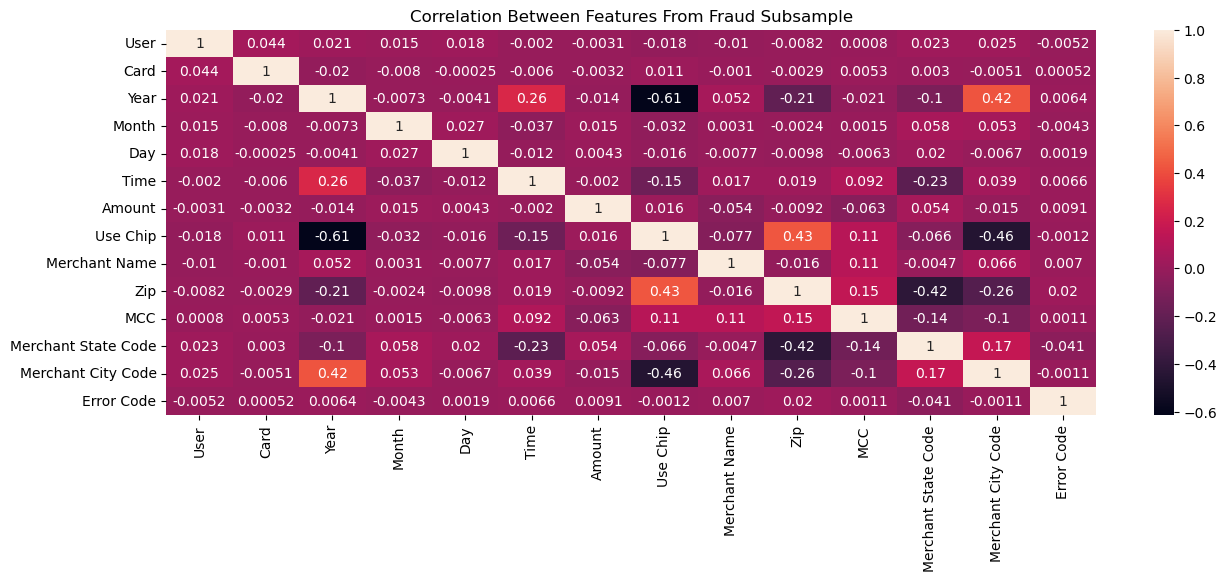

In [26]:
# Creatng a subset of just fraud rows
df_fraud = df.loc[df['Is Fraud?'] == 1]
df_fraud = df_fraud.drop('Is Fraud?', axis=1)

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fraud.corr(), annot=True)
plt.title('Correlation Between Features From Fraud Subsample')
plt.show()

In [27]:
df

User  Card  Year  Month  Day  Time  Amount  Use Chip  \
10569294   884     1  2011     10   11   745   55.72         2   
3112825    260     3  2016      9   25  1702  148.08         0   
15235017  1246     1  2015     11    2  1410   40.00         0   
11458673   953     1  2017      3    6   636   59.76         0   
13012273  1071     0  2017      7   25  1855   21.10         0   
...        ...   ...   ...    ...  ...   ...     ...       ...   
24375668  1997     2  2016      9    4  1045    1.25         1   
24375670  1997     2  2016      9    4  1230  116.66         1   
24375671  1997     2  2016      9    4  1240  359.99         1   
24375672  1997     2  2016      9    4  1345  351.51         1   
24375673  1997     2  2016      9    4  1355  188.26         1   

                Merchant Name Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054   Apple River             IL  61001.0  4111   
3112825   -727612092139916043       Sanford             NC  27330.0  5411   
15235017 -4282466774399734331      New York             NY  10010.0  4829   
11458673 -2472481739355111587      Franklin             WI  53132.0  7538   
13012273 -7146670748125200898         Tampa             FL  33613.0  5970   
...                       ...           ...            ...      ...   ...   
24375668  6455213054093379528        ONLINE         ONLINE      0.0  5815   
24375670   822647939787511611        ONLINE         ONLINE      0.0  5311   
24375671  8080934608468946743        ONLINE         ONLINE      0.0  5310   
24375672 -4282466774399734331        ONLINE         ONLINE      0.0  4829   
24375673  3189517333335617109        ONLINE         ONLINE      0.0  5311   

         Errors?  Is Fraud?  Merchant State Code  Merchant City Code  \
10569294     NAN          0                   40                 126   
3112825      NAN          0                   65                4140   
15235017     NAN          0                   72                3203   
11458673     NAN          0                  111                1598   
13012273     NAN          0                   27                4560   
...          ...        ...                  ...                 ...   
24375668     NAN          1                  114                3323   
24375670     NAN          1                  114                3323   
24375671     NAN          1                  114                3323   
24375672     NAN          1                  114                3323   
24375673     NAN          1                  114                3323   

          Error Code  
10569294           6  
3112825            6  
15235017           6  
11458673           6  
13012273           6  
...              ...  
24375668           6  
24375670           6  
24375671           6  
24375672           6  
24375673           6  

[99757 rows x 18 columns]

## One Hot Encode for the Cards column 

In [28]:
features = df['Card'].unique()
features

array([1, 3, 0, 4, 5, 2, 6, 7, 8])

In [29]:
df = df.astype({'Card':'string'})
df

User Card  Year  Month  Day  Time  Amount  Use Chip  \
10569294   884    1  2011     10   11   745   55.72         2   
3112825    260    3  2016      9   25  1702  148.08         0   
15235017  1246    1  2015     11    2  1410   40.00         0   
11458673   953    1  2017      3    6   636   59.76         0   
13012273  1071    0  2017      7   25  1855   21.10         0   
...        ...  ...   ...    ...  ...   ...     ...       ...   
24375668  1997    2  2016      9    4  1045    1.25         1   
24375670  1997    2  2016      9    4  1230  116.66         1   
24375671  1997    2  2016      9    4  1240  359.99         1   
24375672  1997    2  2016      9    4  1345  351.51         1   
24375673  1997    2  2016      9    4  1355  188.26         1   

                Merchant Name Merchant City Merchant State      Zip   MCC  \
10569294  2552240663952107054   Apple River             IL  61001.0  4111   
3112825   -727612092139916043       Sanford             NC  27330.0  5411   
15235017 -4282466774399734331      New York             NY  10010.0  4829   
11458673 -2472481739355111587      Franklin             WI  53132.0  7538   
13012273 -7146670748125200898         Tampa             FL  33613.0  5970   
...                       ...           ...            ...      ...   ...   
24375668  6455213054093379528        ONLINE         ONLINE      0.0  5815   
24375670   822647939787511611        ONLINE         ONLINE      0.0  5311   
24375671  8080934608468946743        ONLINE         ONLINE      0.0  5310   
24375672 -4282466774399734331        ONLINE         ONLINE      0.0  4829   
24375673  3189517333335617109        ONLINE         ONLINE      0.0  5311   

         Errors?  Is Fraud?  Merchant State Code  Merchant City Code  \
10569294     NAN          0                   40                 126   
3112825      NAN          0                   65                4140   
15235017     NAN          0                   72                3203   
11458673     NAN          0                  111                1598   
13012273     NAN          0                   27                4560   
...          ...        ...                  ...                 ...   
24375668     NAN          1                  114                3323   
24375670     NAN          1                  114                3323   
24375671     NAN          1                  114                3323   
24375672     NAN          1                  114                3323   
24375673     NAN          1                  114                3323   

          Error Code  
10569294           6  
3112825            6  
15235017           6  
11458673           6  
13012273           6  
...              ...  
24375668           6  
24375670           6  
24375671           6  
24375672           6  
24375673           6  

[99757 rows x 18 columns]

In [30]:
features = df['Card'].unique()
features

<StringArray>
['1', '3', '0', '4', '5', '2', '6', '7', '8']
Length: 9, dtype: string

In [31]:
encode = OneHotEncoder()
feature_array = encode.fit_transform(df[['Card']]).toarray()

feature_labels = encode.categories_

np.array(feature_labels).ravel()

df_temp = pd.DataFrame(feature_array, columns=feature_labels)

for name in features:
    error = "Card Number: "+name
    df.insert(15, error, df_temp[name].values, True)

df

User Card  Year  Month  Day  Time  Amount  Use Chip  \
10569294   884    1  2011     10   11   745   55.72         2   
3112825    260    3  2016      9   25  1702  148.08         0   
15235017  1246    1  2015     11    2  1410   40.00         0   
11458673   953    1  2017      3    6   636   59.76         0   
13012273  1071    0  2017      7   25  1855   21.10         0   
...        ...  ...   ...    ...  ...   ...     ...       ...   
24375668  1997    2  2016      9    4  1045    1.25         1   
24375670  1997    2  2016      9    4  1230  116.66         1   
24375671  1997    2  2016      9    4  1240  359.99         1   
24375672  1997    2  2016      9    4  1345  351.51         1   
24375673  1997    2  2016      9    4  1355  188.26         1   

                Merchant Name Merchant City  ... Card Number: 6  \
10569294  2552240663952107054   Apple River  ...            0.0   
3112825   -727612092139916043       Sanford  ...            0.0   
15235017 -4282466774399734331      New York  ...            0.0   
11458673 -2472481739355111587      Franklin  ...            0.0   
13012273 -7146670748125200898         Tampa  ...            0.0   
...                       ...           ...  ...            ...   
24375668  6455213054093379528        ONLINE  ...            0.0   
24375670   822647939787511611        ONLINE  ...            0.0   
24375671  8080934608468946743        ONLINE  ...            0.0   
24375672 -4282466774399734331        ONLINE  ...            0.0   
24375673  3189517333335617109        ONLINE  ...            0.0   

          Card Number: 2  Card Number: 5 Card Number: 4  Card Number: 0  \
10569294             0.0             0.0            0.0             0.0   
3112825              0.0             0.0            0.0             0.0   
15235017             0.0             0.0            0.0             0.0   
11458673             0.0             0.0            0.0             0.0   
13012273             0.0             0.0            0.0             1.0   
...                  ...             ...            ...             ...   
24375668             1.0             0.0            0.0             0.0   
24375670             1.0             0.0            0.0             0.0   
24375671             1.0             0.0            0.0             0.0   
24375672             1.0             0.0            0.0             0.0   
24375673             1.0             0.0            0.0             0.0   

          Card Number: 3  Card Number: 1  Merchant State Code  \
10569294             0.0             1.0                   40   
3112825              1.0             0.0                   65   
15235017             0.0             1.0                   72   
11458673             0.0             1.0                  111   
13012273             0.0             0.0                   27   
...                  ...             ...                  ...   
24375668             0.0             0.0                  114   
24375670             0.0             0.0                  114   
24375671             0.0             0.0                  114   
24375672             0.0             0.0                  114   
24375673             0.0             0.0                  114   

          Merchant City Code  Error Code  
10569294                 126           6  
3112825                 4140           6  
15235017                3203           6  
11458673                1598           6  
13012273                4560           6  
...                      ...         ...  
24375668                3323           6  
24375670                3323           6  
24375671                3323           6  
24375672                3323           6  
24375673                3323           6  

[99757 rows x 27 columns]

In [32]:
df.drop('Card', axis=1, inplace=True)

In [33]:
df.nunique()

User                    1716
Year                      30
Month                     12
Day                       31
Time                    1440
Amount                 21766
Use Chip                   3
Merchant Name          11393
Merchant City           5182
Merchant State           115
Zip                     9714
MCC                      109
Errors?                    8
Is Fraud?                  2
Card Number: 8             2
Card Number: 7             2
Card Number: 6             2
Card Number: 2             2
Card Number: 5             2
Card Number: 4             2
Card Number: 0             2
Card Number: 3             2
Card Number: 1             2
Merchant State Code      115
Merchant City Code      5182
Error Code                 8
dtype: int64

In [34]:
#df.to_csv('/Users/archelolazabal/Desktop/GMUSpring2023/Archel_Olazabal_CDS492/Data/Dataset3_Processed.csv', index=False)